# import and load data

/c/Users/junec/AppData/Local/Programs/Python/Python38/python
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


Elapsed time(hr)  Pressure(psia)  first_order_derivative  \
count      29813.000000    29813.000000            29813.000000   
mean        1949.504754     5858.252763               30.980488   
std         1071.285888     1201.608375              217.076860   
min            0.000000     2989.186167            -1177.363679   
25%         1223.614626     4920.227064              -26.315082   
50%         2055.749995     5958.685278                6.577672   
75%         2691.845828     6884.300893               50.575874   
max         4070.949737     7942.372157             1442.449150   

       second_order_derivative  
count             29813.000000  
mean              -3316.399705  
std               26067.263416  
min             -267661.267543  
25%                -150.940811  
50%                   0.048895  
75%                 129.782625  
max              199644.890976

Elapsed time(hr)  Liquid rate(STB/D)
count      10191.000000        10191.000000
mean        2210.383315       -16880.702745
std         1121.860526         4591.205914
min            0.433384       -22568.277381
25%         1345.039547       -19746.868884
50%         2248.487512       -18758.998204
75%         3074.228818       -15911.221687
max         4075.570423            1.166046

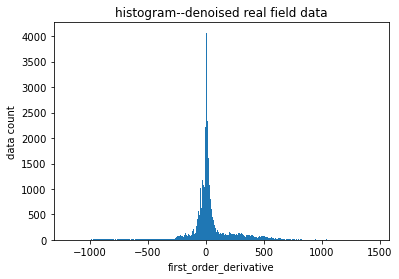

In [1]:
%run imports_N_loadDenoised.ipynb

# coarse filter

In [2]:
%run coarse_filter.ipynb

fliter derivatives which are larger than 6.577671754538749, smaller than -99.97038962759567
the length of filtered points: 17888


# detect all break points candidates

In [3]:
# method="PatternRecogintion_AvgDerivative_FFOD"
method="PatternRecogintion_MFOD_FFOD"
# method="AvgDerivative_PatternRecogintion_FFOD"
# method="PatternRecogintion_FFOD"

In [4]:
points=buildup_PR+drawdown_PR
deltaDerivative_tuning=0.1
# points=[index for index in range(len(pressure_measure))]
point_halfWindow=15
time_halfWindow=None
# point_halfWindow=None
# time_halfWindow=0.3
detect_useDerivative=DerivativeMethod(pressure_df,colum_names)
buildup_DRI, drawdown_DRI=detect_useDerivative.detect_breakpoints_deltaAvgFOD(points,
                                                                    deltaDerivative_tuning,
                                                                   point_halfWindow,
                                                                   time_halfWindow)
len(buildup_DRI),len(drawdown_DRI)

NameError: name 'buildup_PR' is not defined

start to learn..., using polynomial curve fitting
start to learn..., using polynomial curve fitting
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
------In the input ground truth: 25 points are detected as buildup, 28 points are detected as drawDown
-------calculate_Parameters_allCurve using 'polynomial' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
start to get pattern..., using '{fitting_type}' fitting
-----start to calculate'buildUp' pattern parameter, there are 25 for calculation
-----start to calculate'drawDown' pattern parameter, there are 28 for calculation
pattern learned: {'buildUp': {'left_top': array([-2.8204190e+02, -3.6527046e+02, -1.4062192e+02, -4.6410000e-02]), 'left_bottom': array([121.5484 , 261.44881, 161.1871 ,   2.63124]), 'right_top': array([-158.13055, -118.03974,  643.9731 ,    5.02701]), 'right_bottom': array([ 52.98722, -52.74598,  29.84924,  -3.26558])}, 'drawDown': {'left_top': array([-173.51

<Figure size 1440x720 with 0 Axes>

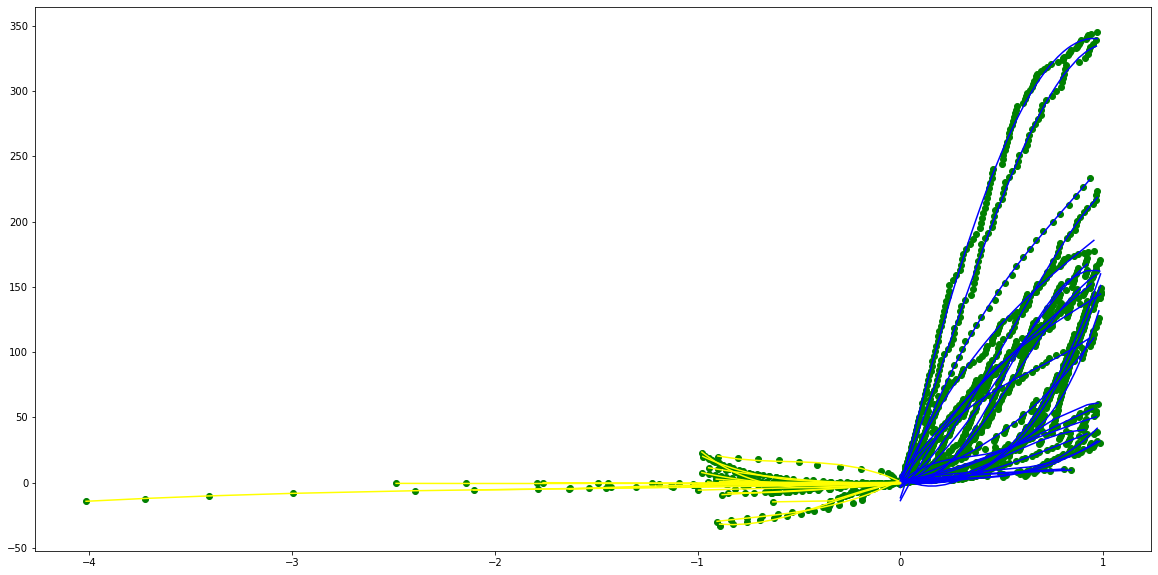

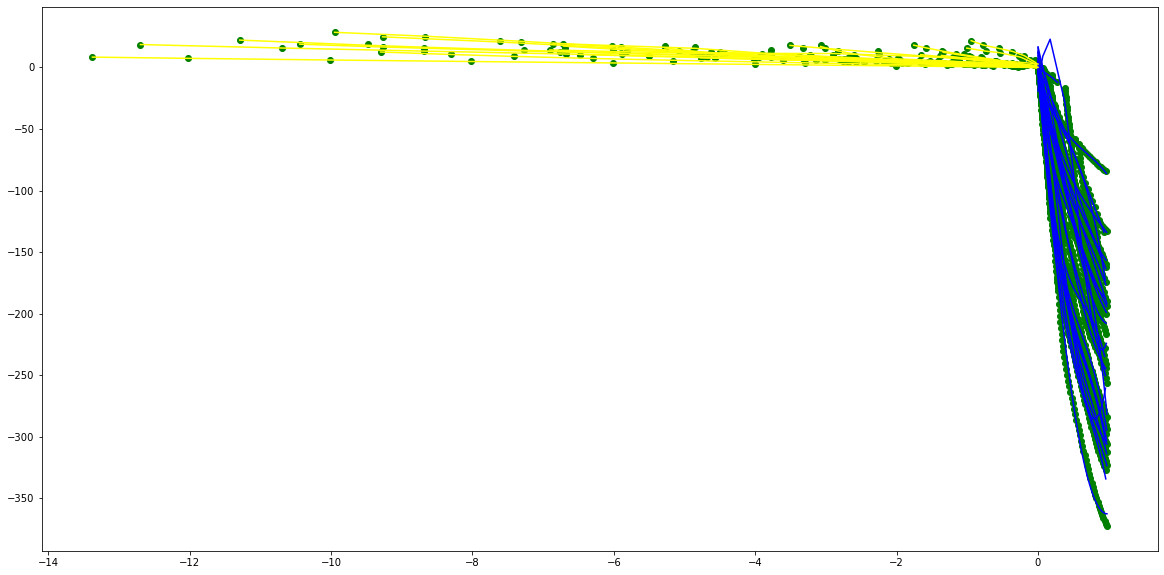

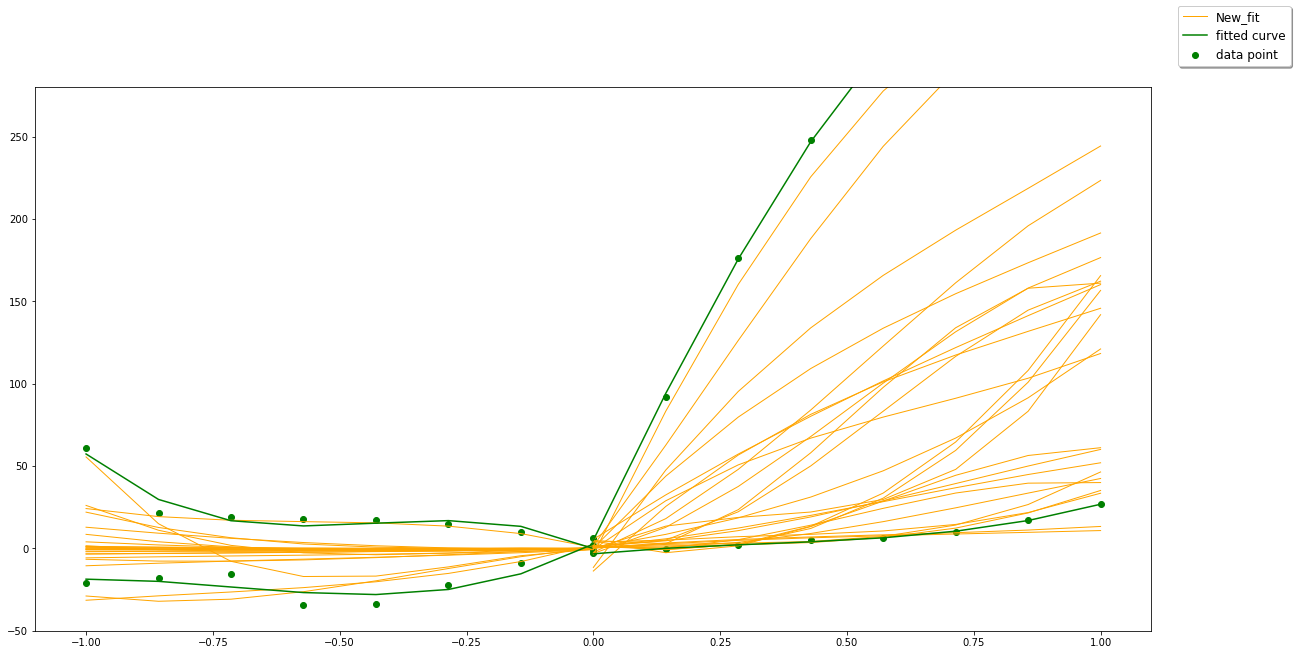

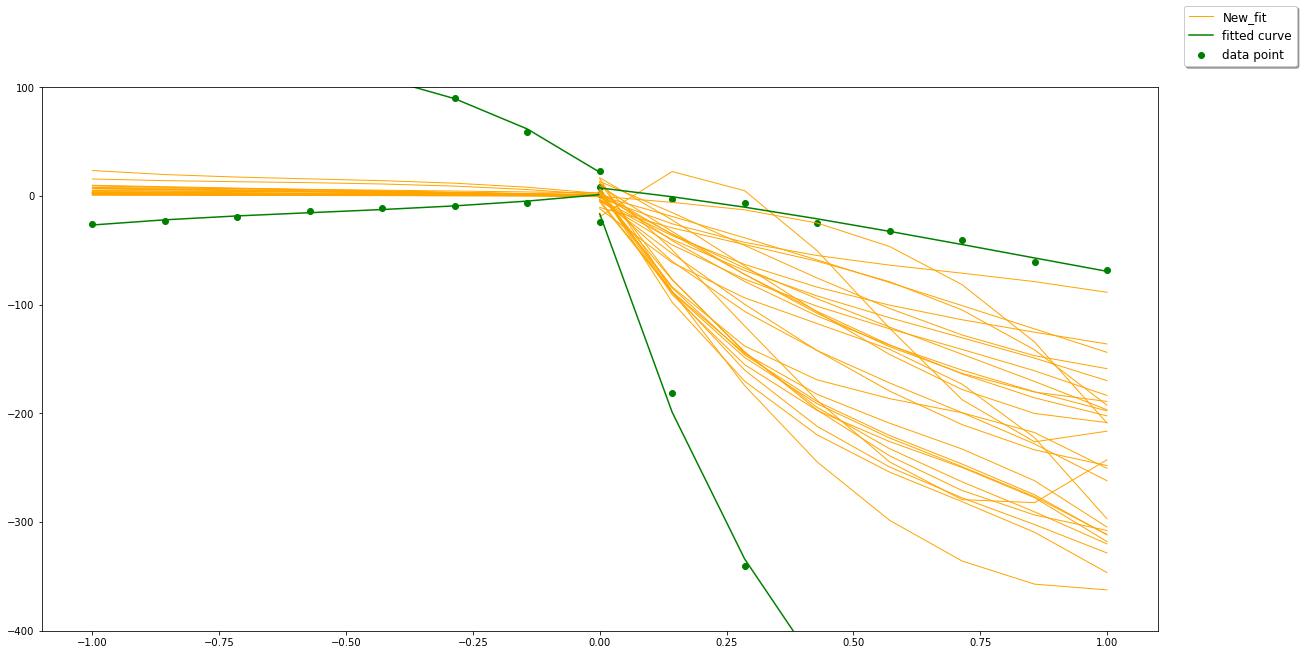

In [5]:
# points=buildup_DRI+drawdown_DRI
time_halfWindow_forLearn=1
point_halfWindow_forPredict=15
fitting_type="polynomial"
# points=[index for index in range(len(pressure_measure))]
%run detect_usePatternRecognition.ipynb

In [6]:
# points=[buildup_DRI,drawdown_DRI]
points=[buildup_PR,drawdown_PR]
time_step=0.5
%run detect_FirstFOD.ipynb
%run detect_MaxFOD.ipynb

methods\derivative_method.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.pressure_df["abs(first_order_derivative)"]=self.first_order_derivative.abs()


'len(buildUp_df): 4173,len(buildUp_first_FOD): 578'
'len(drawDown_df): 2713,len(drawDown_first_FOD): 185'
===============output==================
First_FOD


methods\derivative_method.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.pressure_df["abs(first_order_derivative)"]=self.first_order_derivative.abs()


'len(buildUp_df): 4173,len(buildUp_max_FOD): 578'
'len(drawDown_df): 2713,len(drawDown_max_FOD): 185'
===============output==================
Max_FOD


# spilit periods and find multi-rate break points

In [7]:
%run store_transients.ipynb

====detected_shutIns 38
====filtered_shutIns 31
====len(flowingPeriods) 32
====finally detect buildUp:134,drawDown:31


# plot flowing & shut-in periods

'buildup:31, drawdown:31'
---initializing...
---plotting...


findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


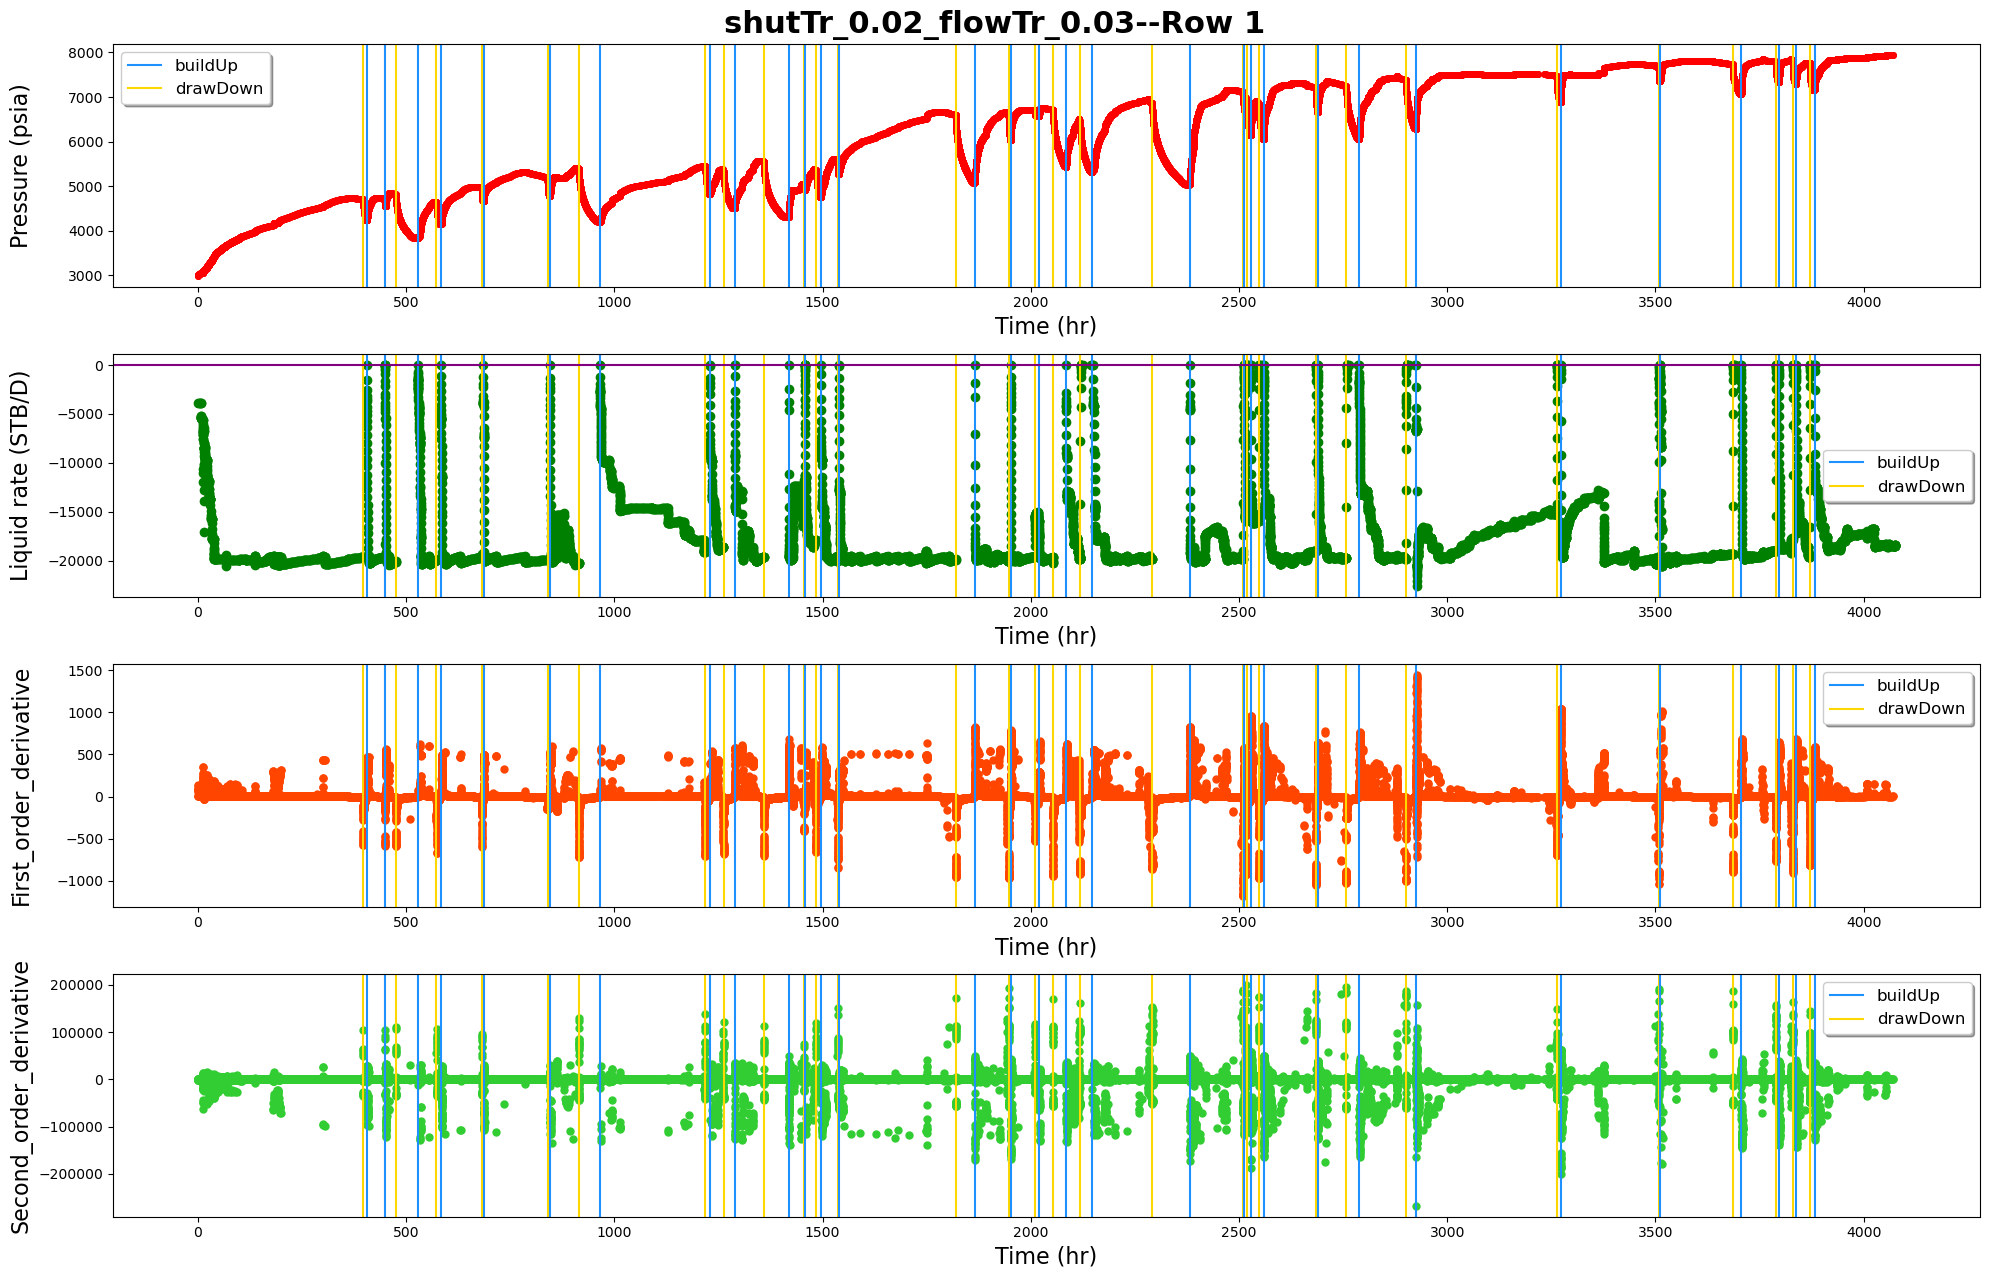

save whole....
detected 62 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]


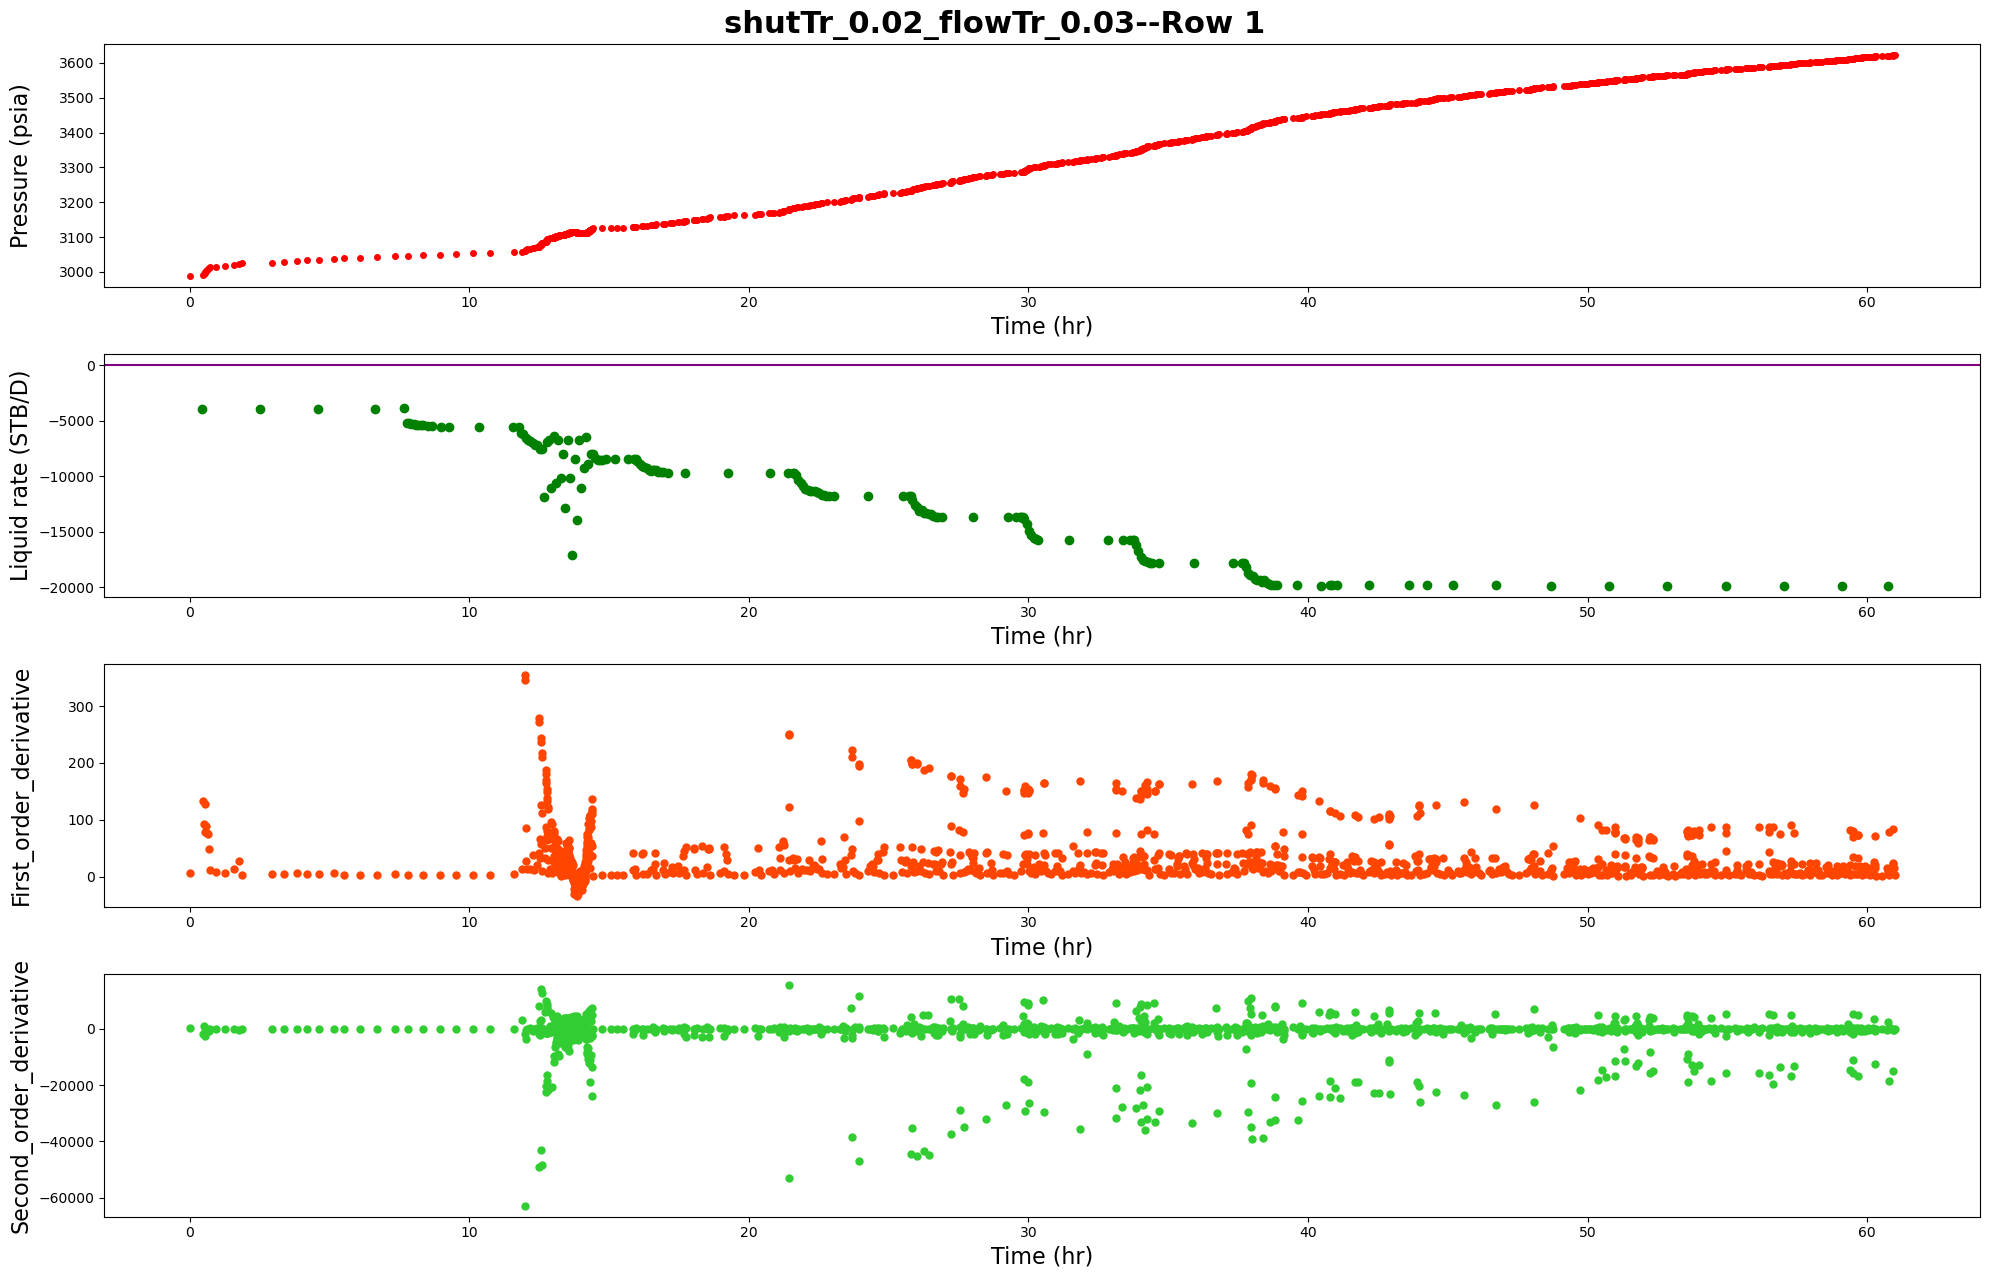

------row 2-----detected points:[2248]


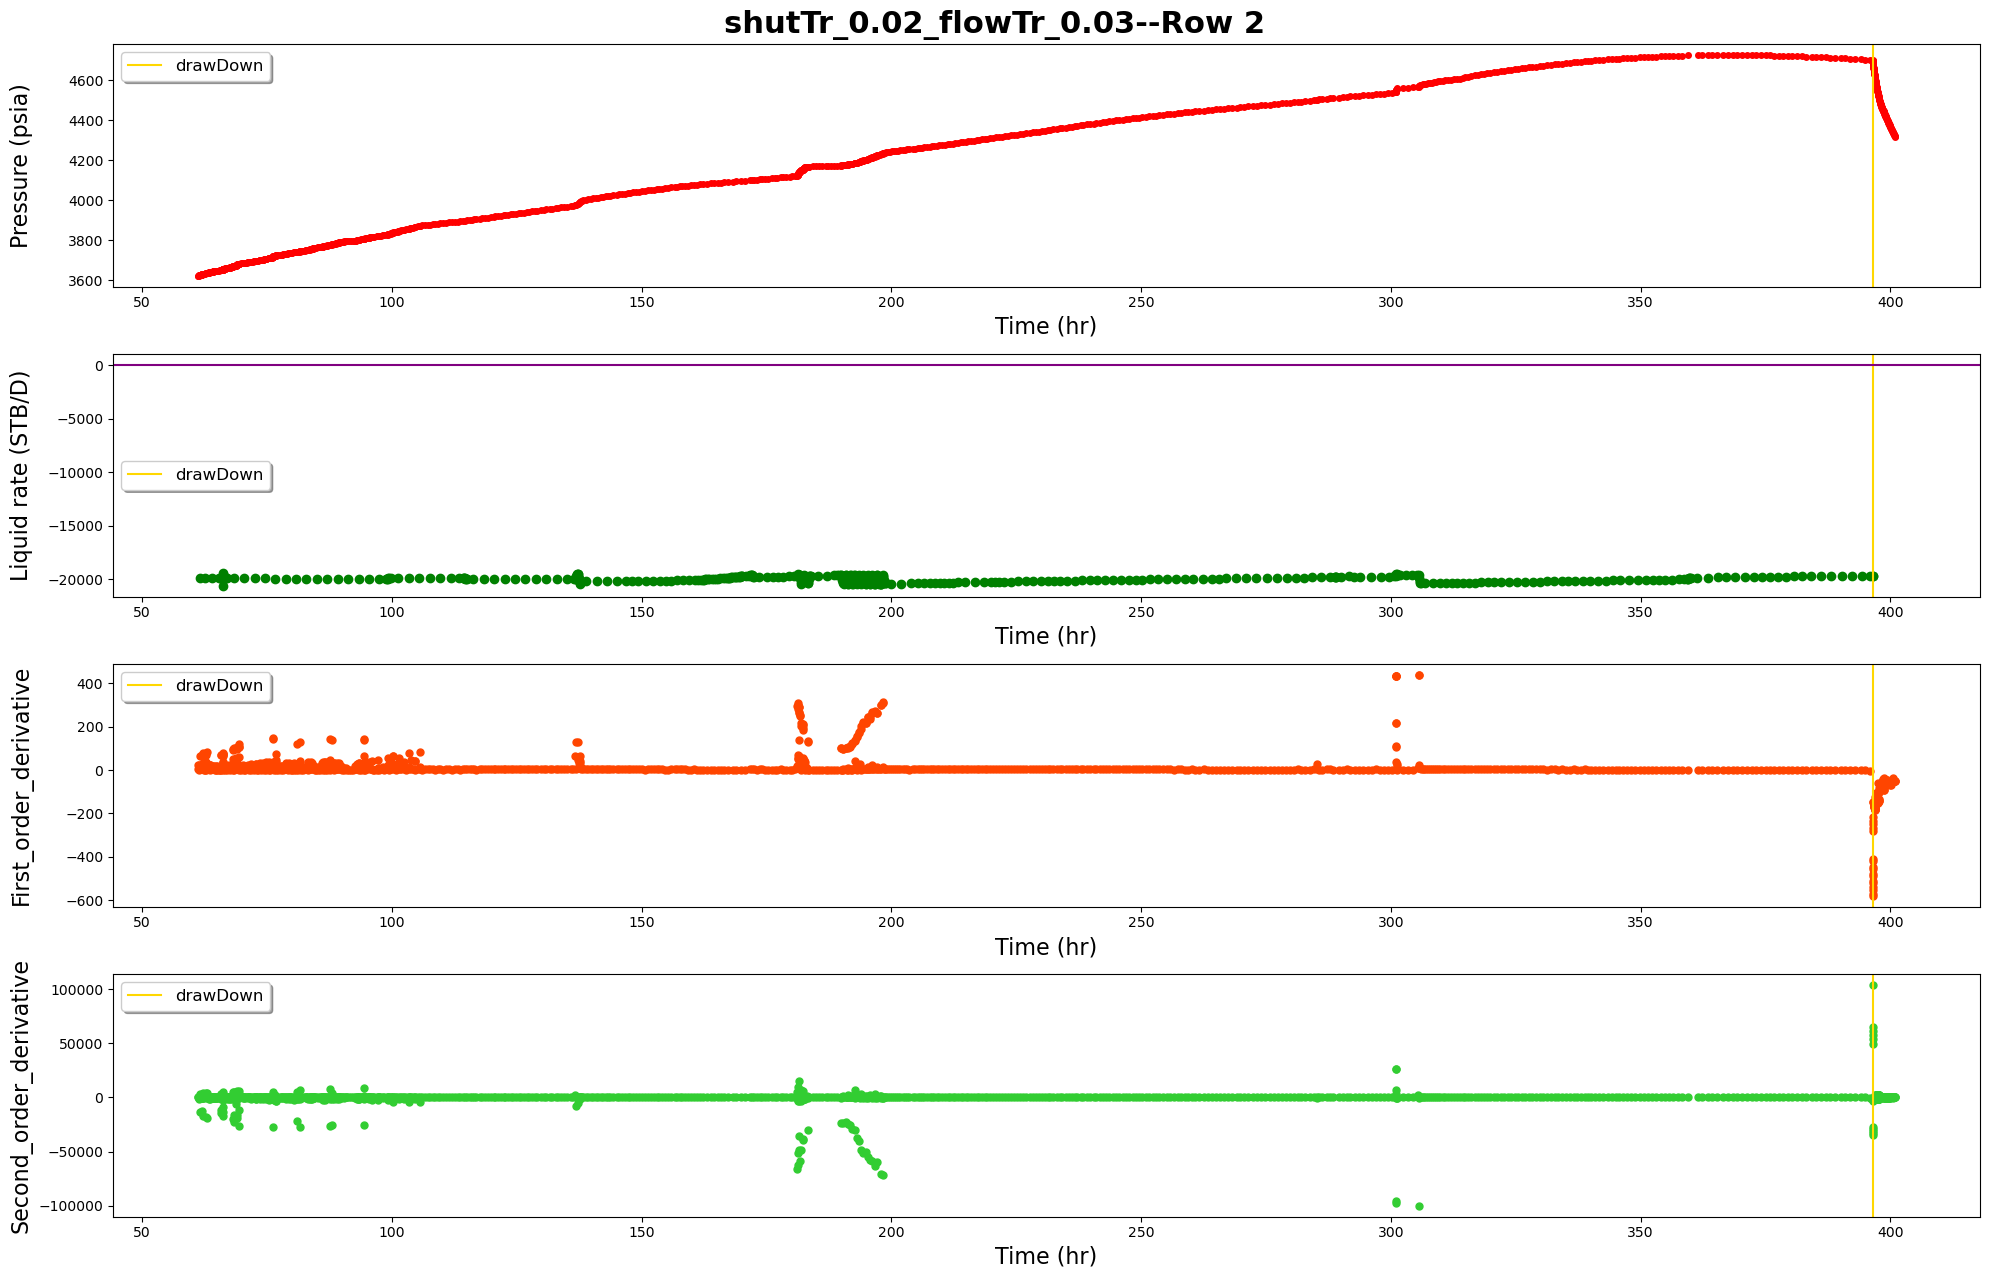

------row 3-----detected points:[2477, 2804, 2884, 3095, 3560]


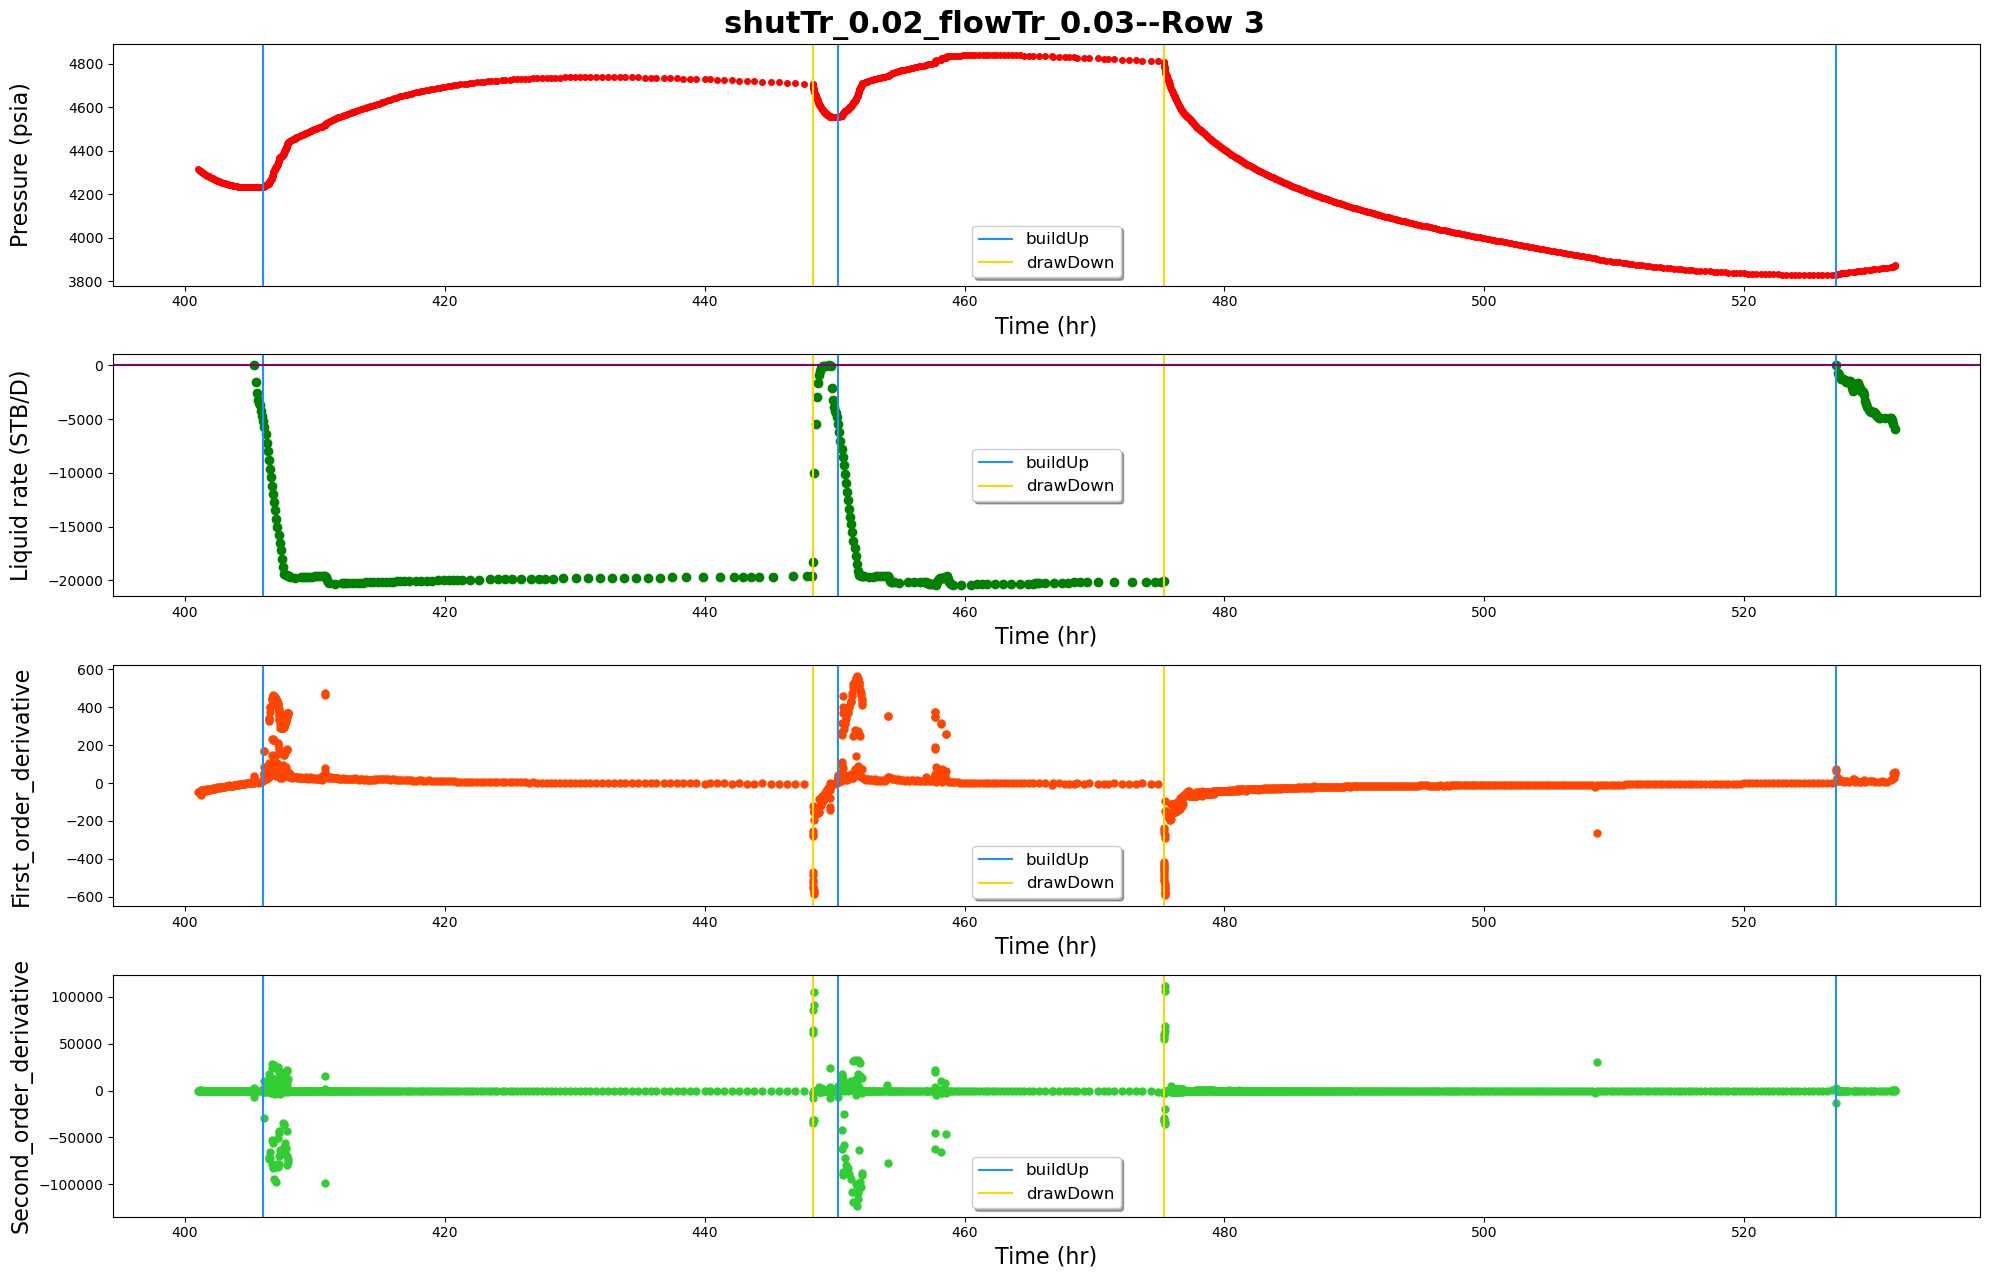

------row 4-----detected points:[3988, 4228, 4750]


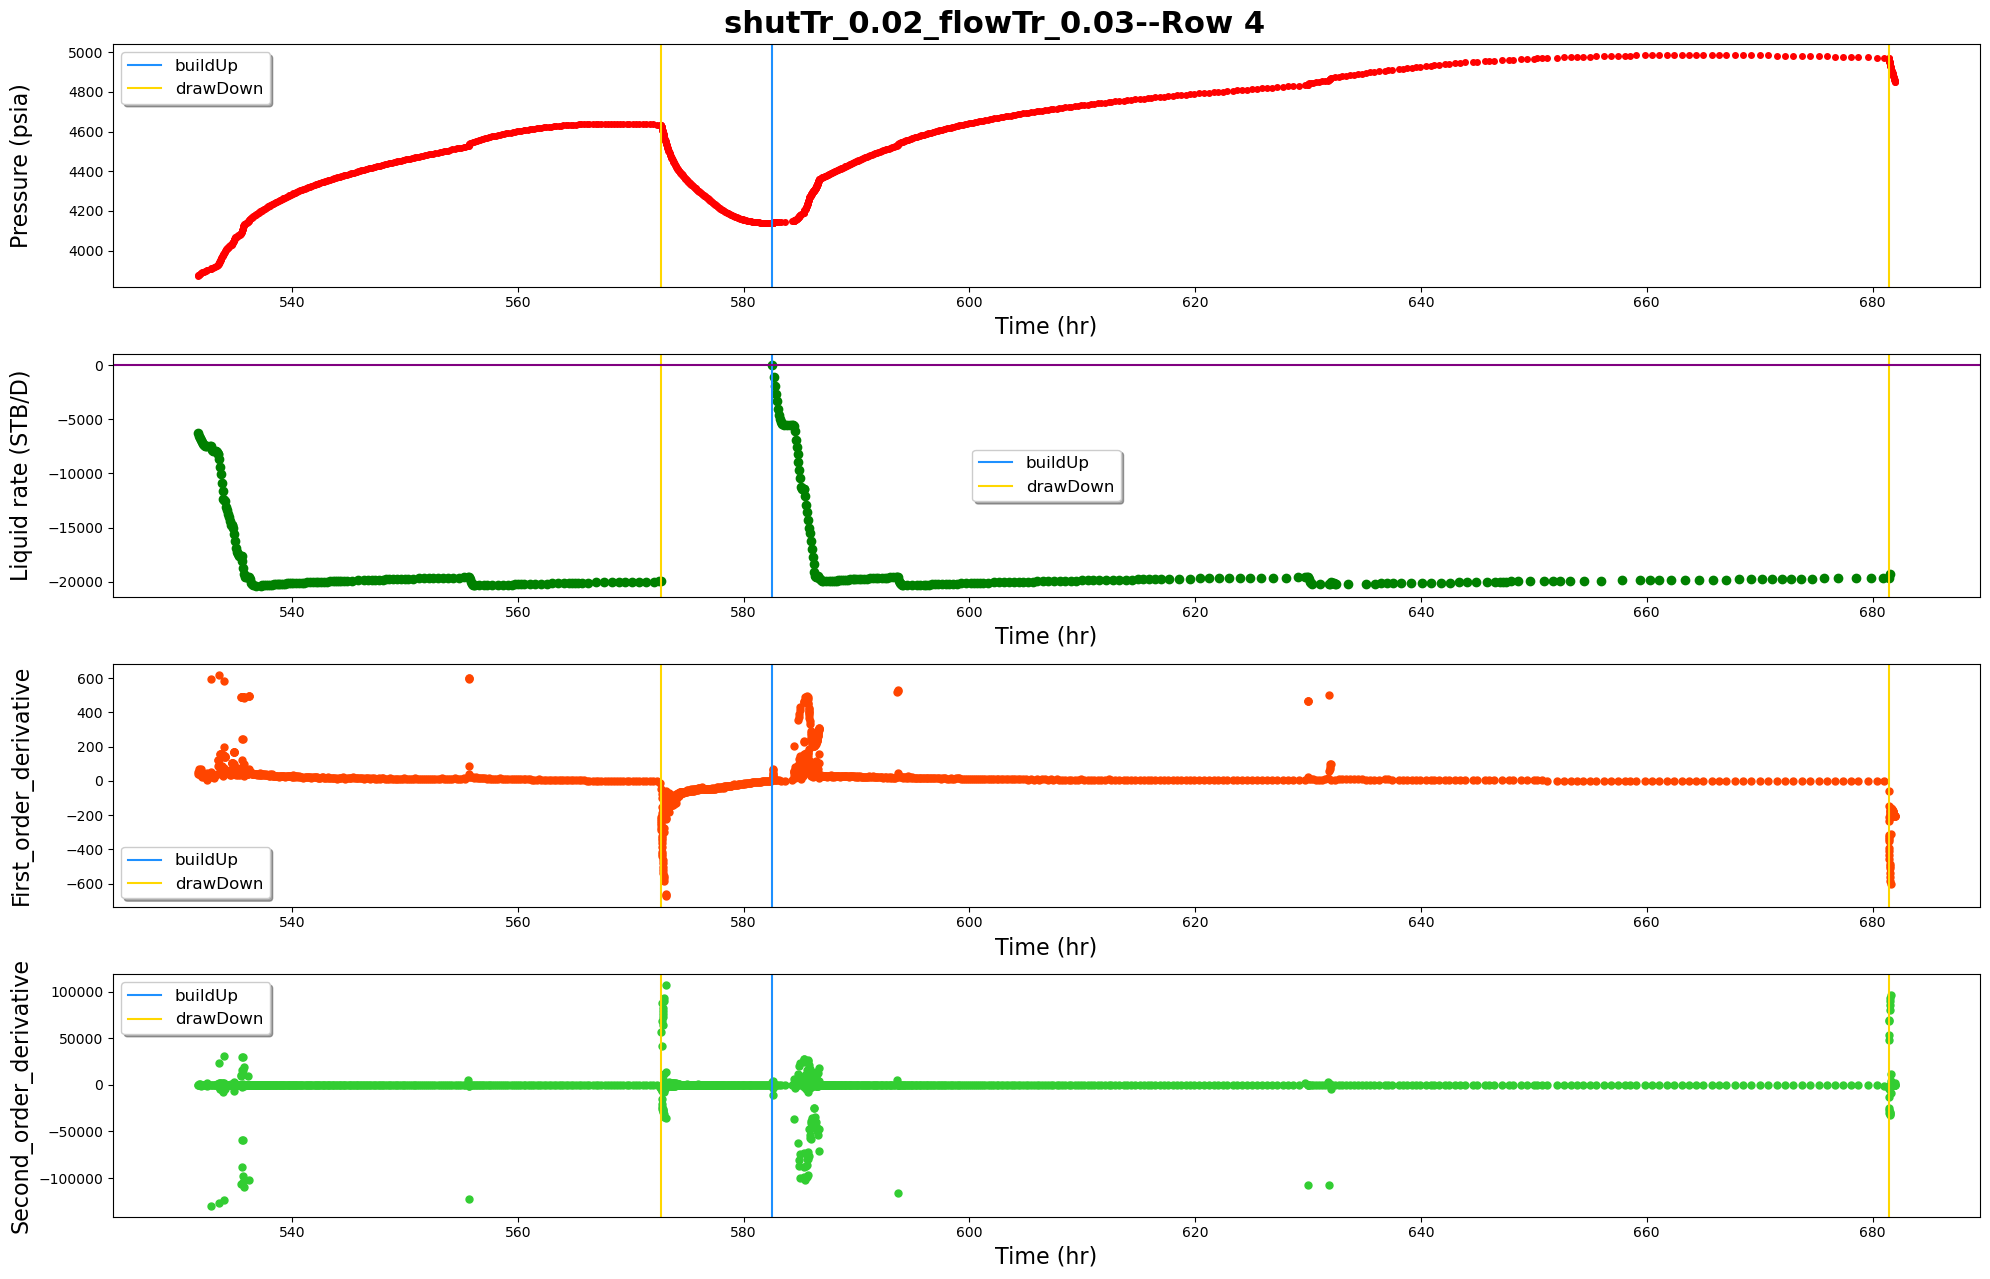

------row 5-----detected points:[4899, 5319, 5445]


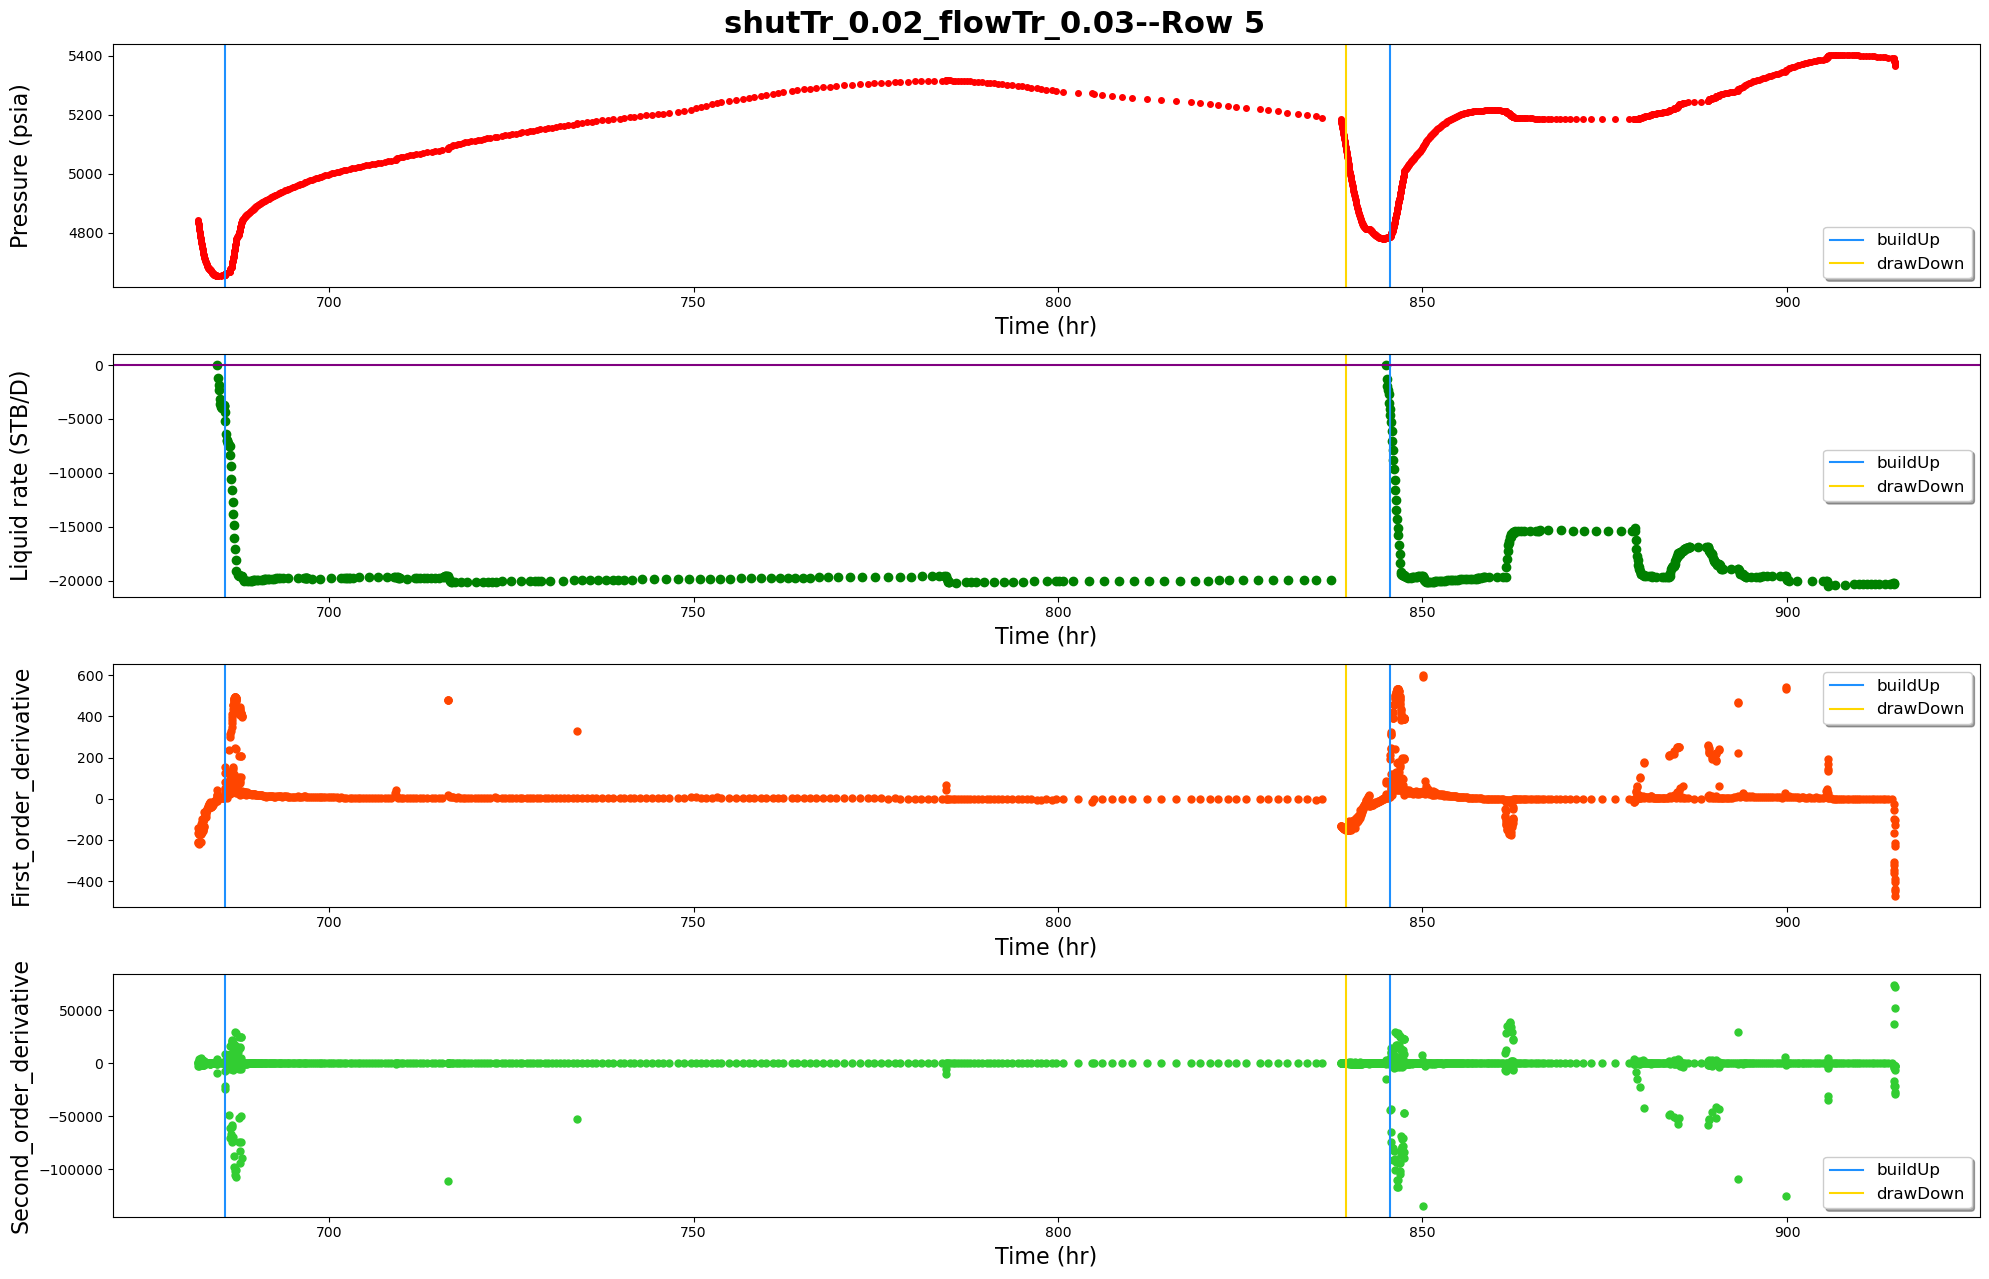

------row 6-----detected points:[6024, 6543]


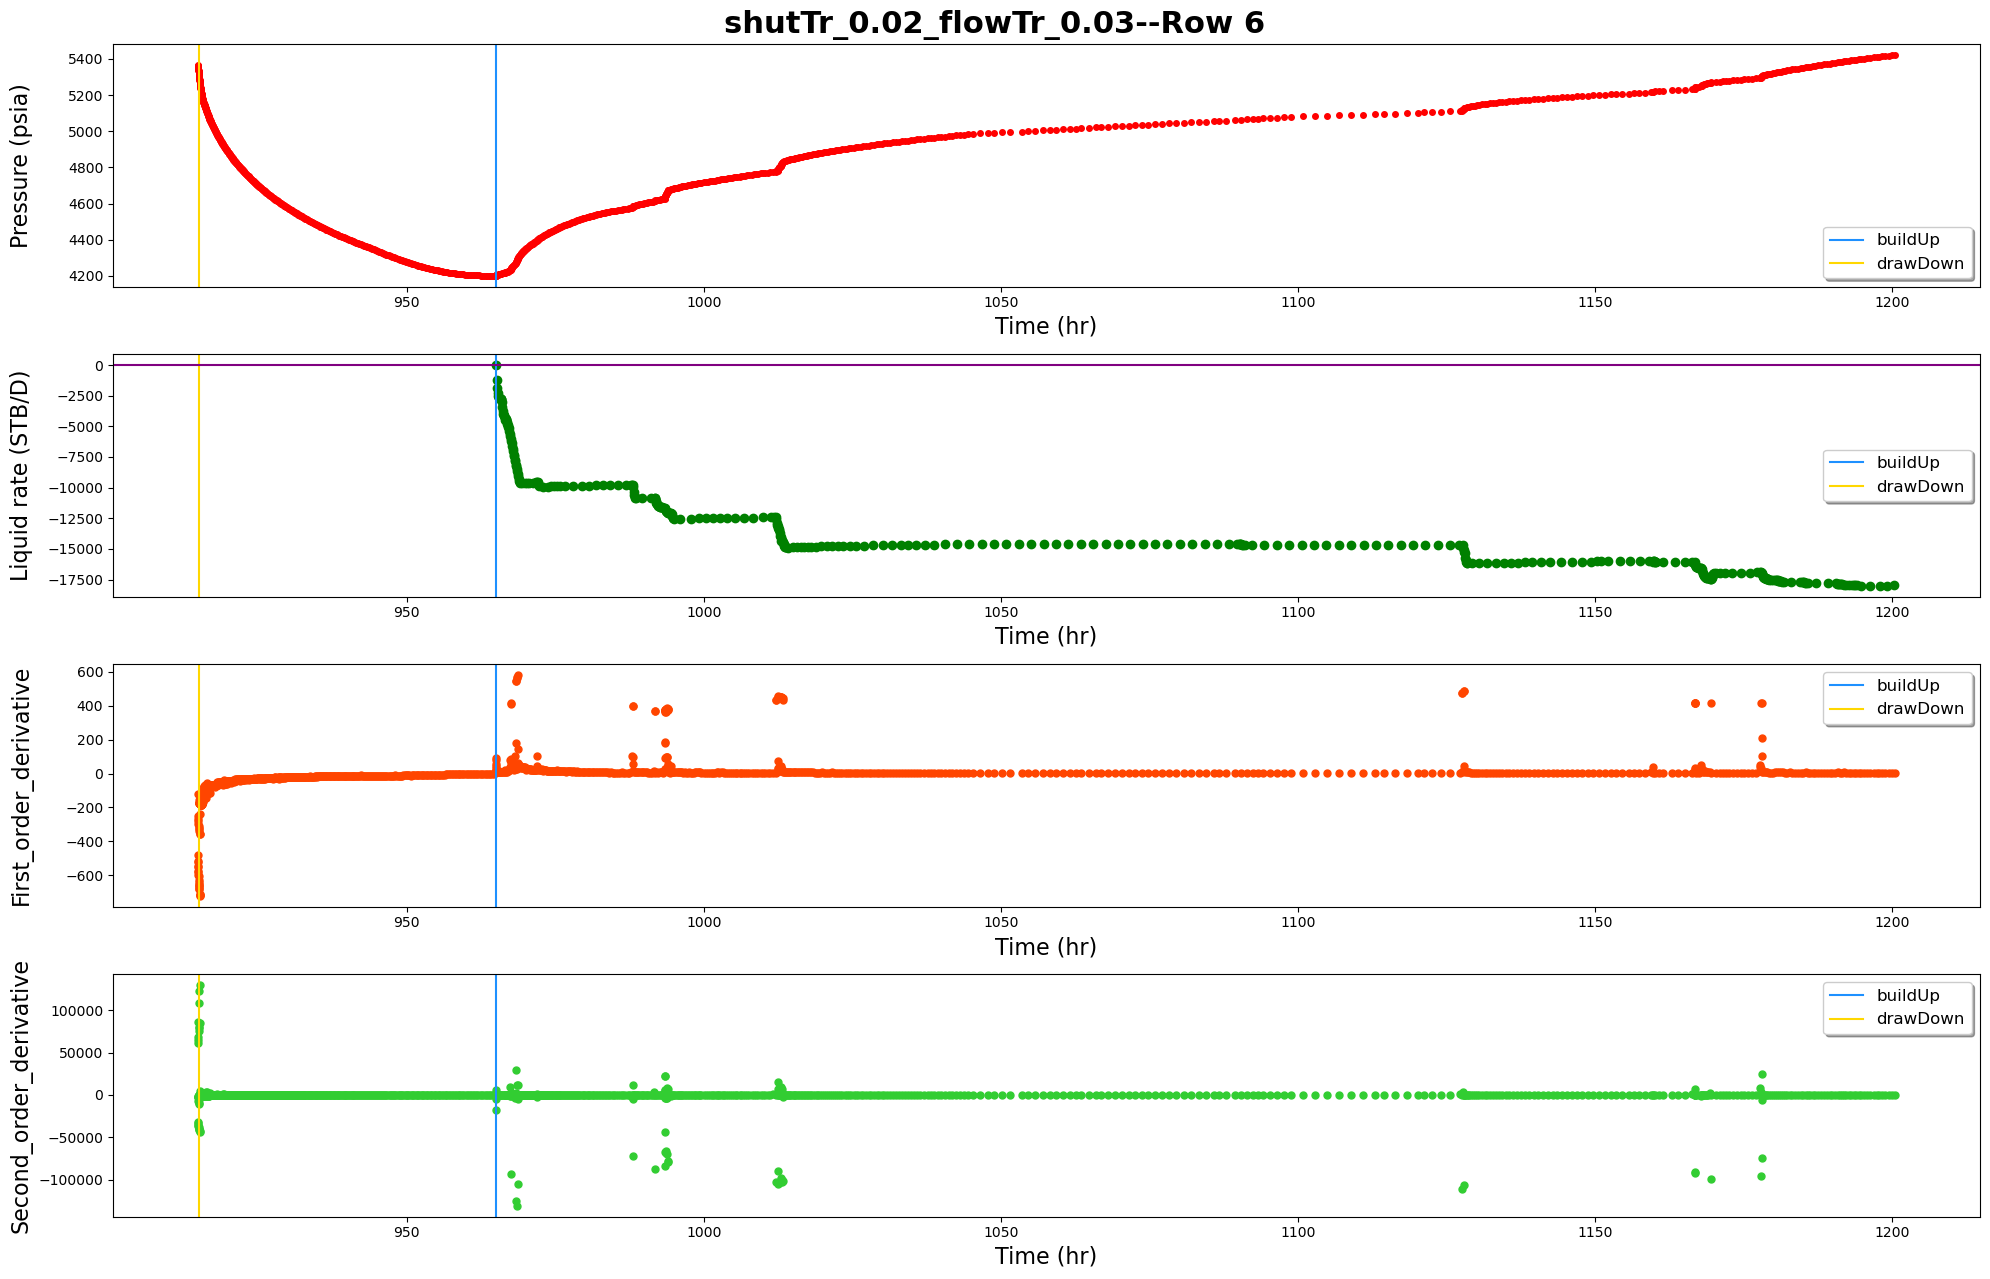

------row 7-----detected points:[7284, 7544, 7988, 8361]


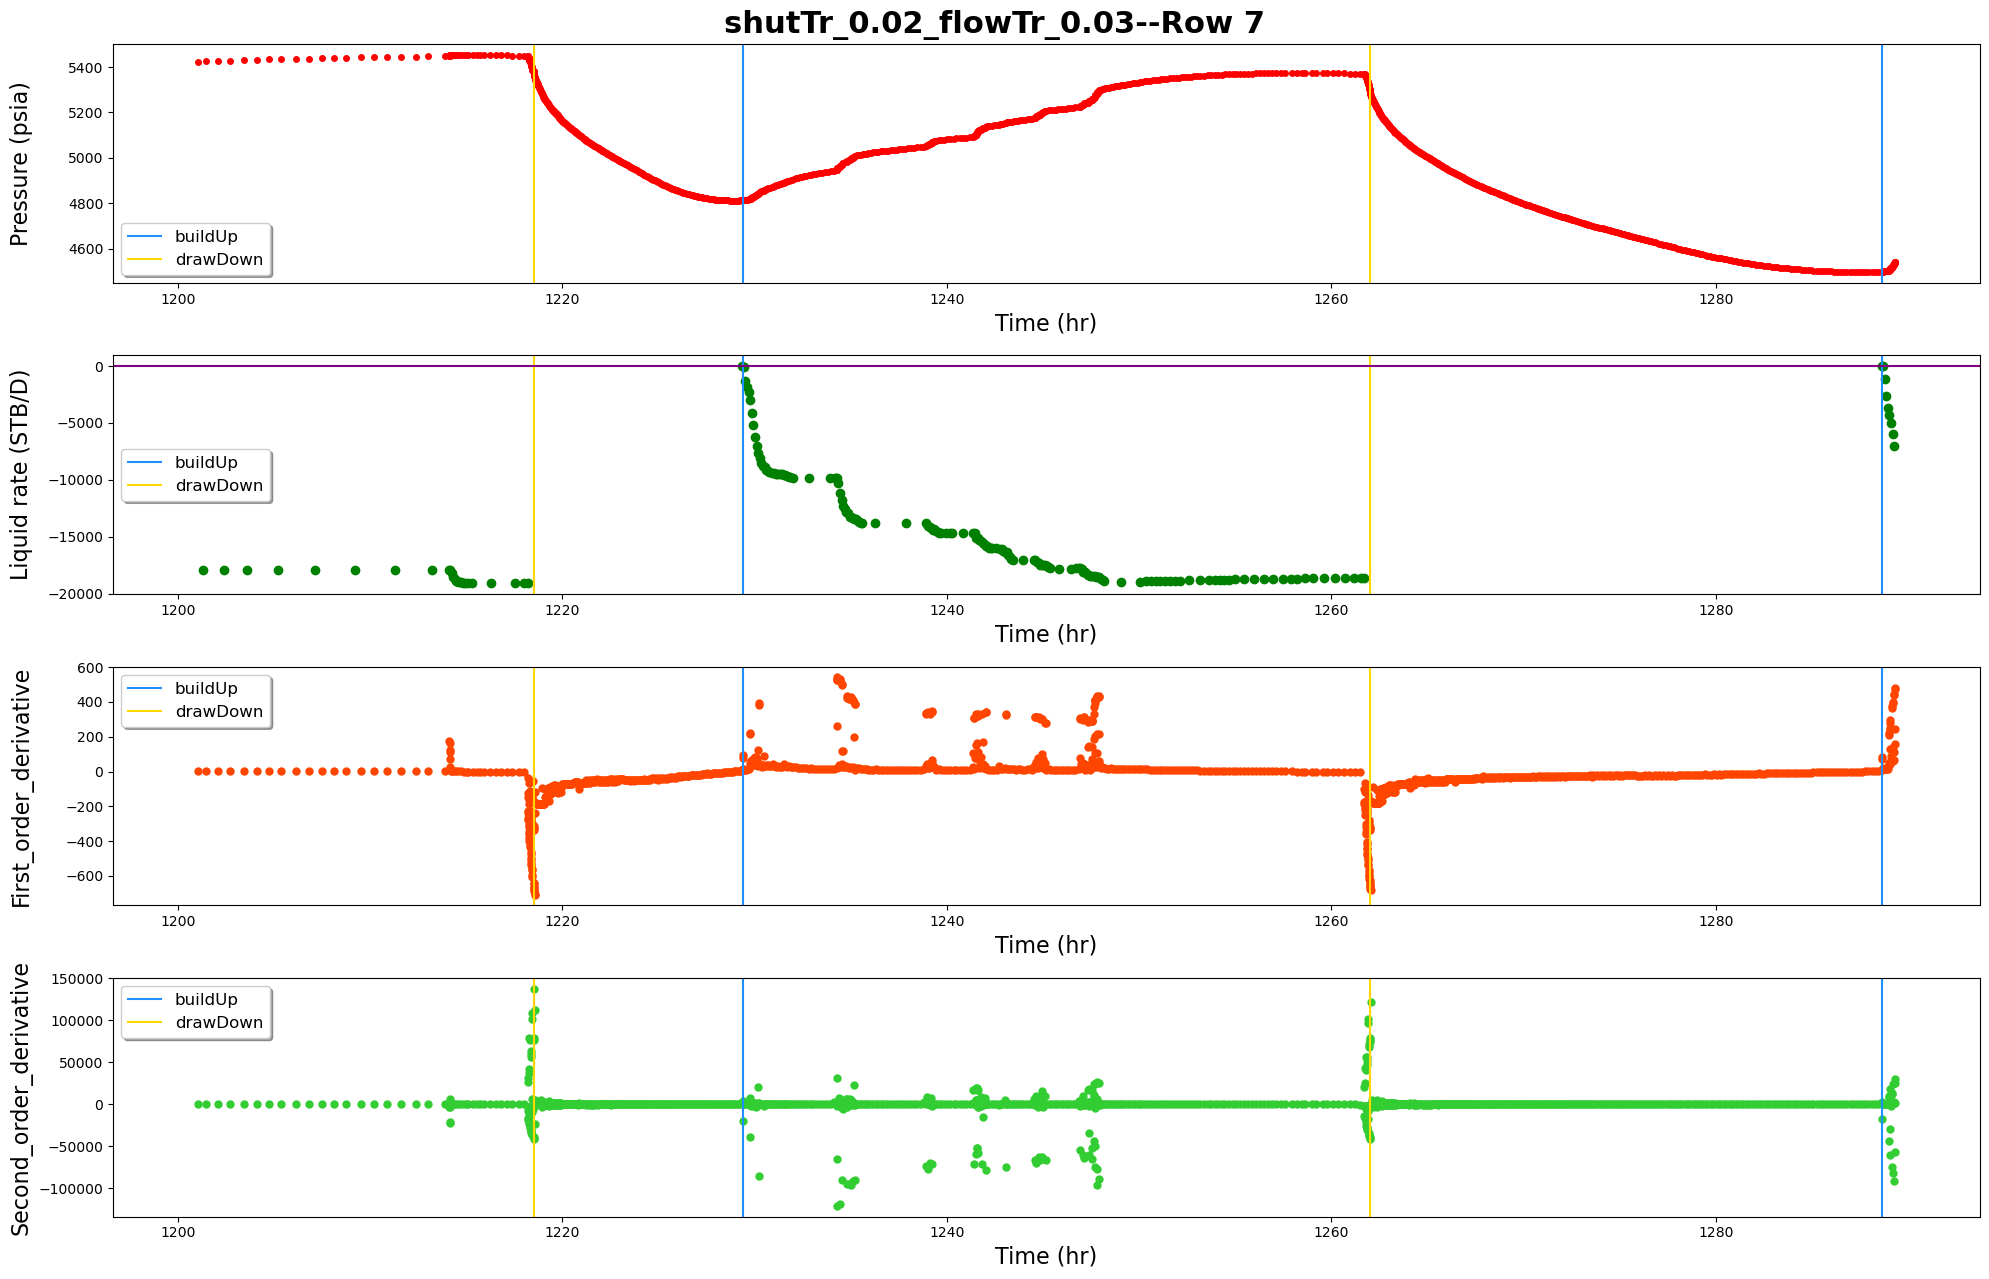

------row 8-----detected points:[9024]


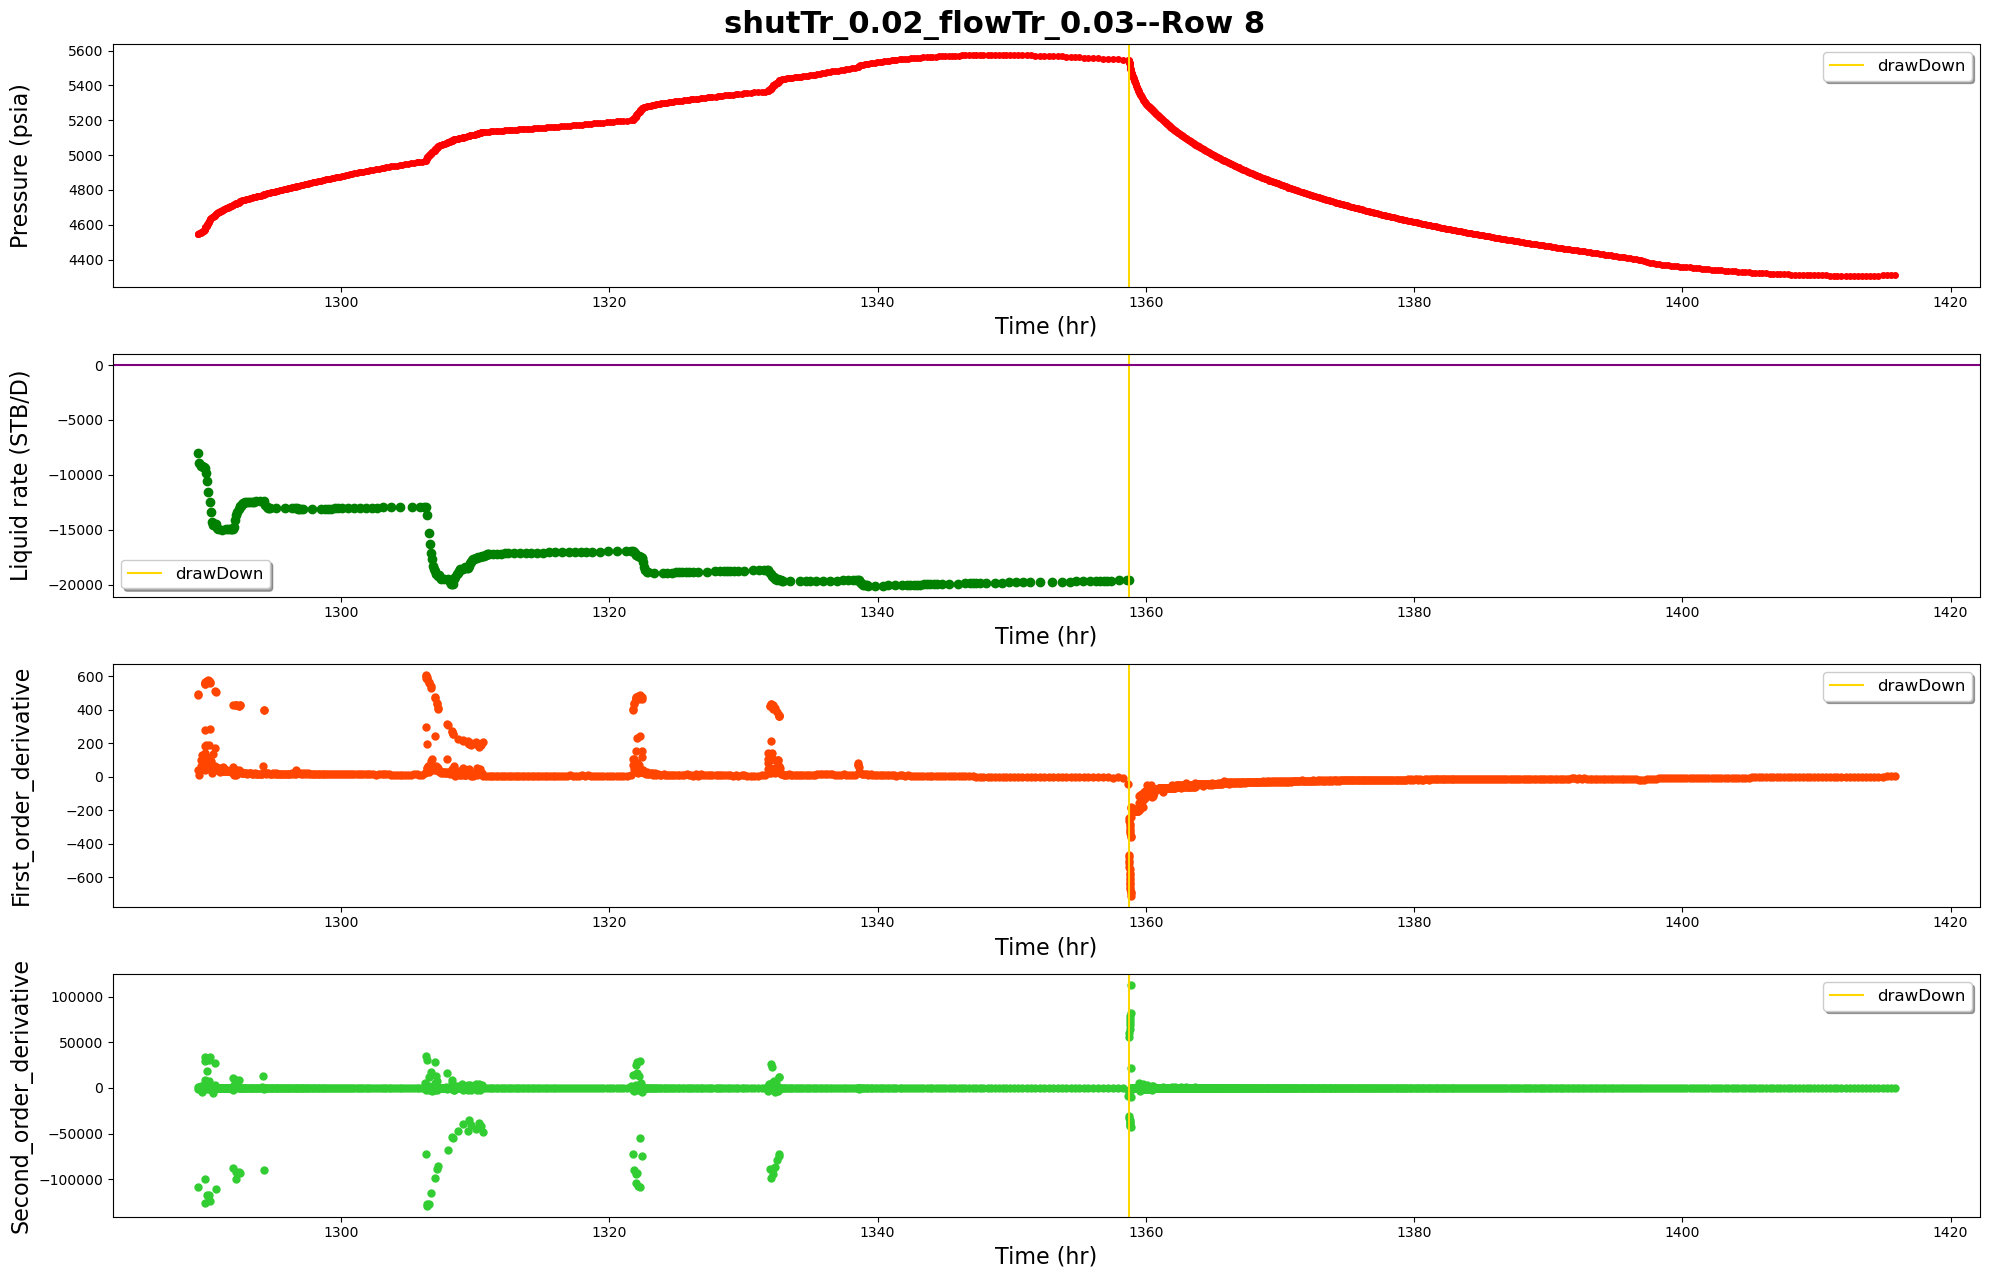

------row 9-----detected points:[9606, 10149, 10224, 10527]


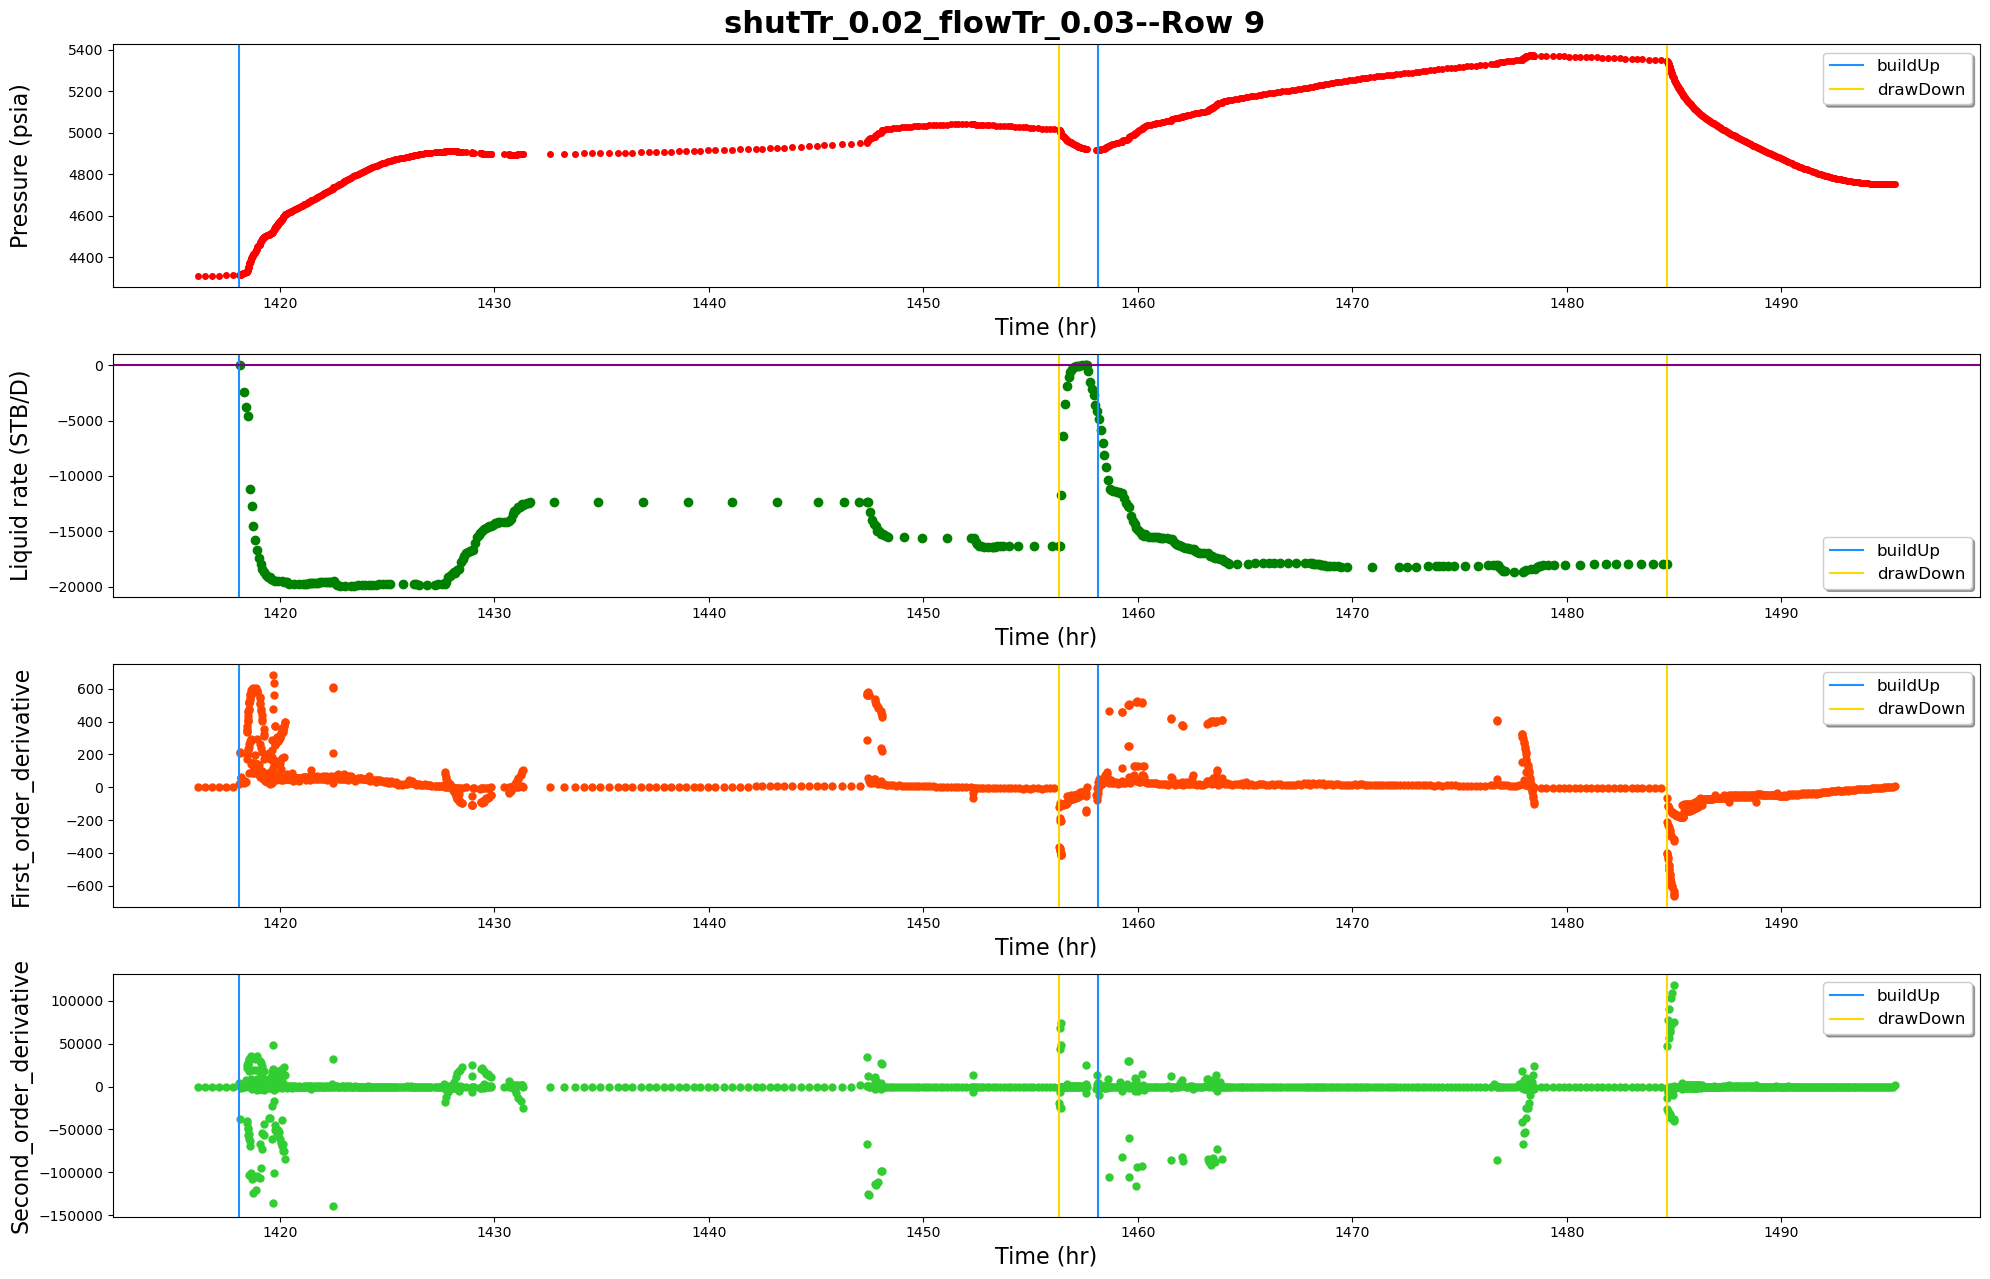

------row 10-----detected points:[10800, 11340, 11490]


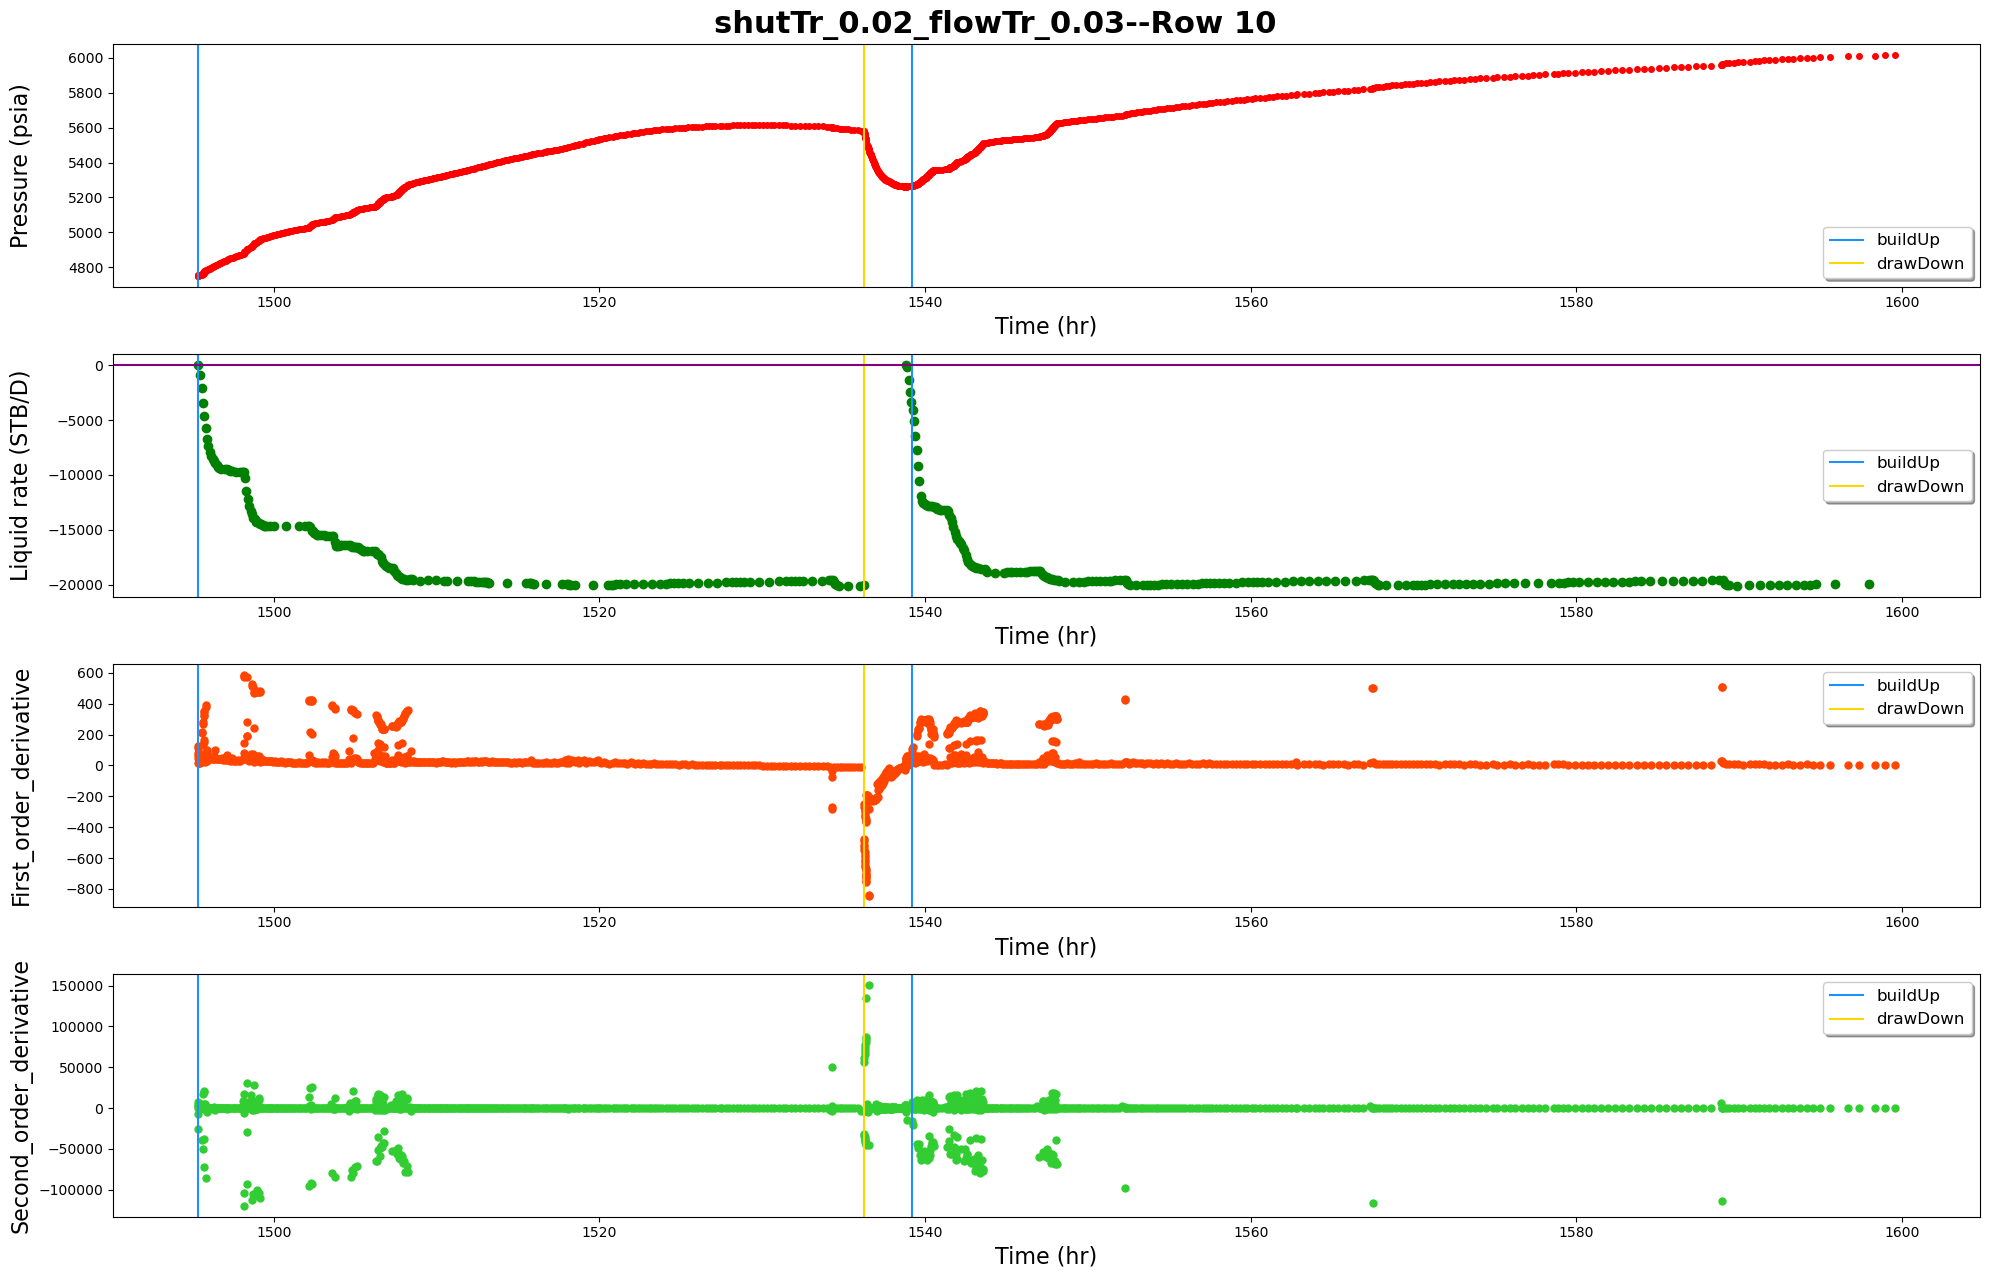

------row 11-----detected points:[12362, 13038]


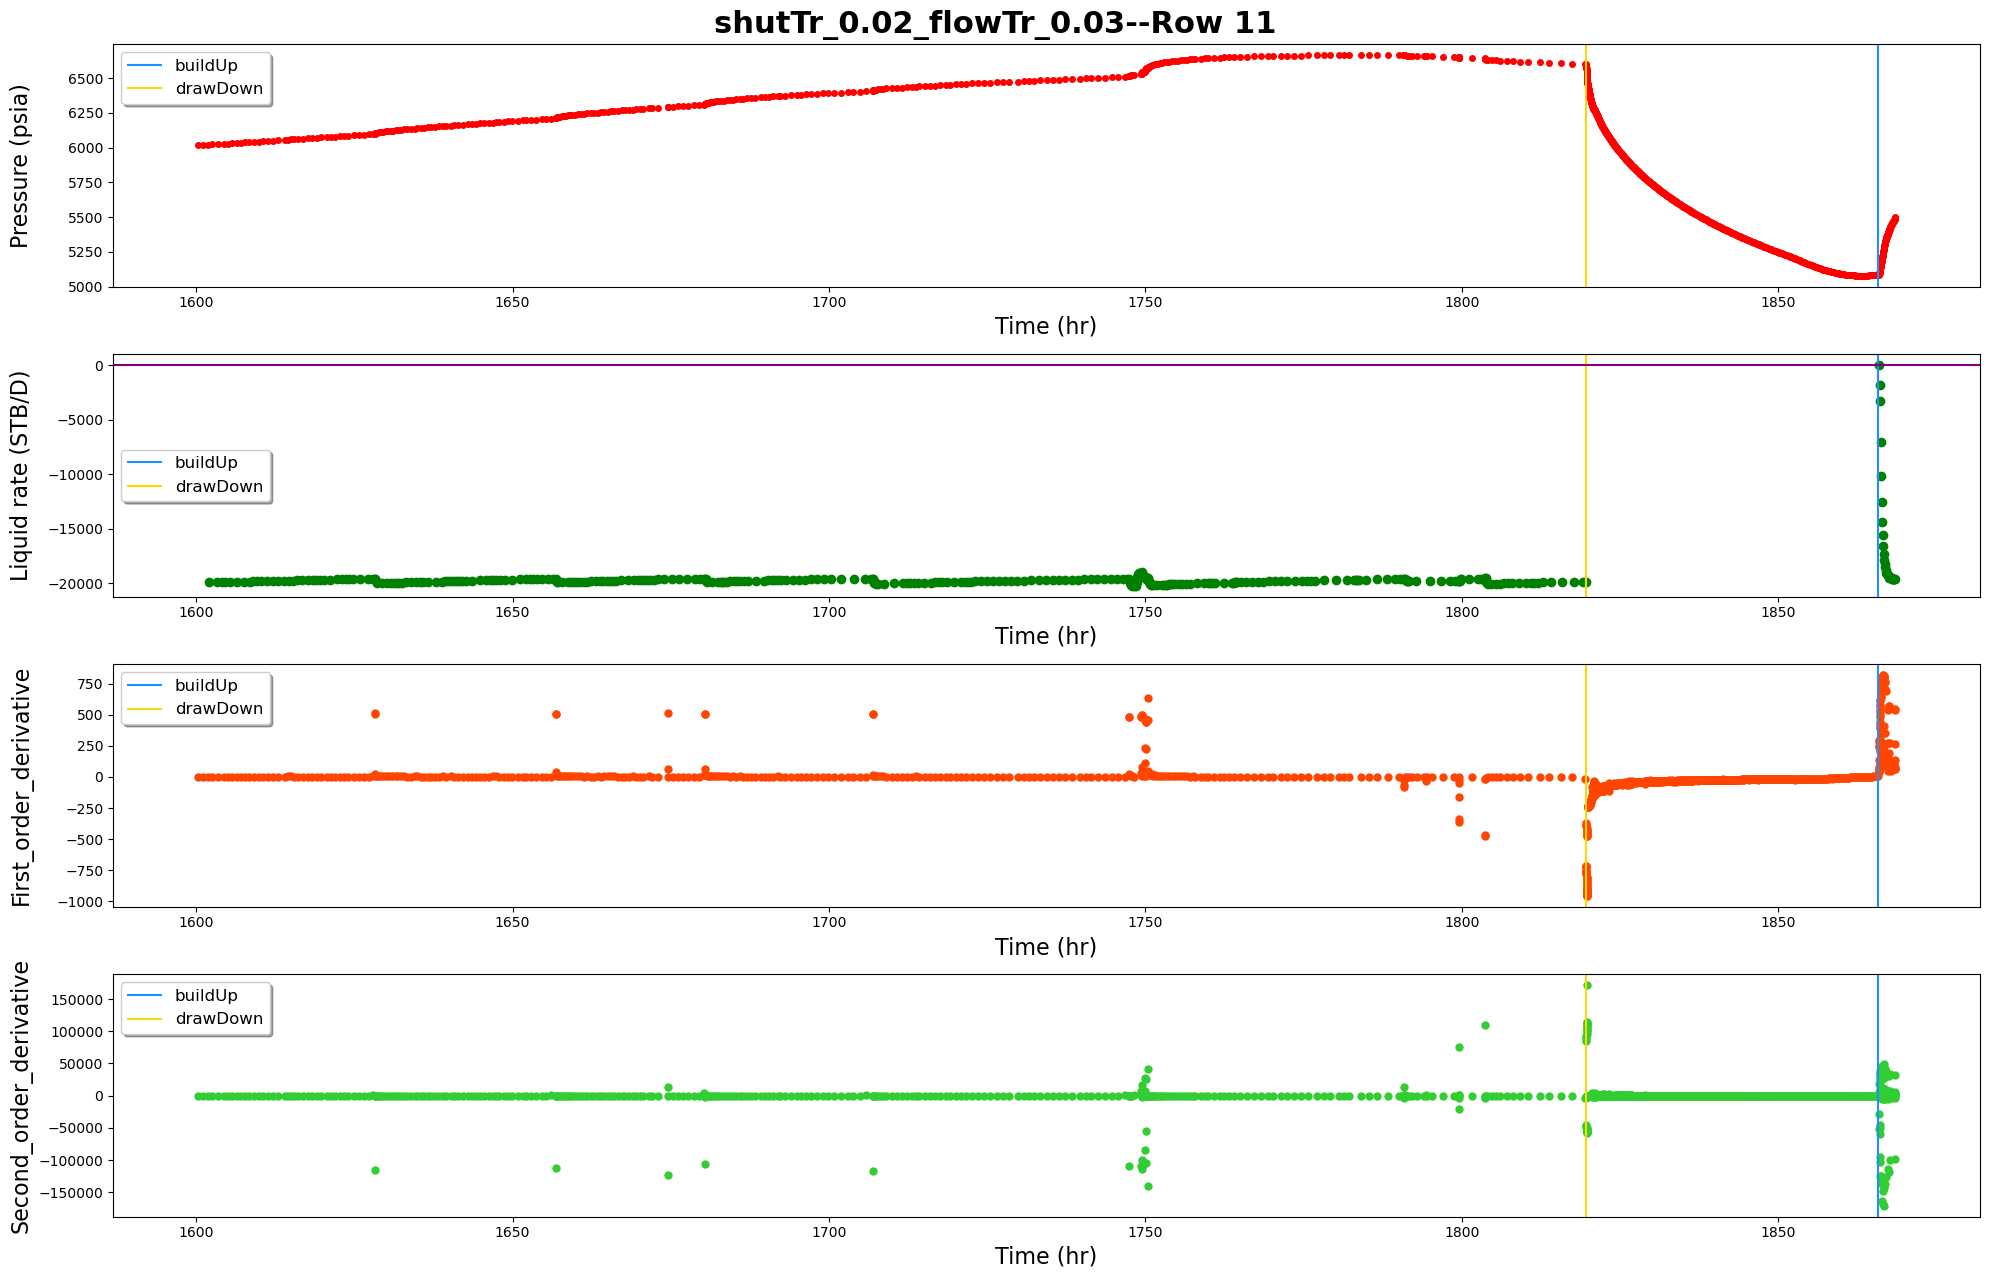

------row 12-----detected points:[13909, 14089]


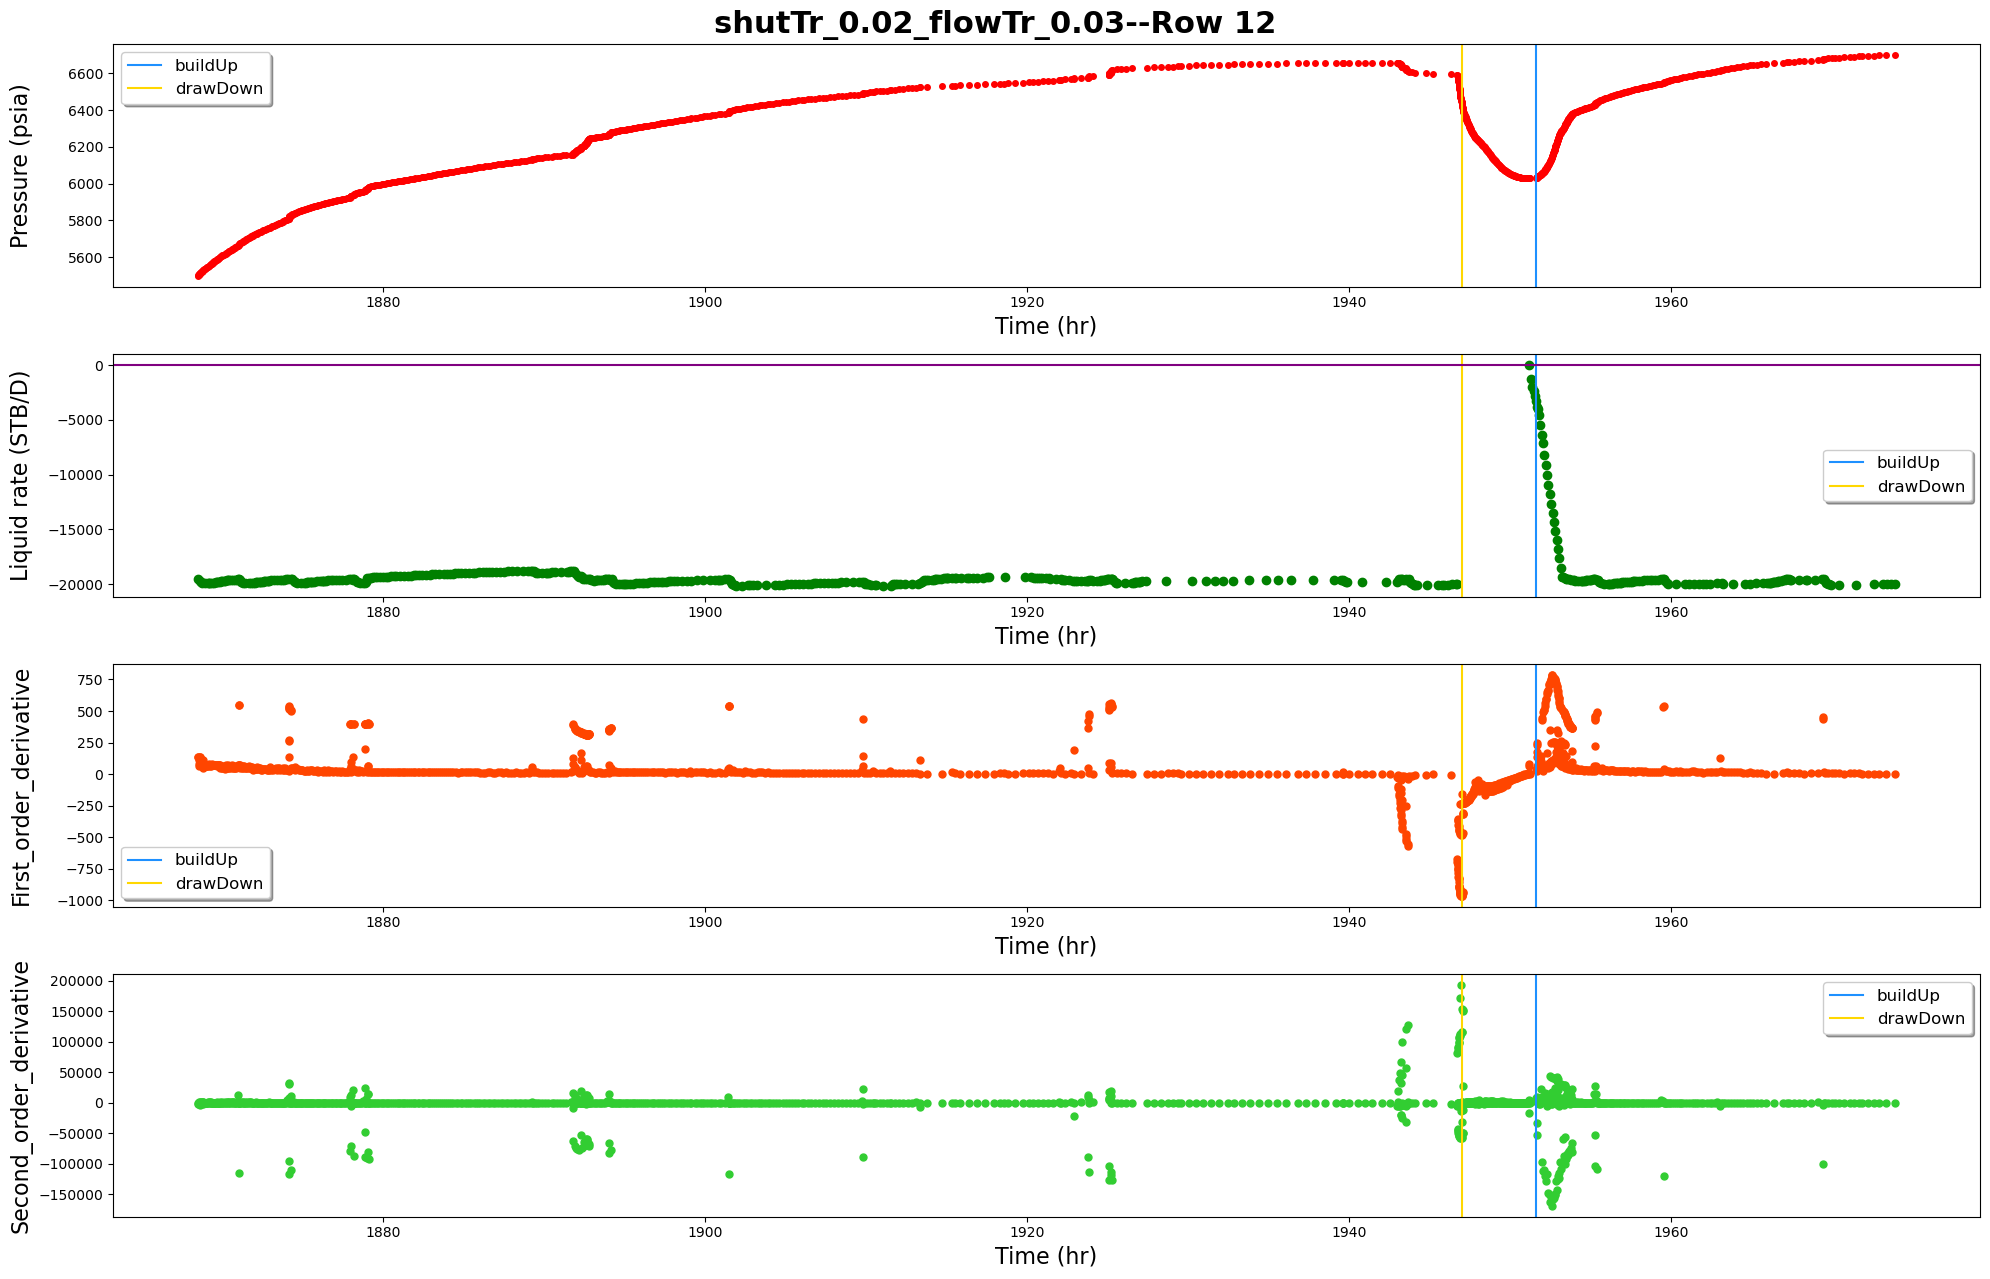

------row 13-----detected points:[14471, 14569, 14774, 15329]


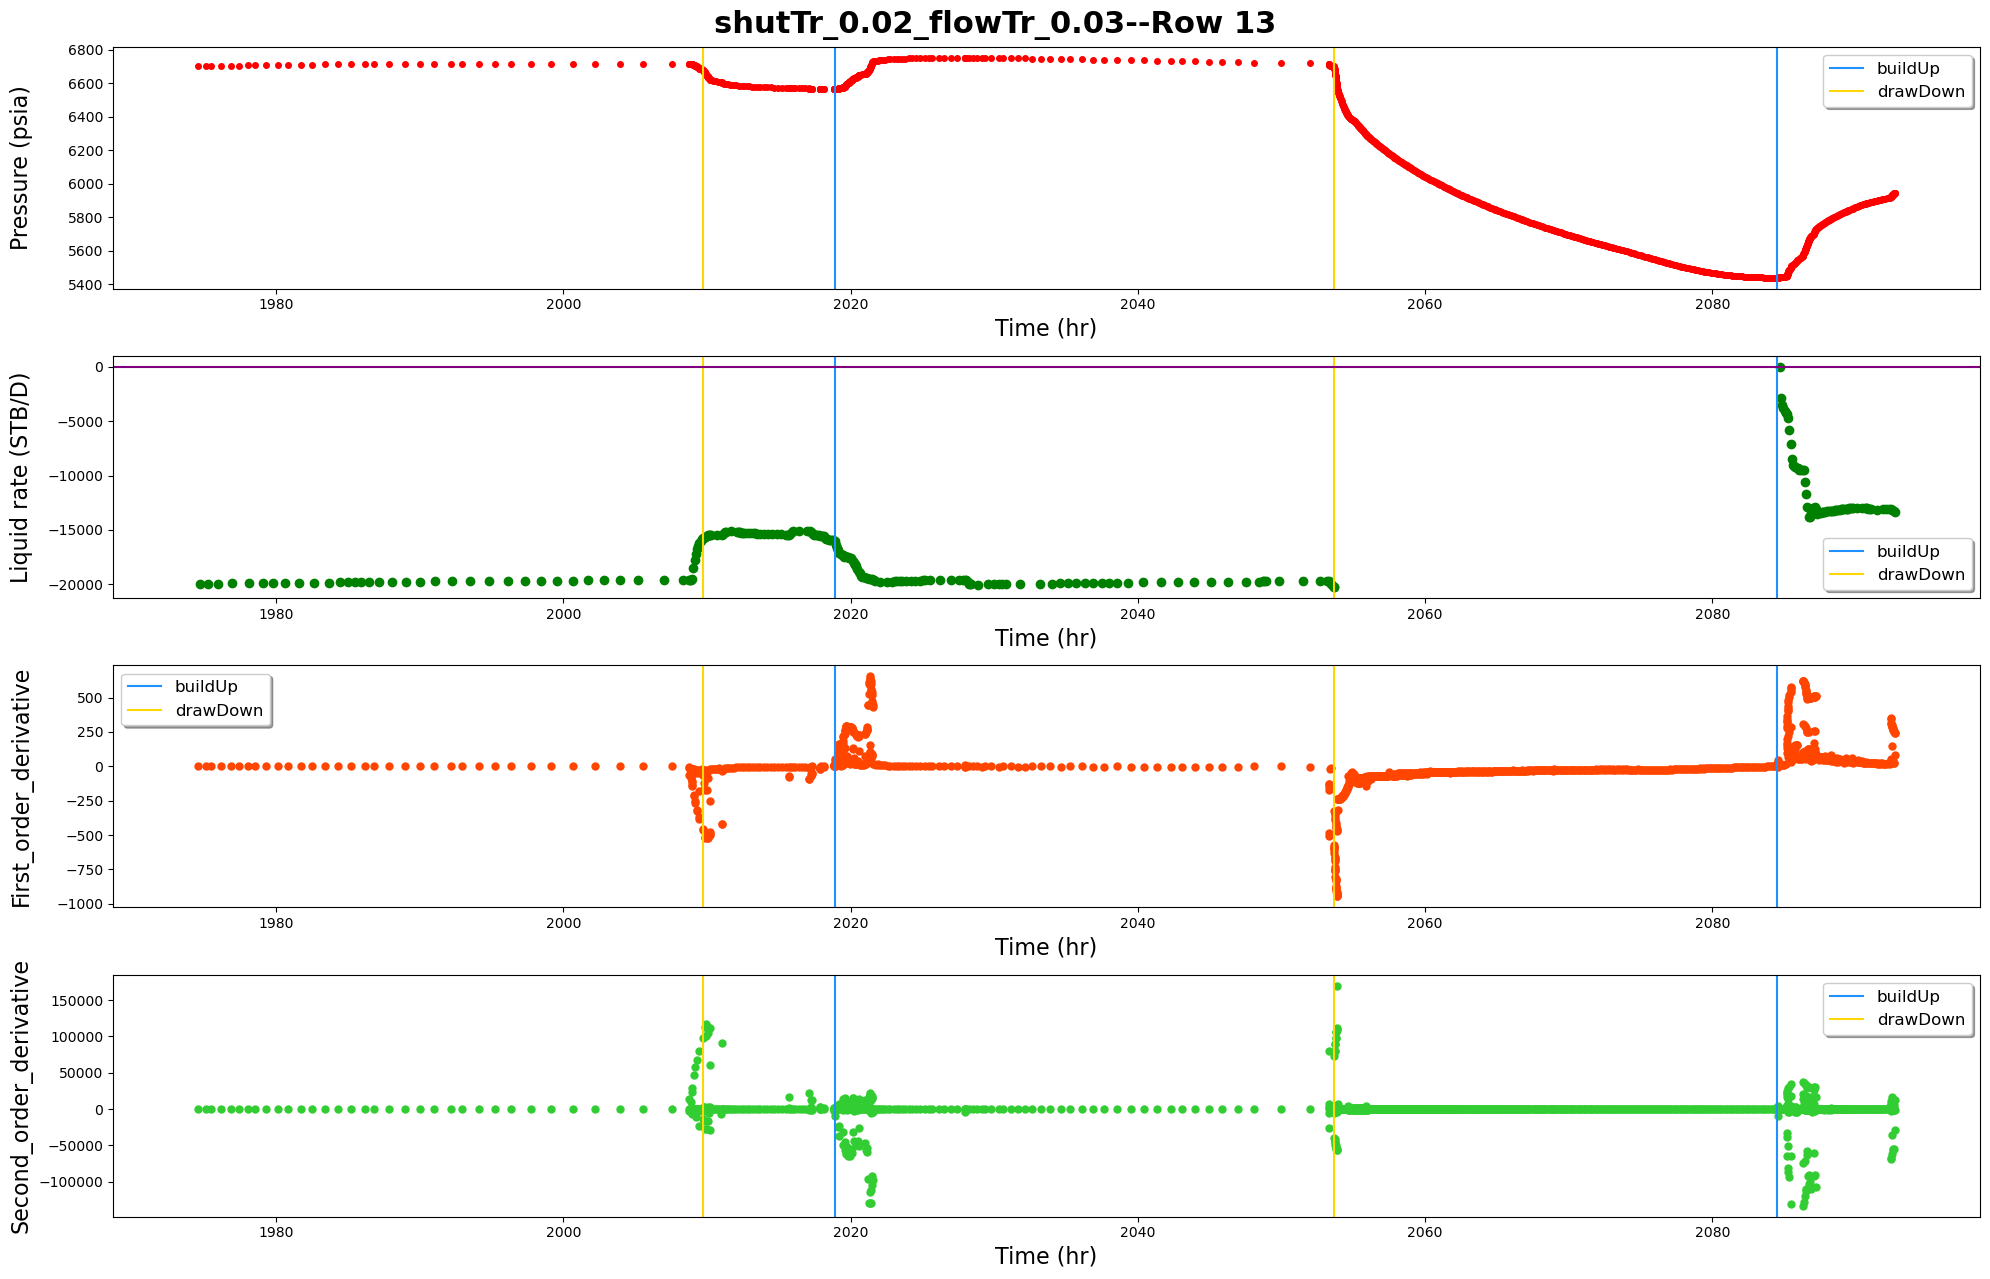

------row 14-----detected points:[16096, 16580]


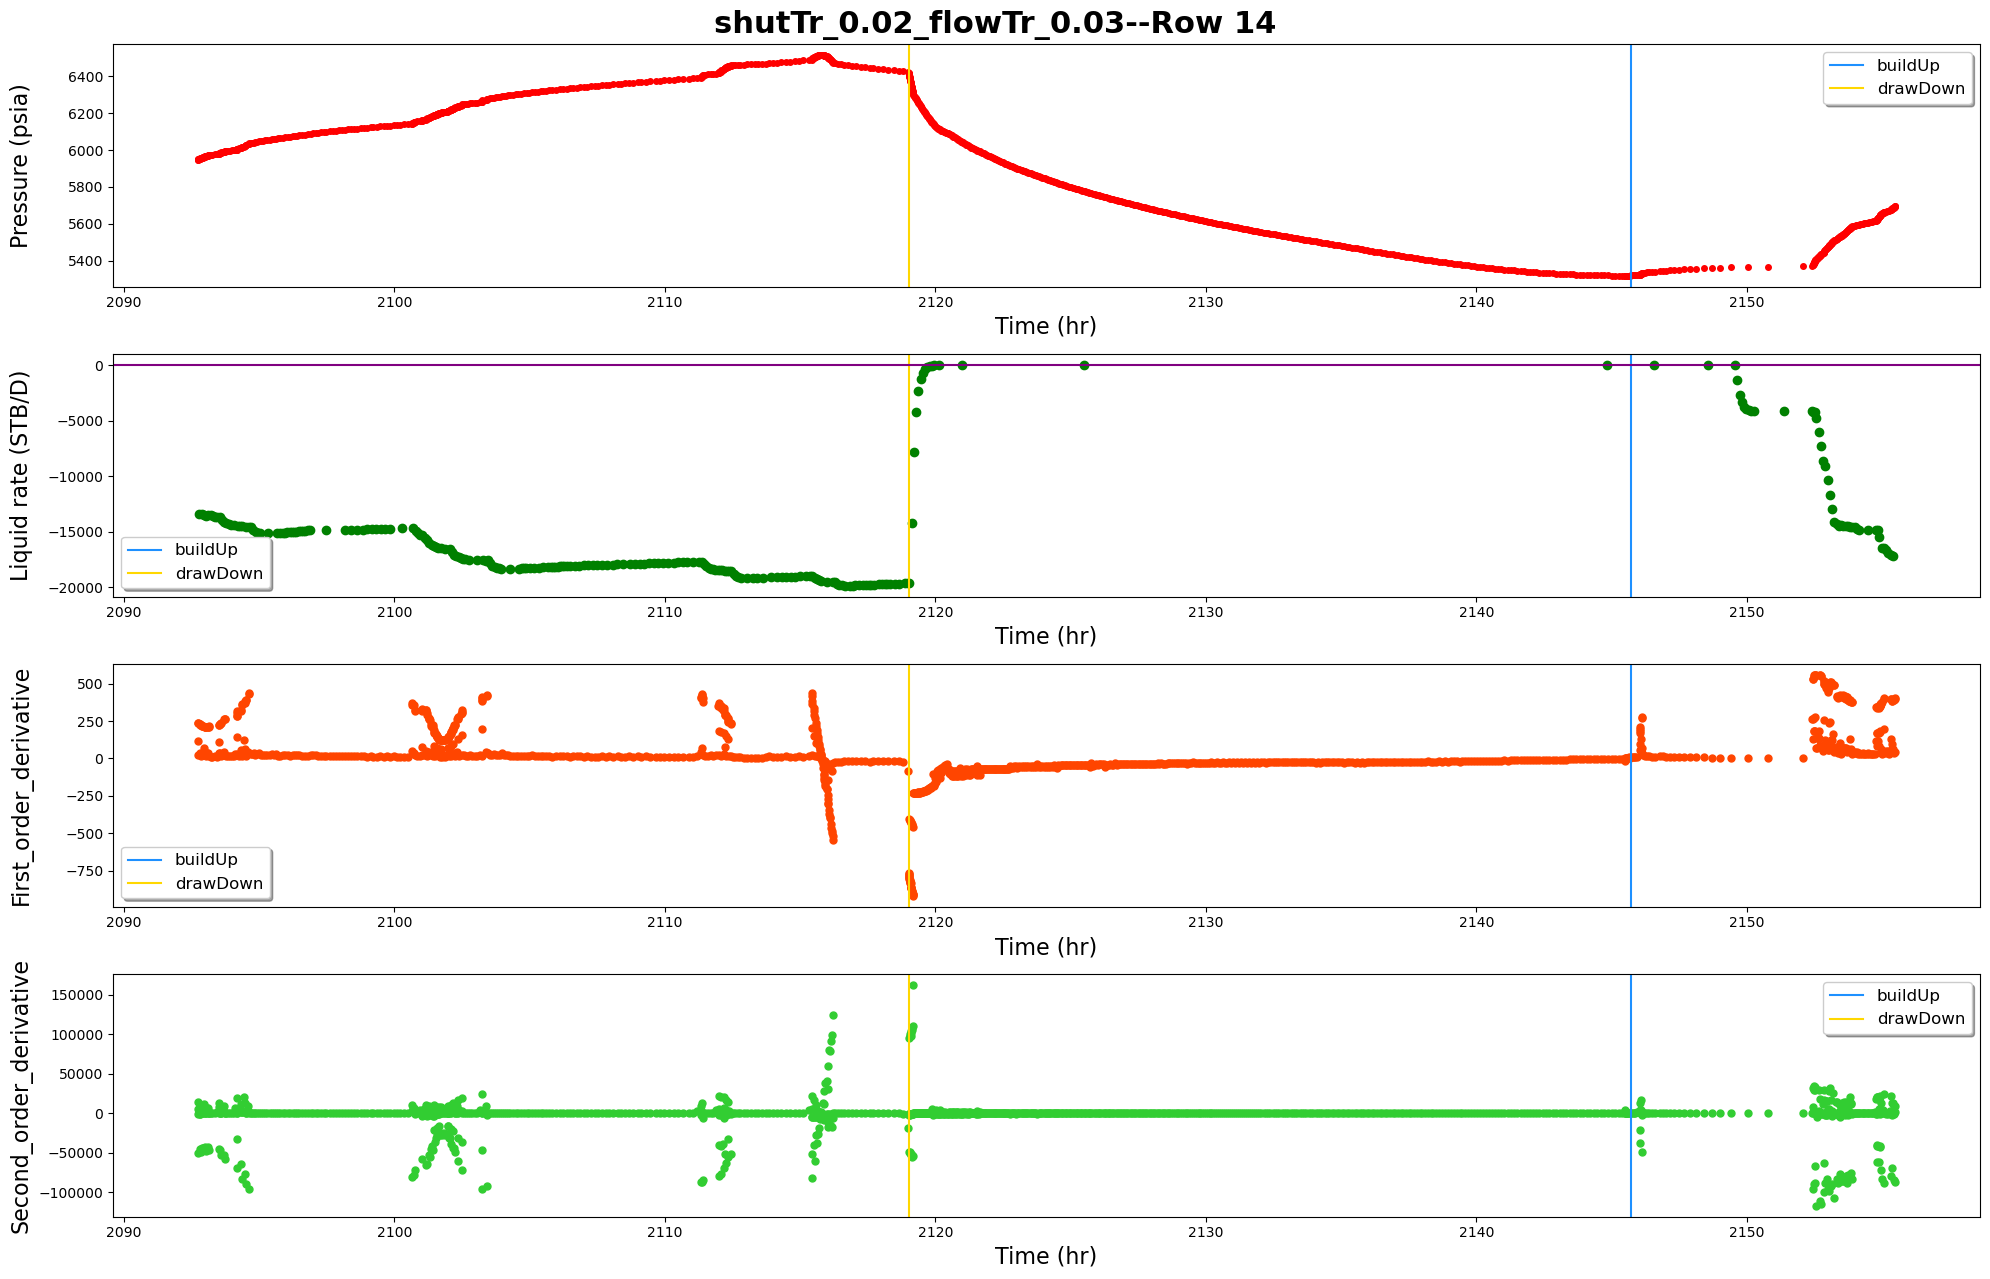

------row 15-----detected points:[17589]


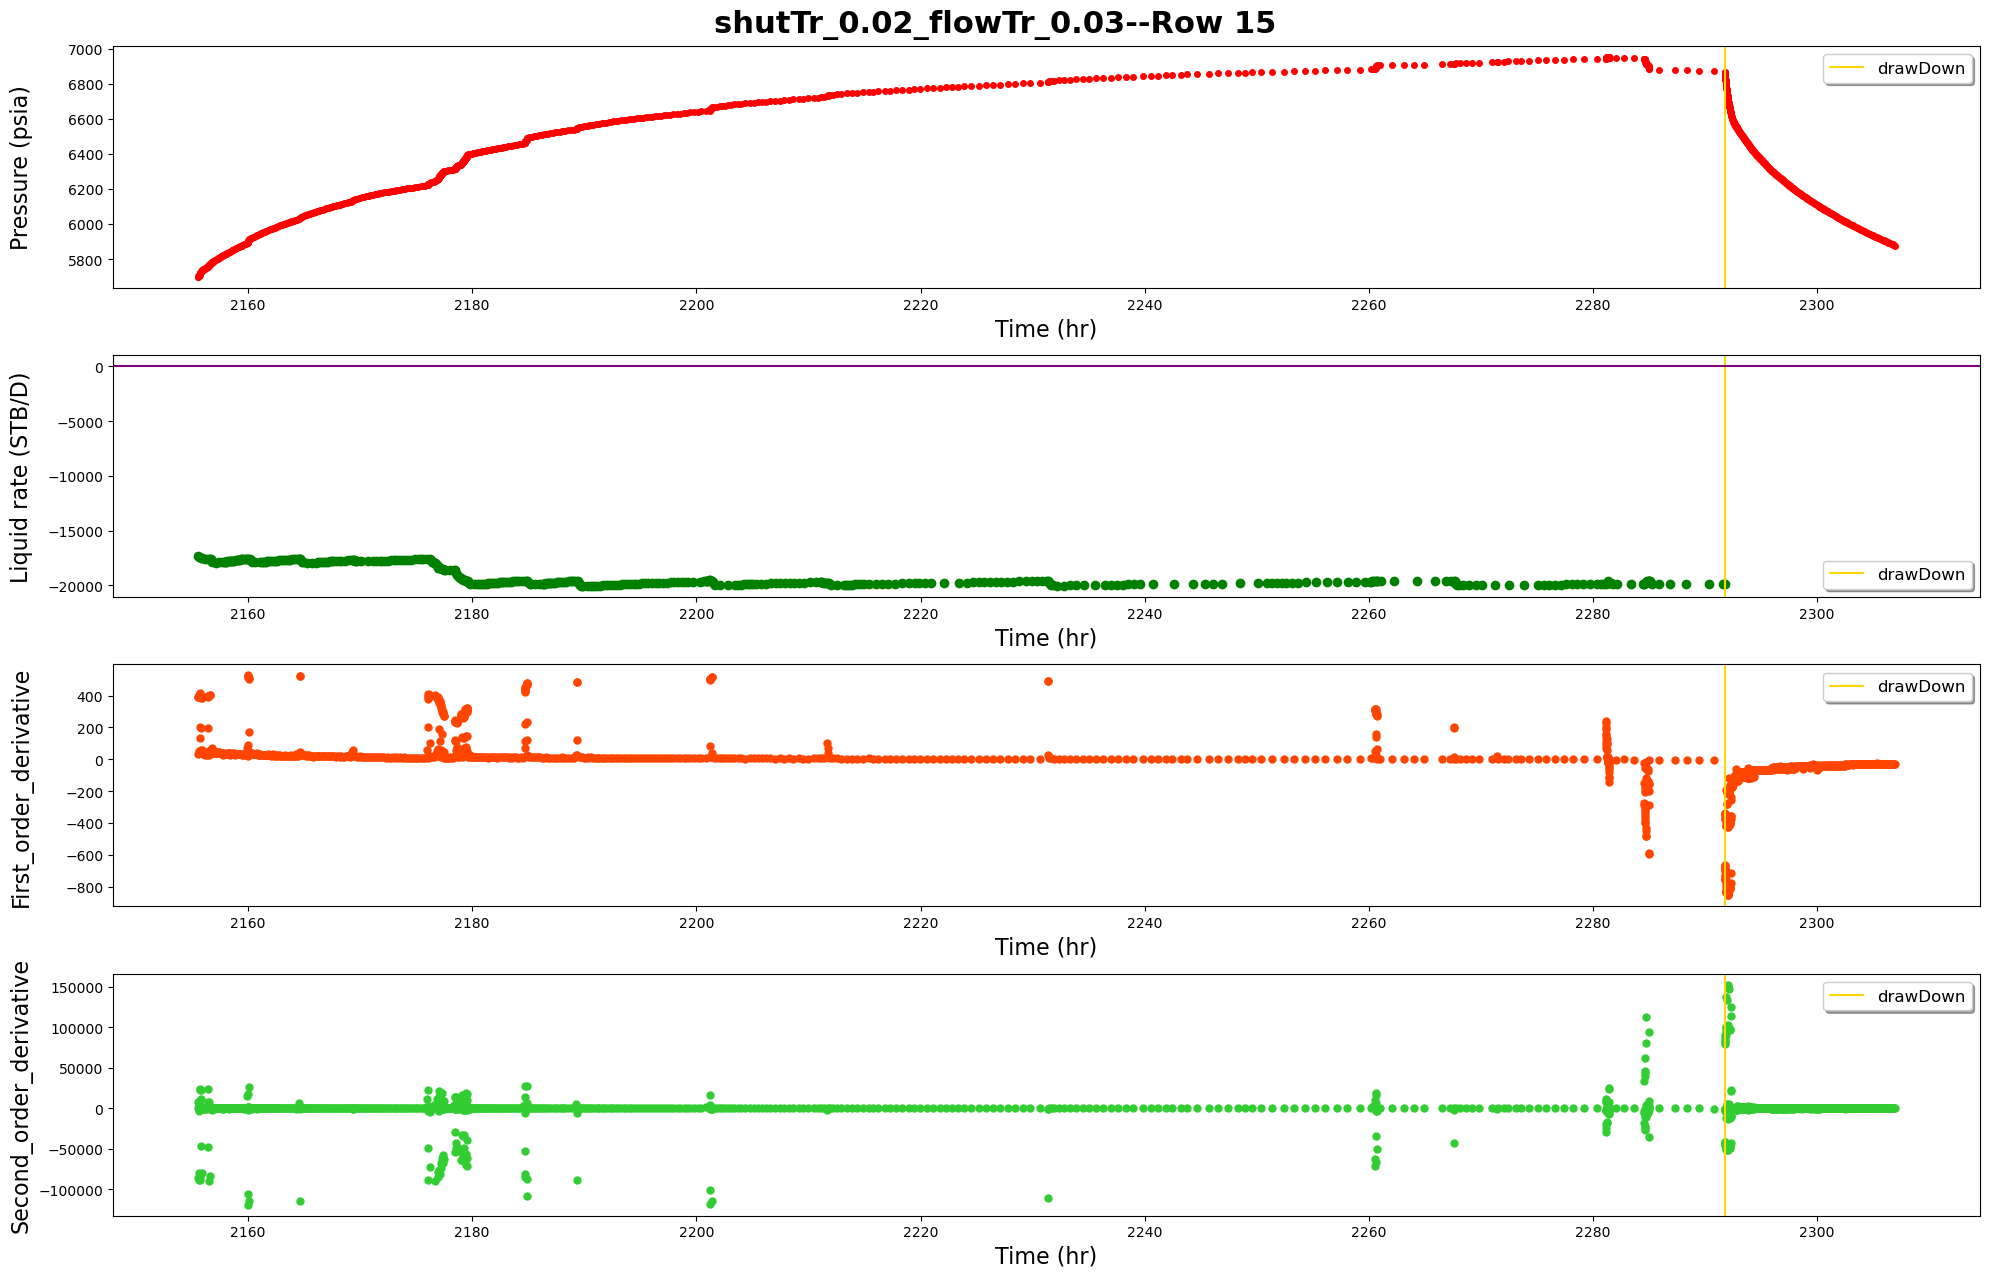

------row 16-----detected points:[18433]


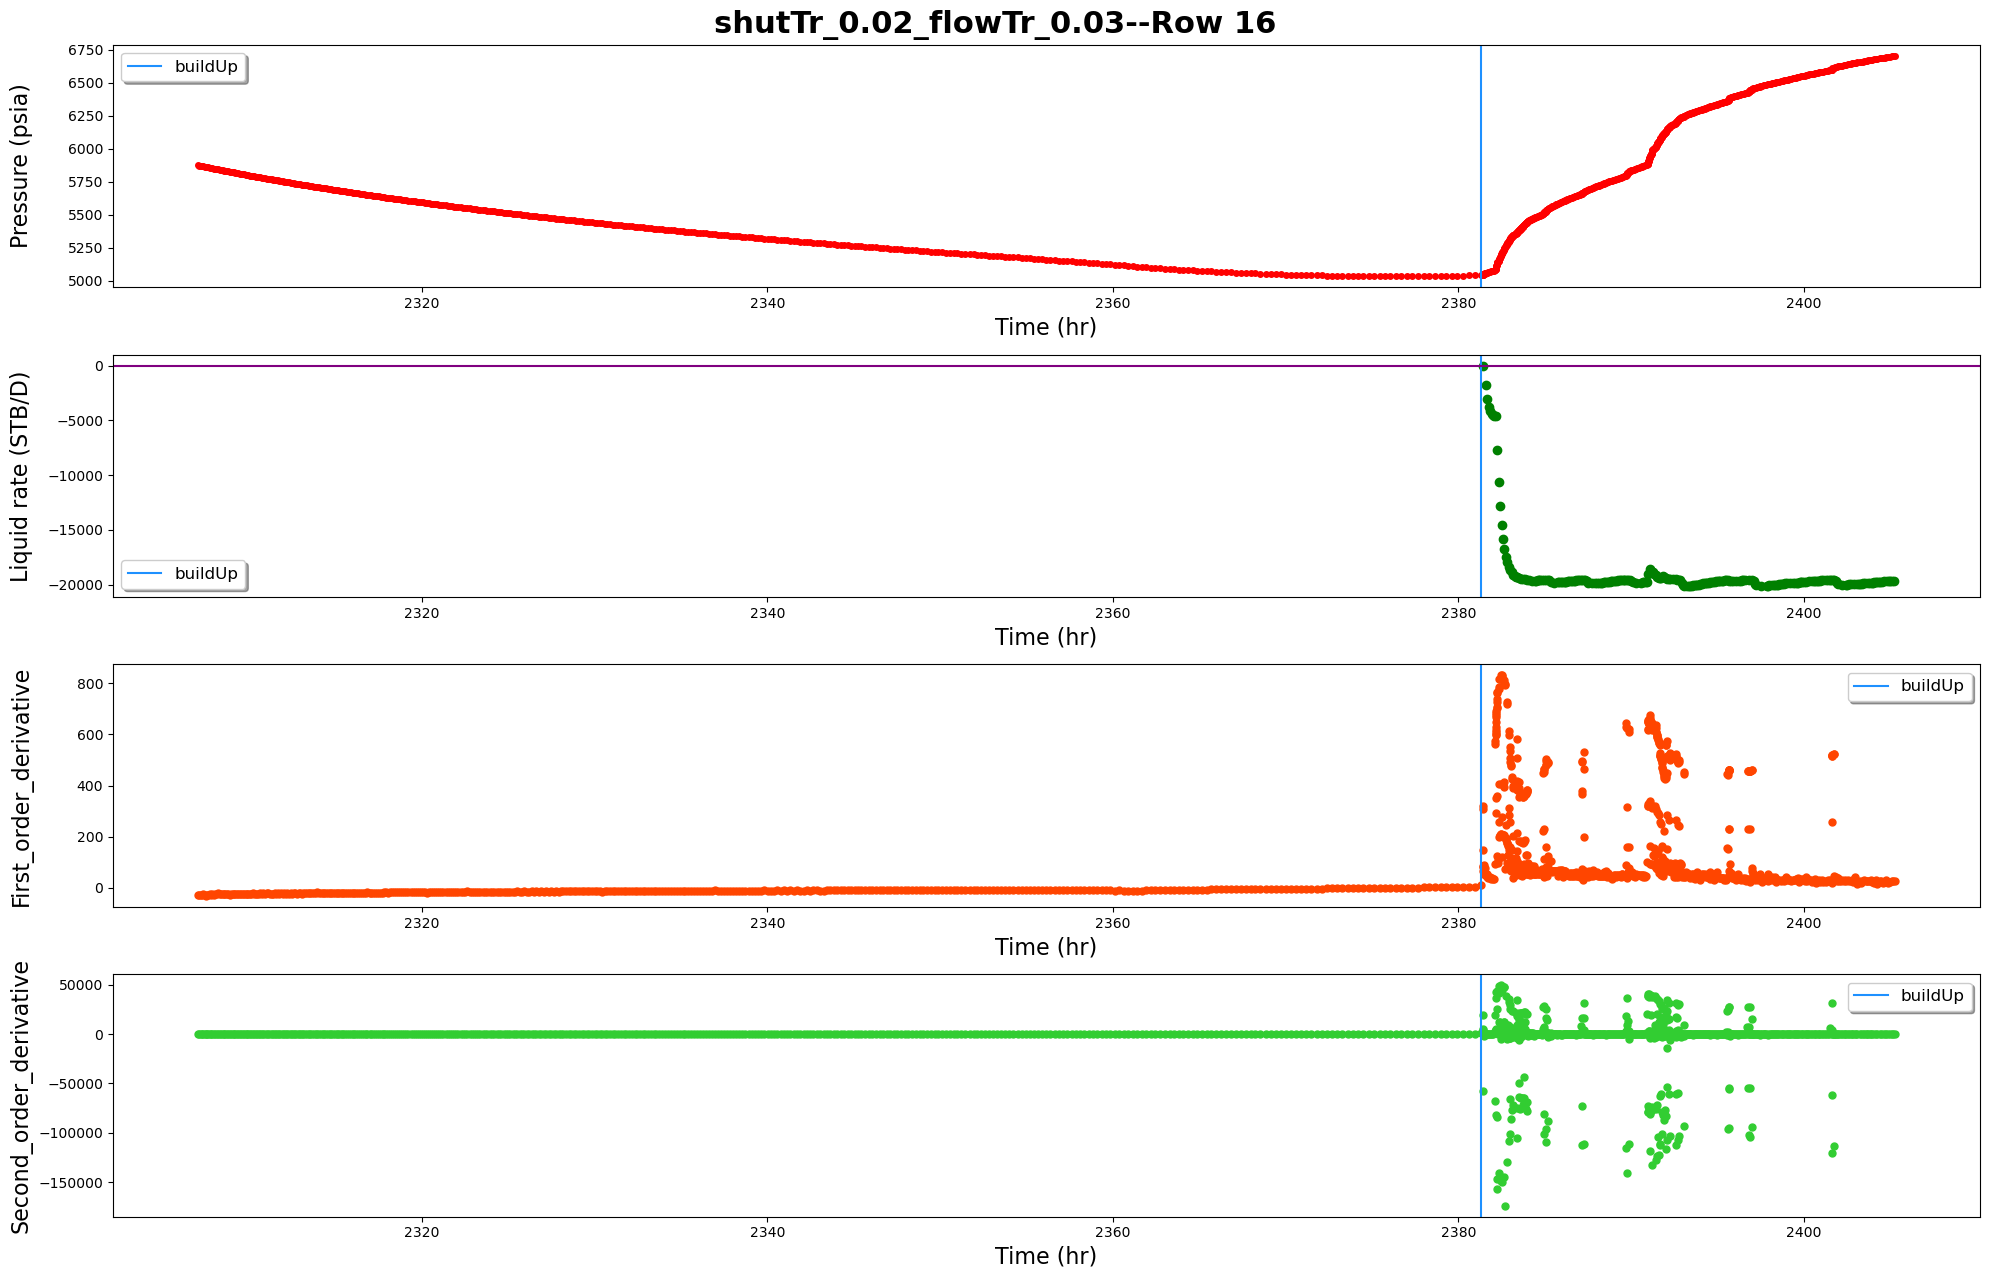

------row 17-----detected points:[19642, 19765, 20077, 20333]


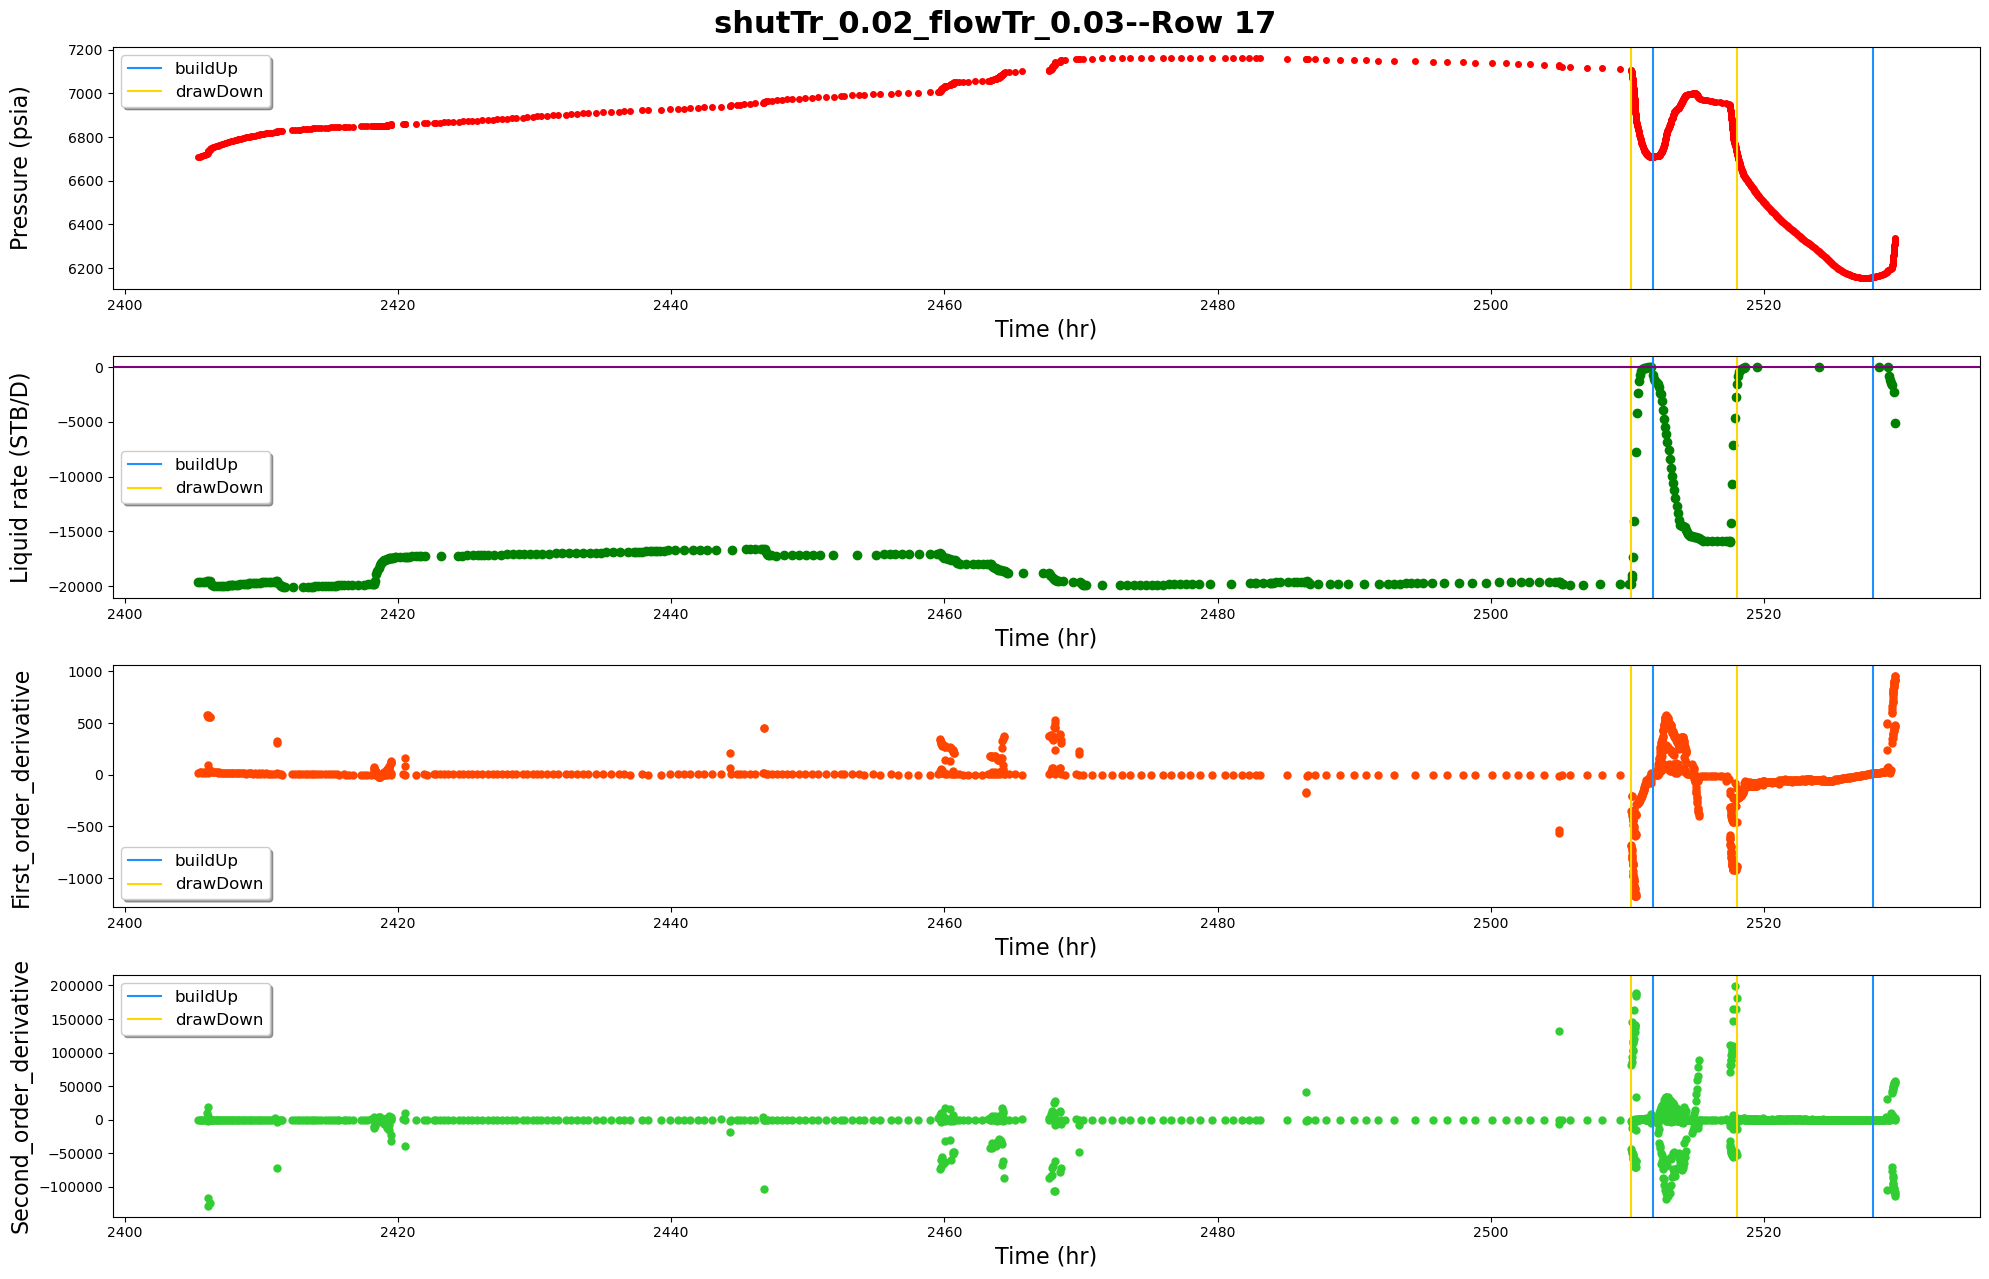

------row 18-----detected points:[20700, 21026]


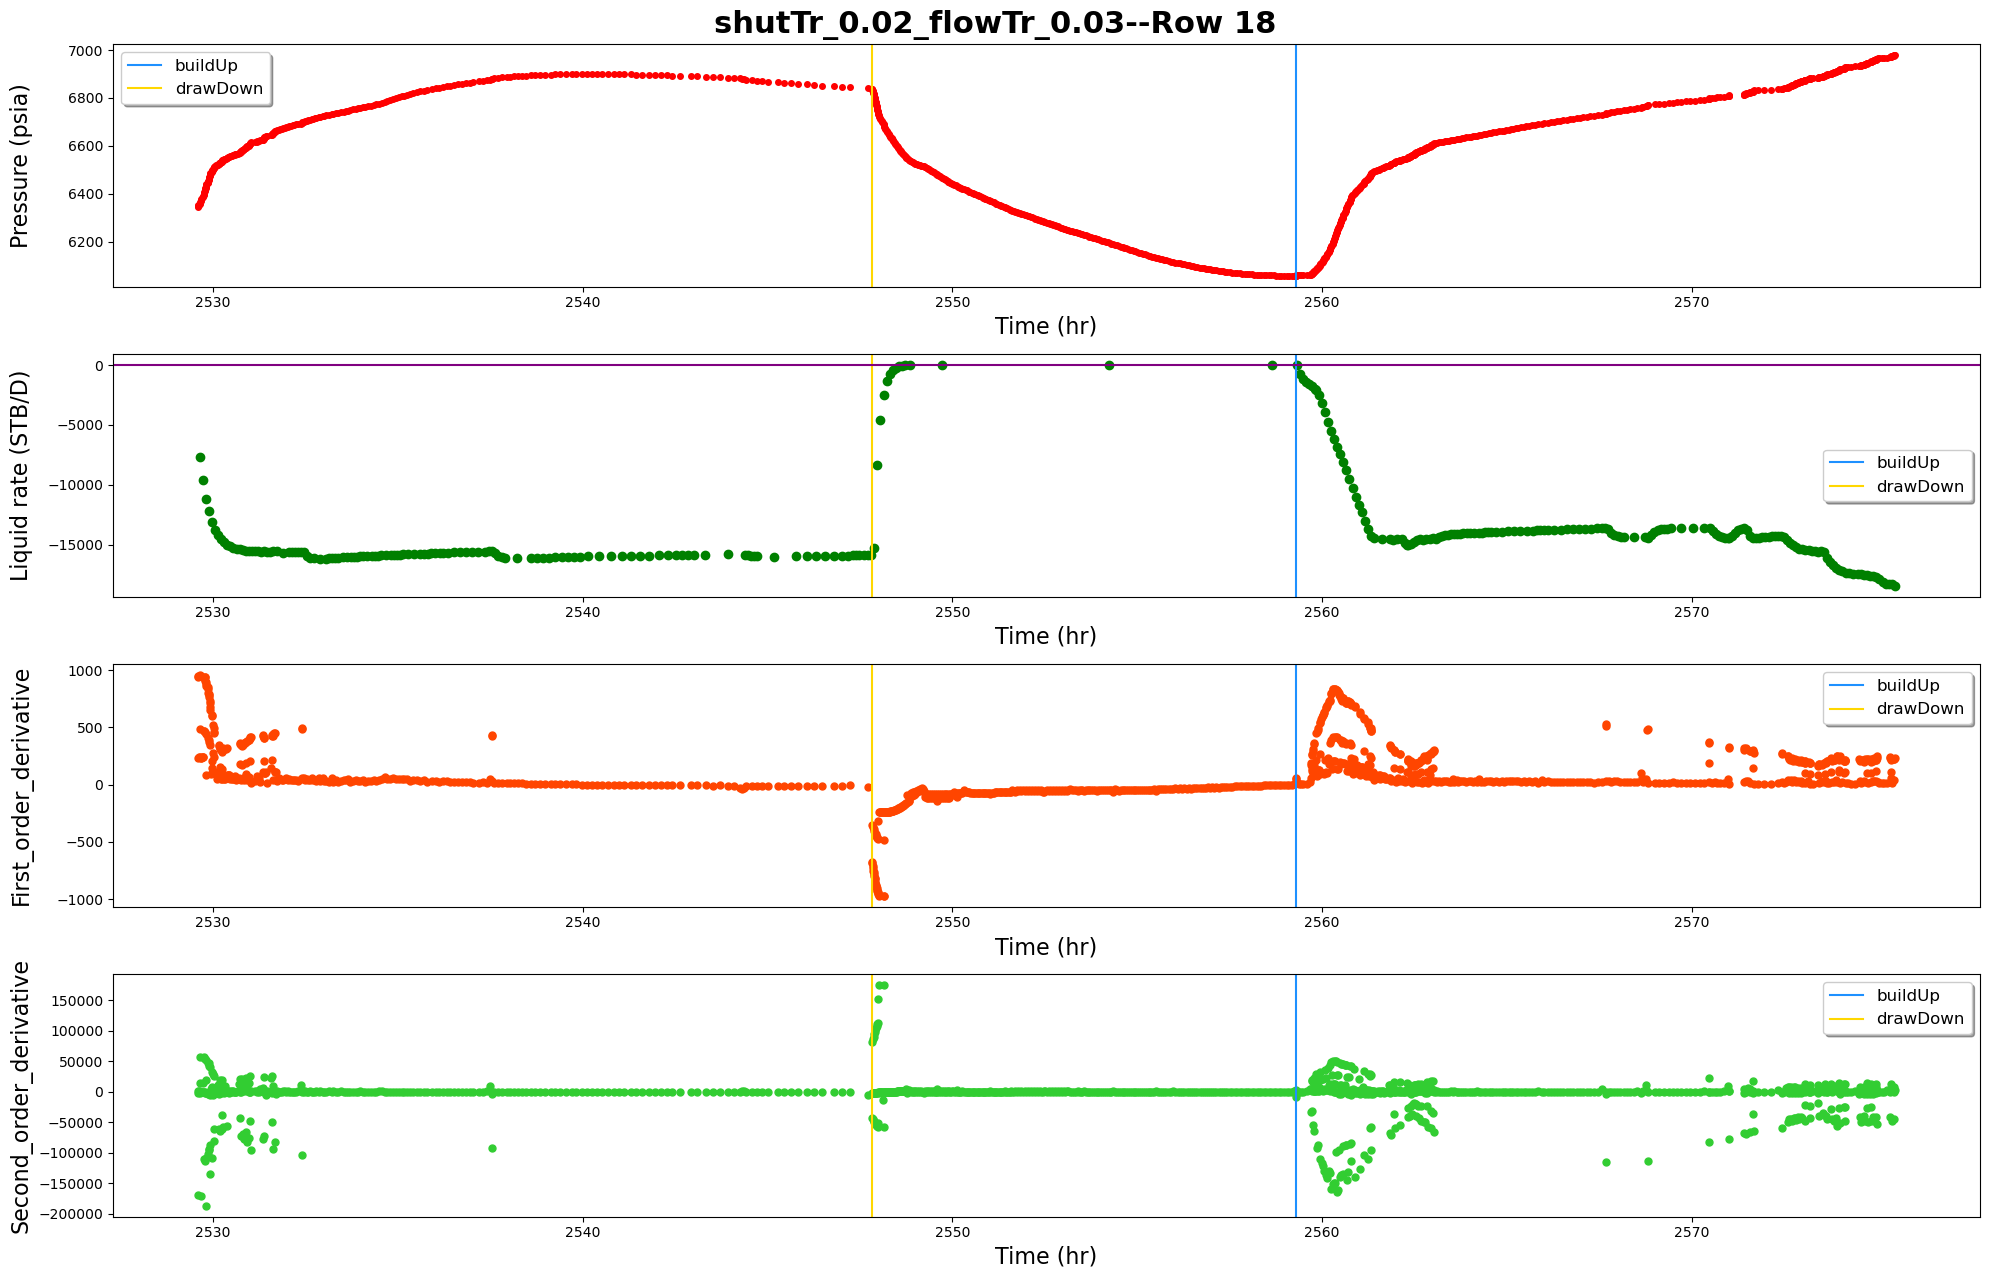

------row 19-----detected points:[21974, 22181, 22709]


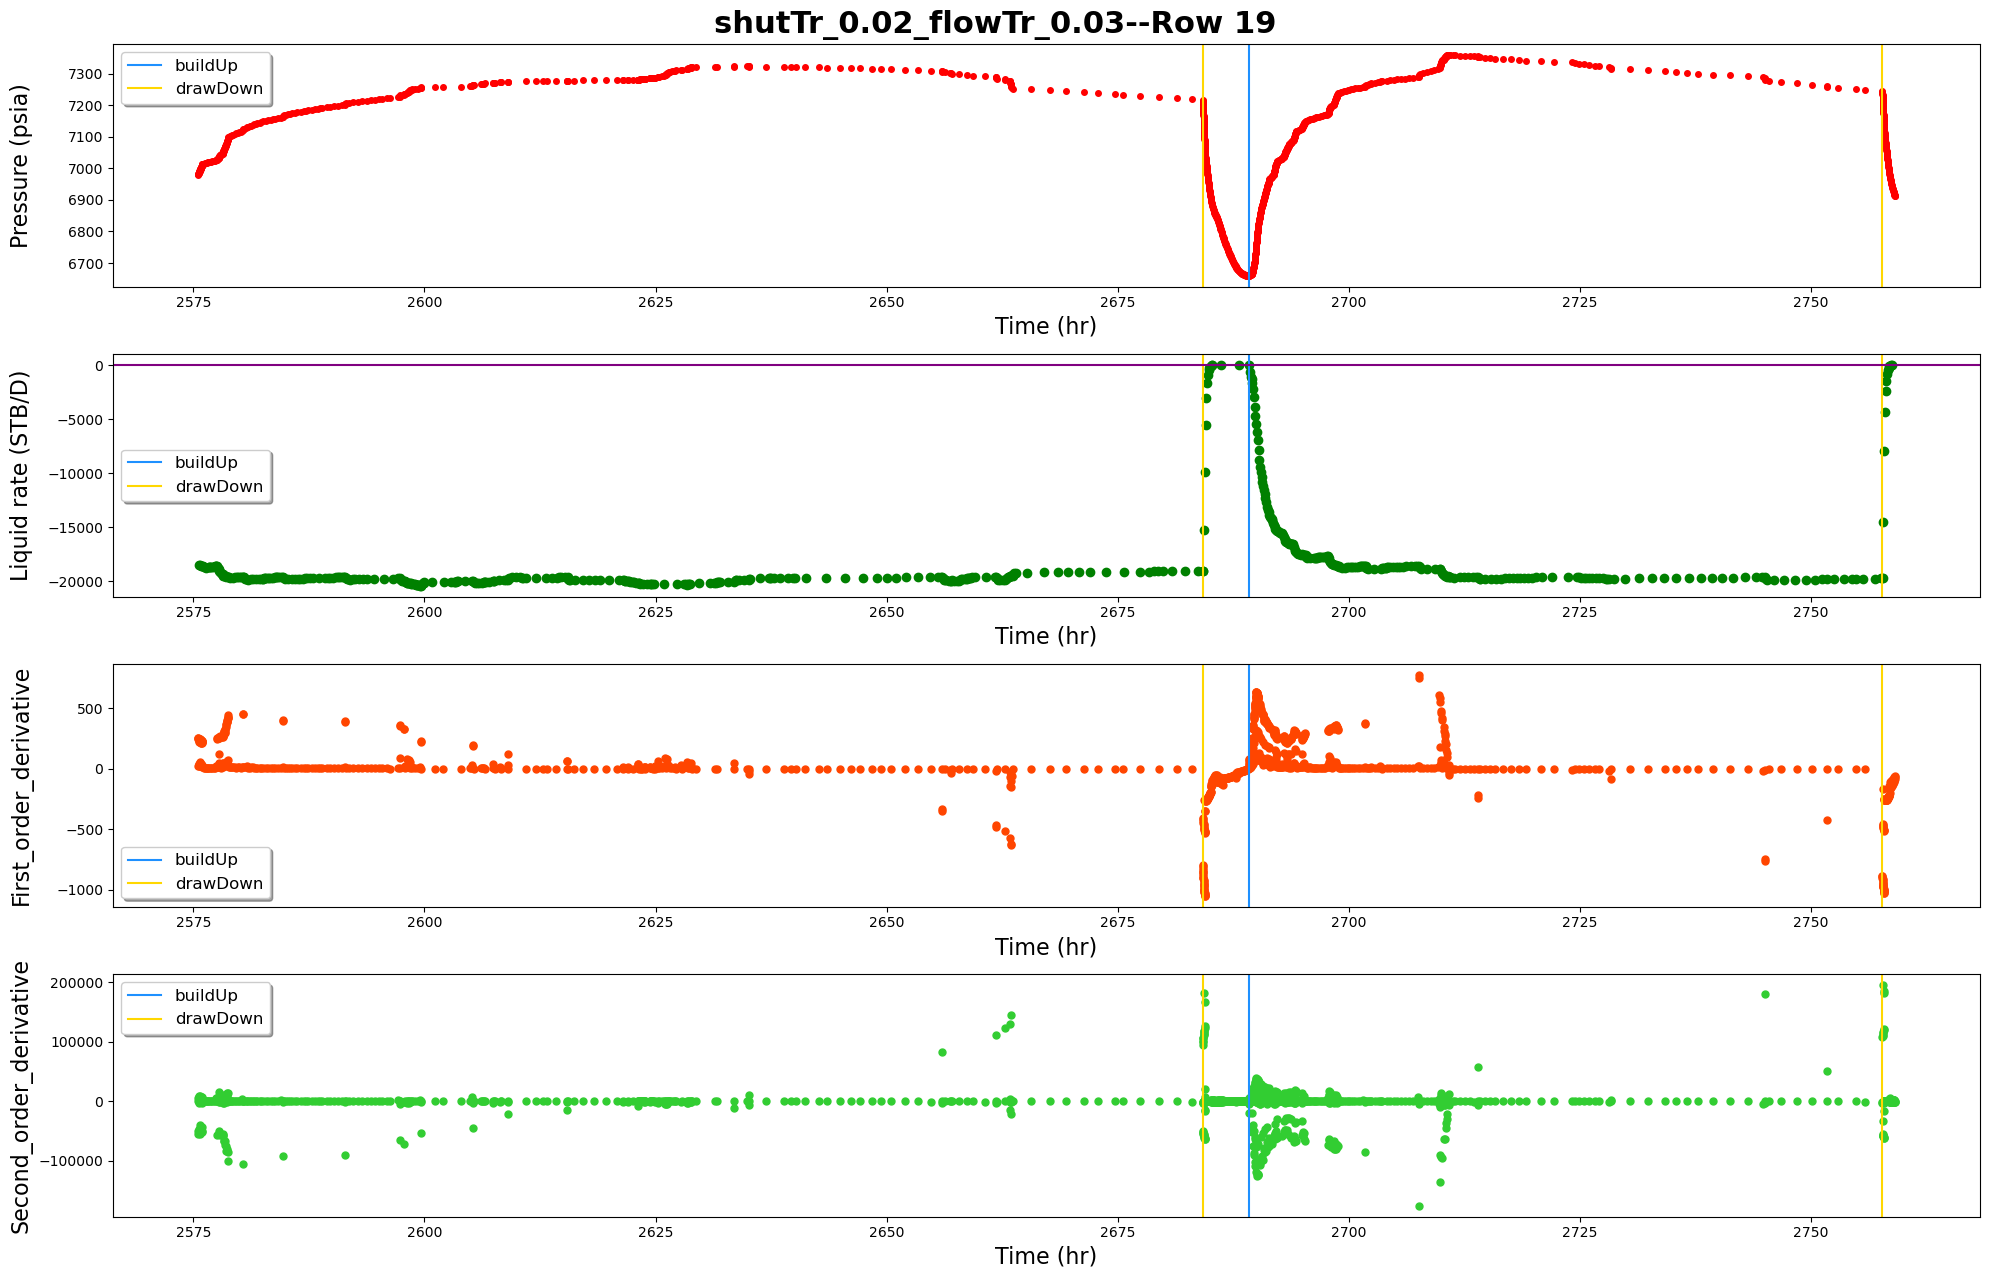

------row 20-----detected points:[23219]


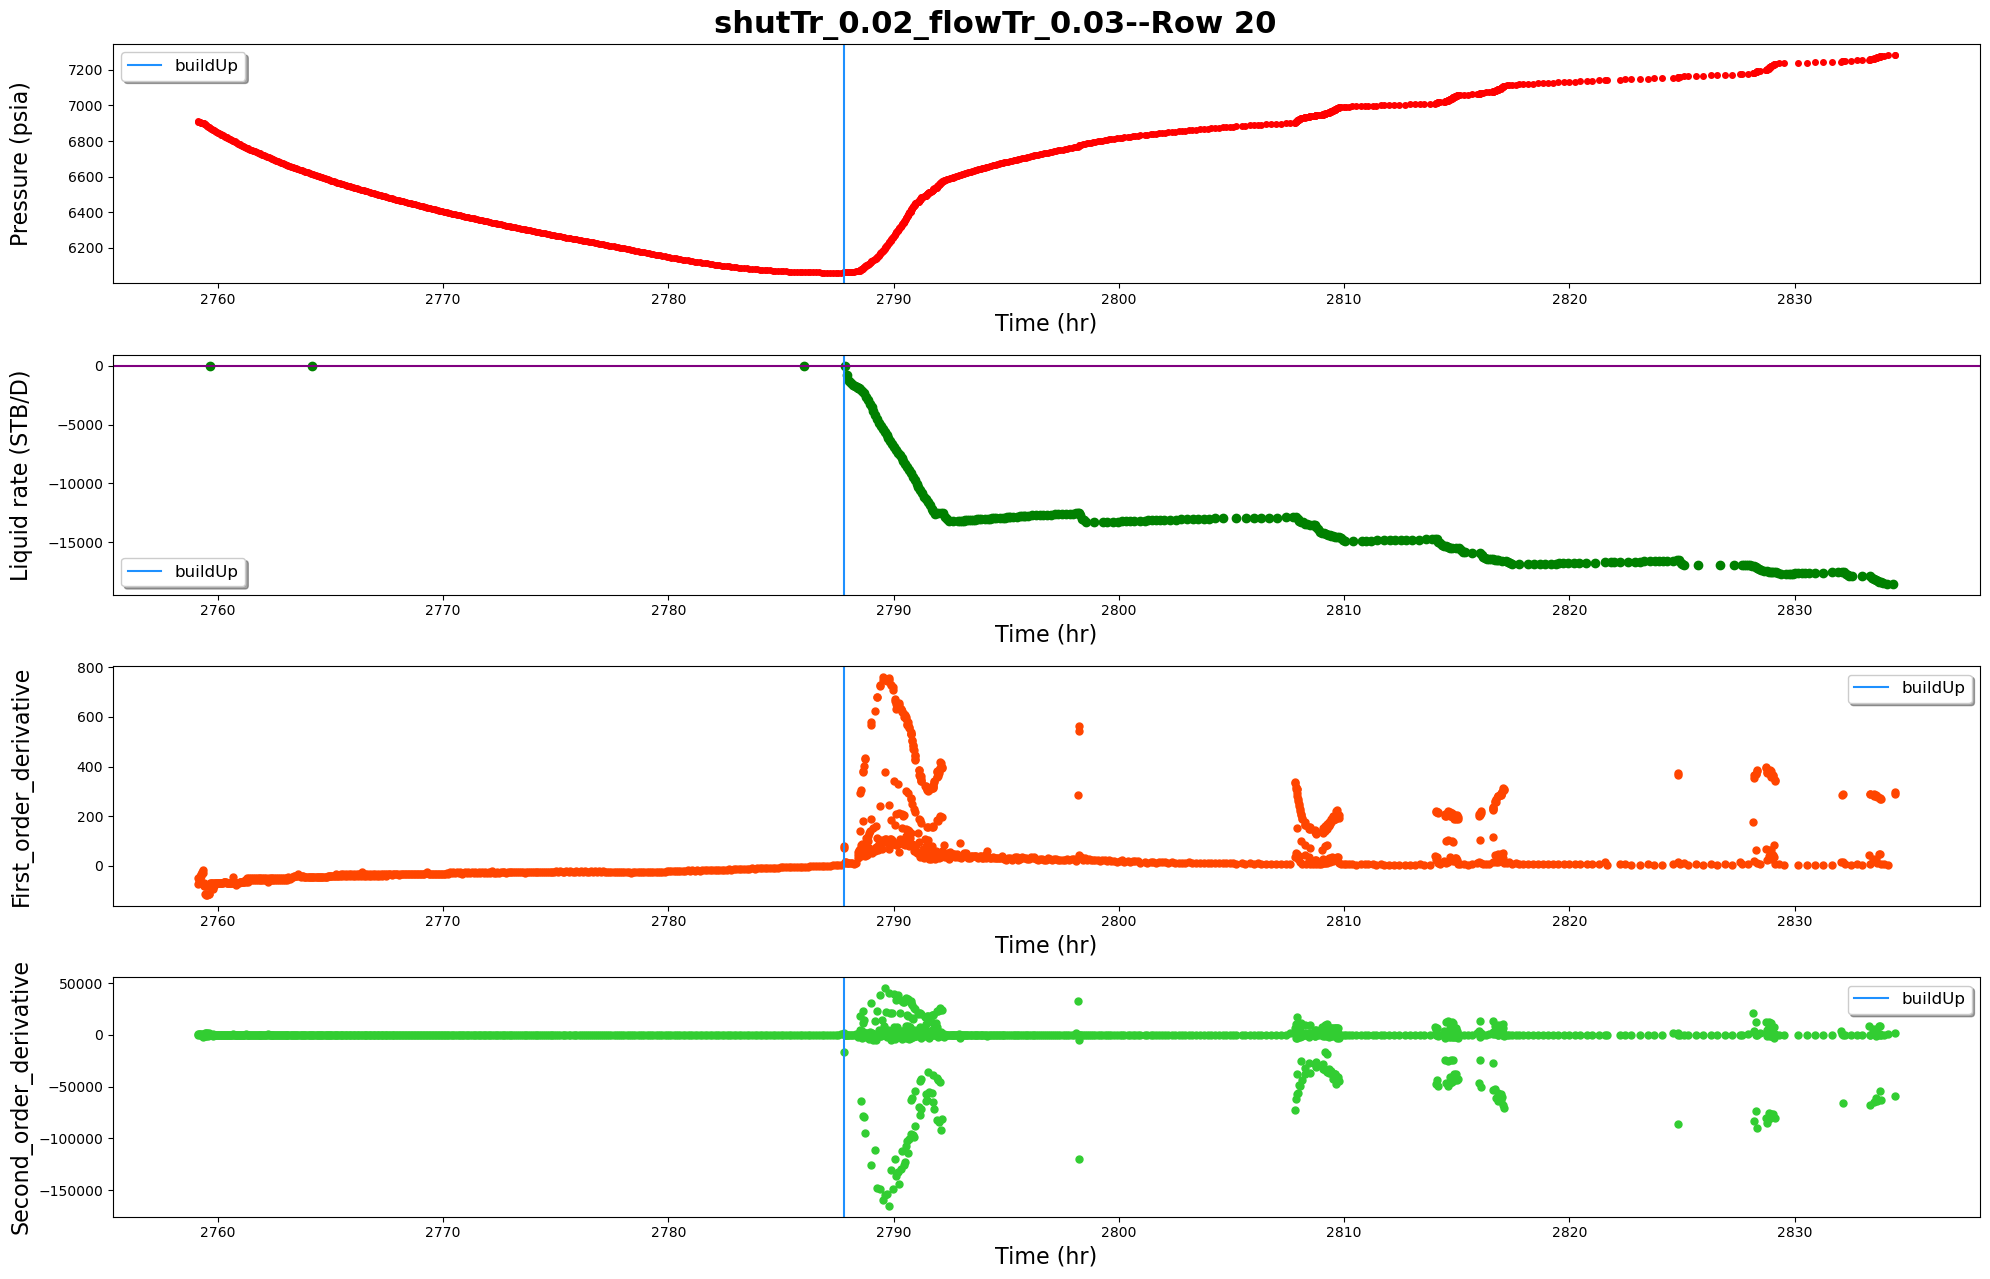

------row 21-----detected points:[24215, 24683]


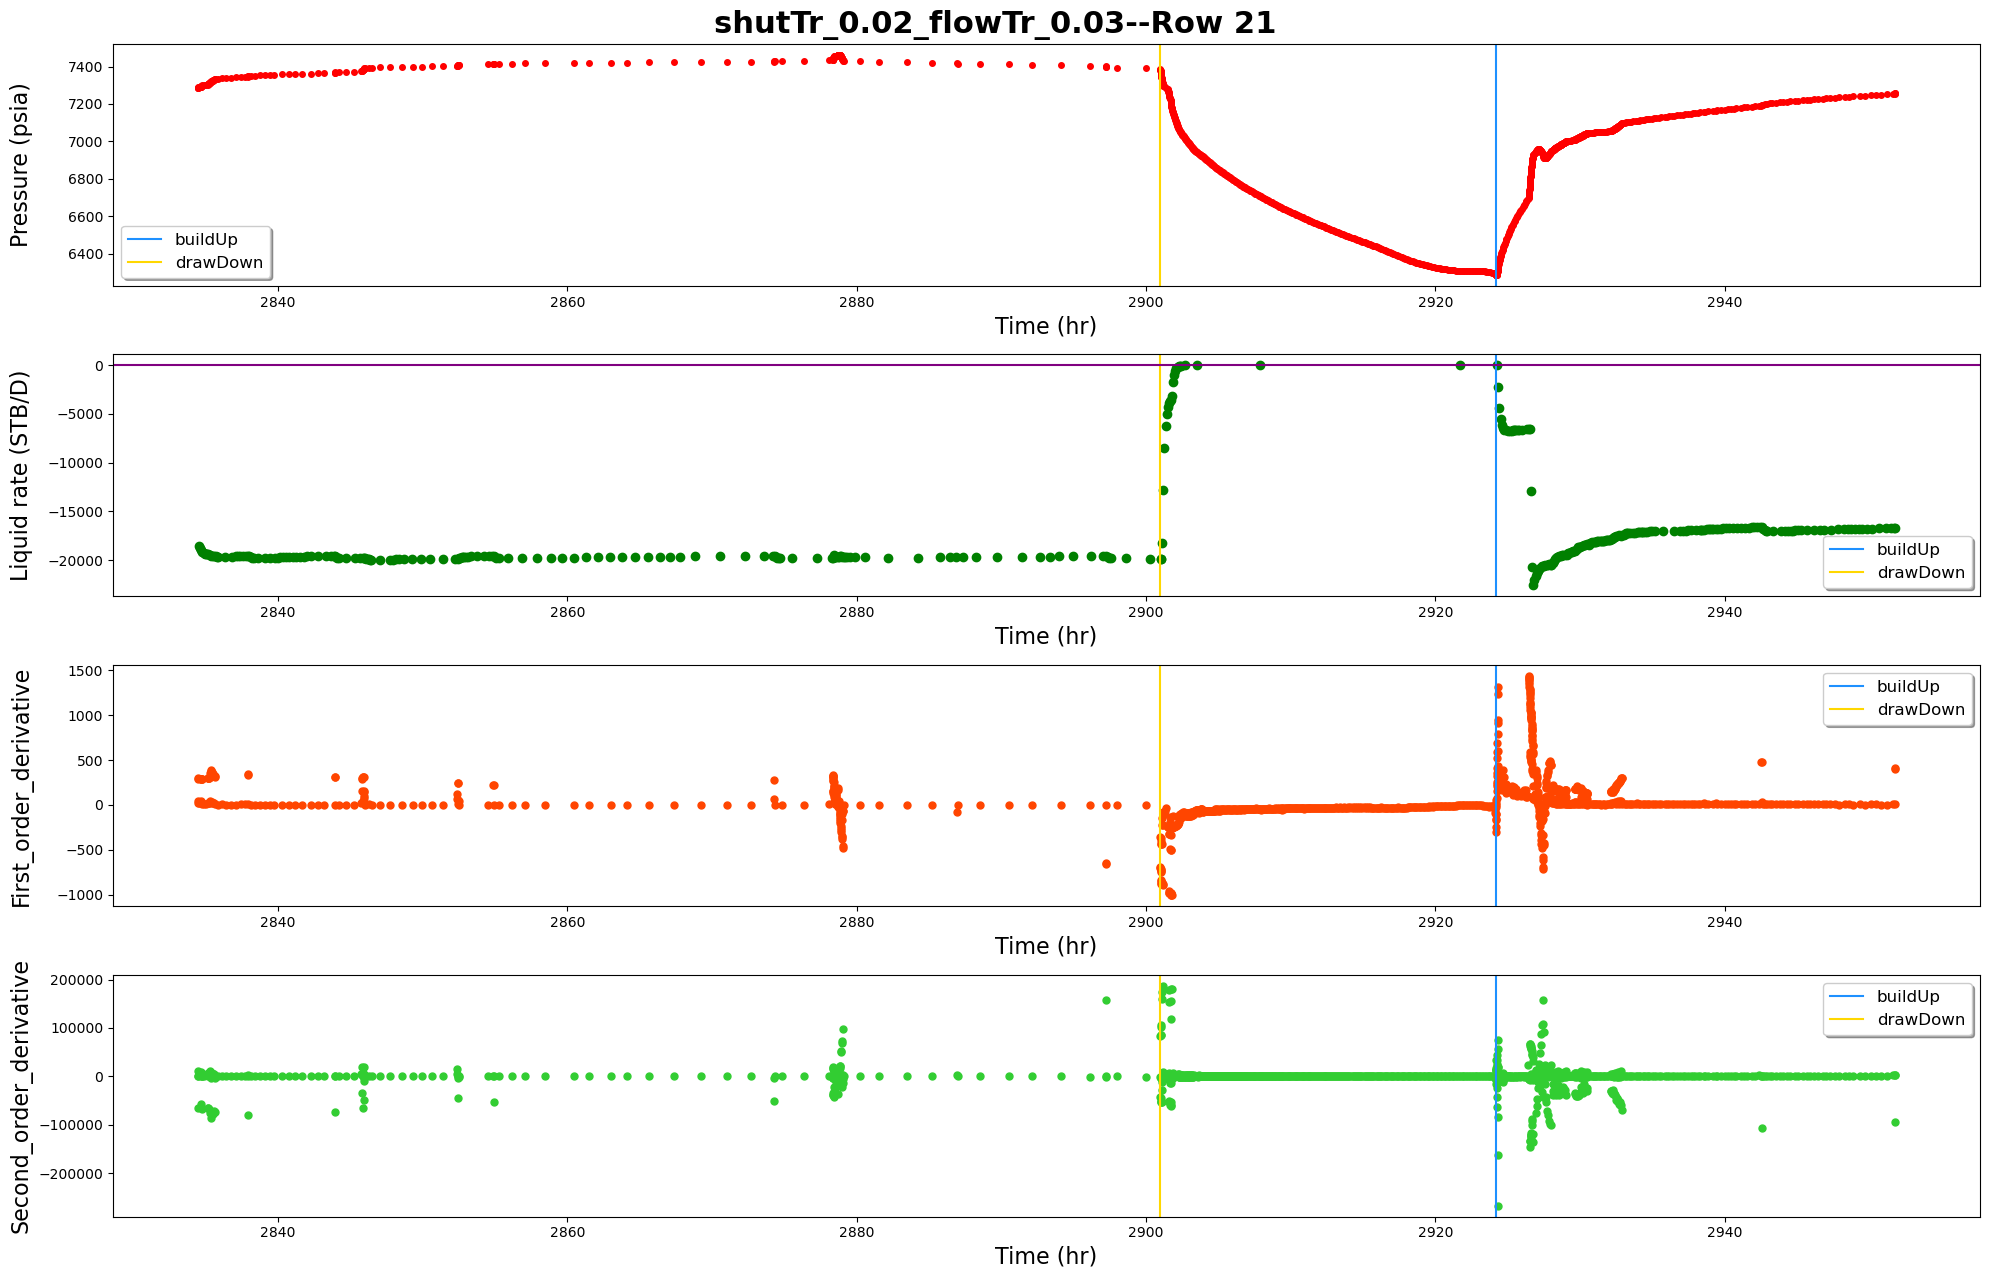

------row 22-----detected points:[25750, 25992]


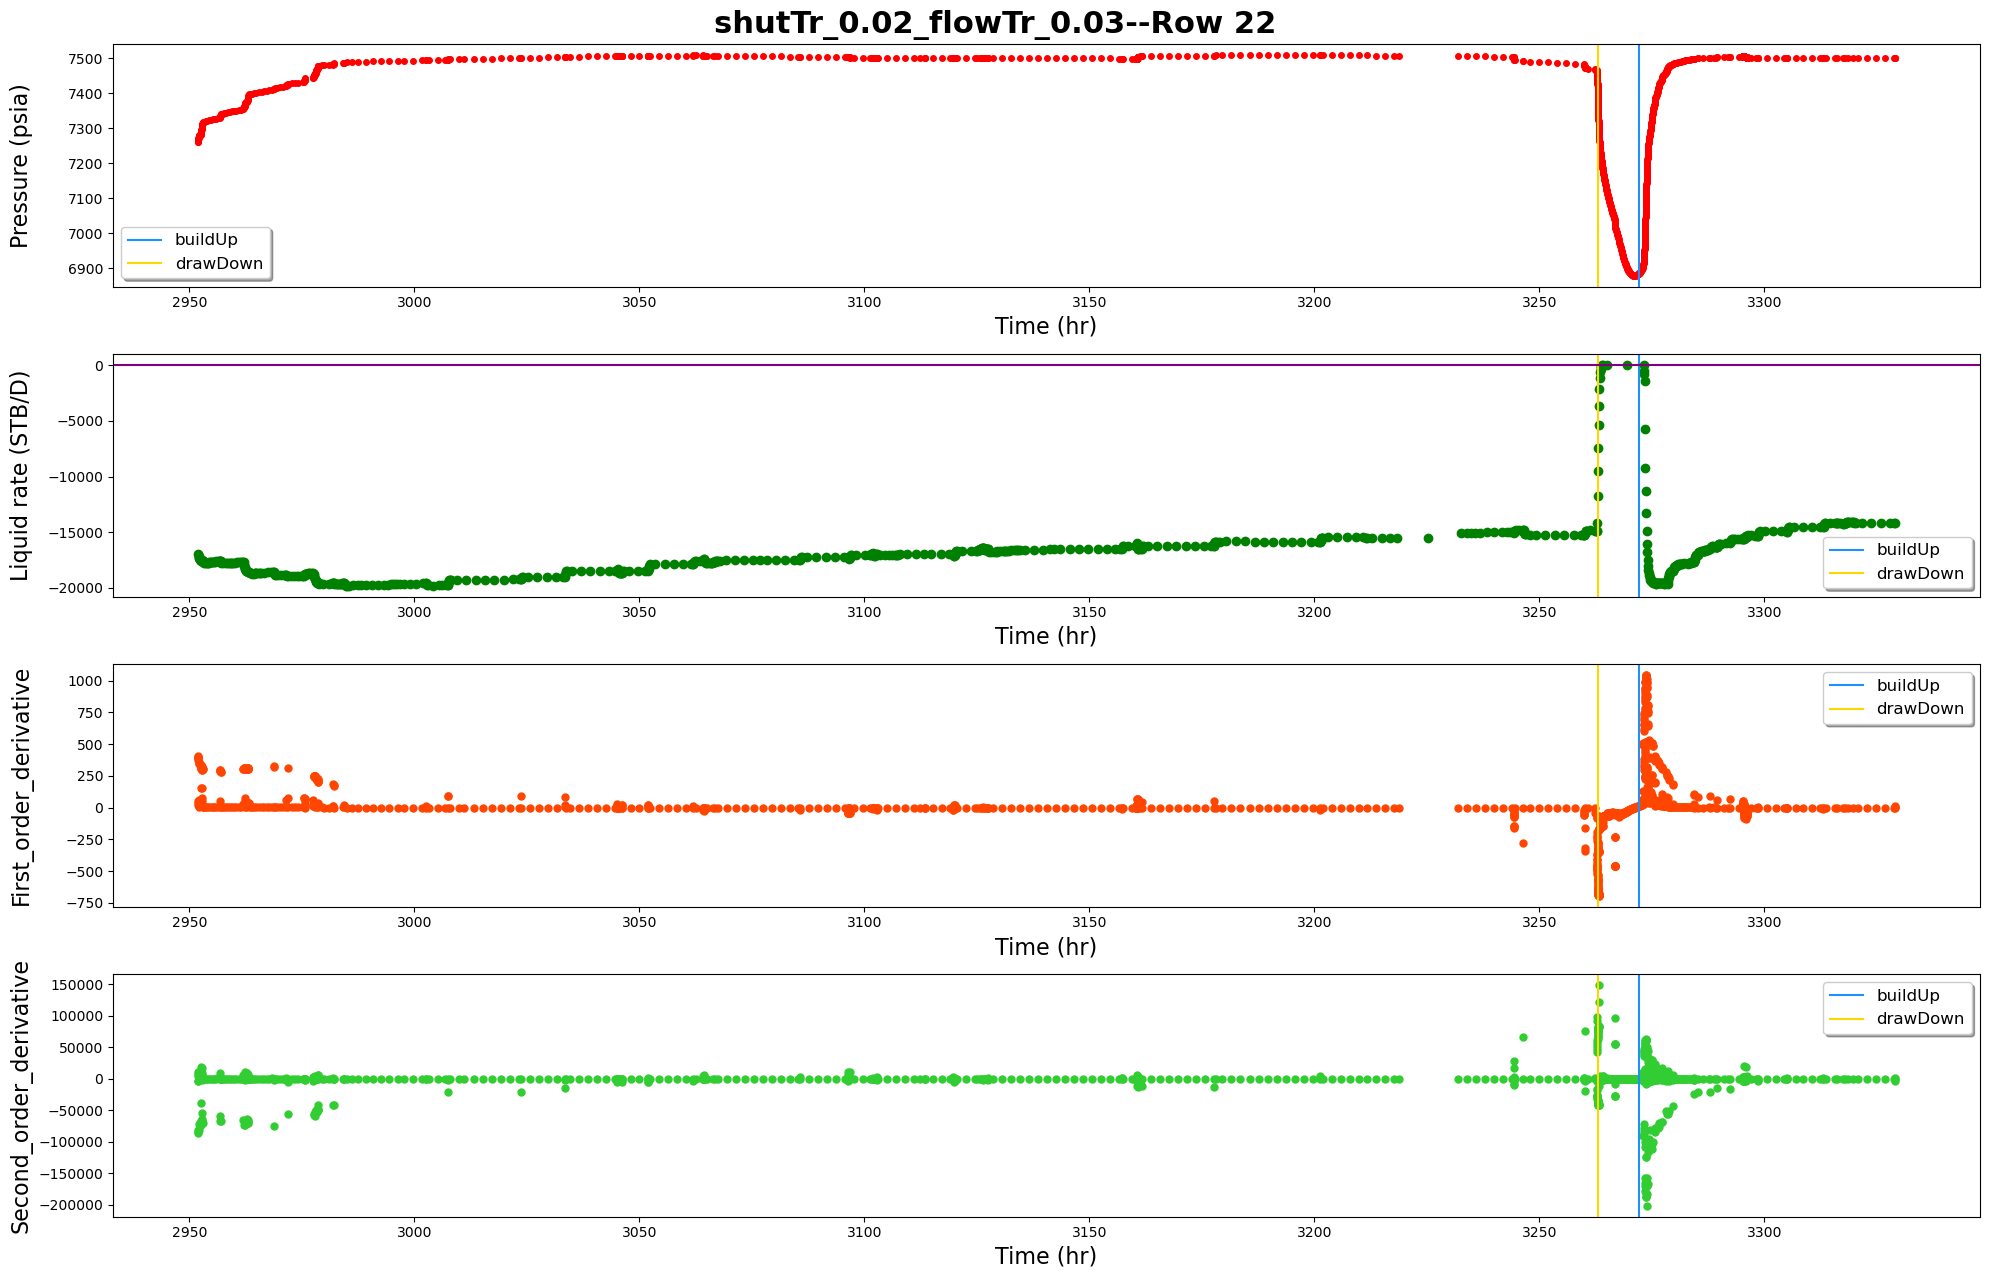

------row 23-----detected points:[26693, 26763, 27025, 27315]


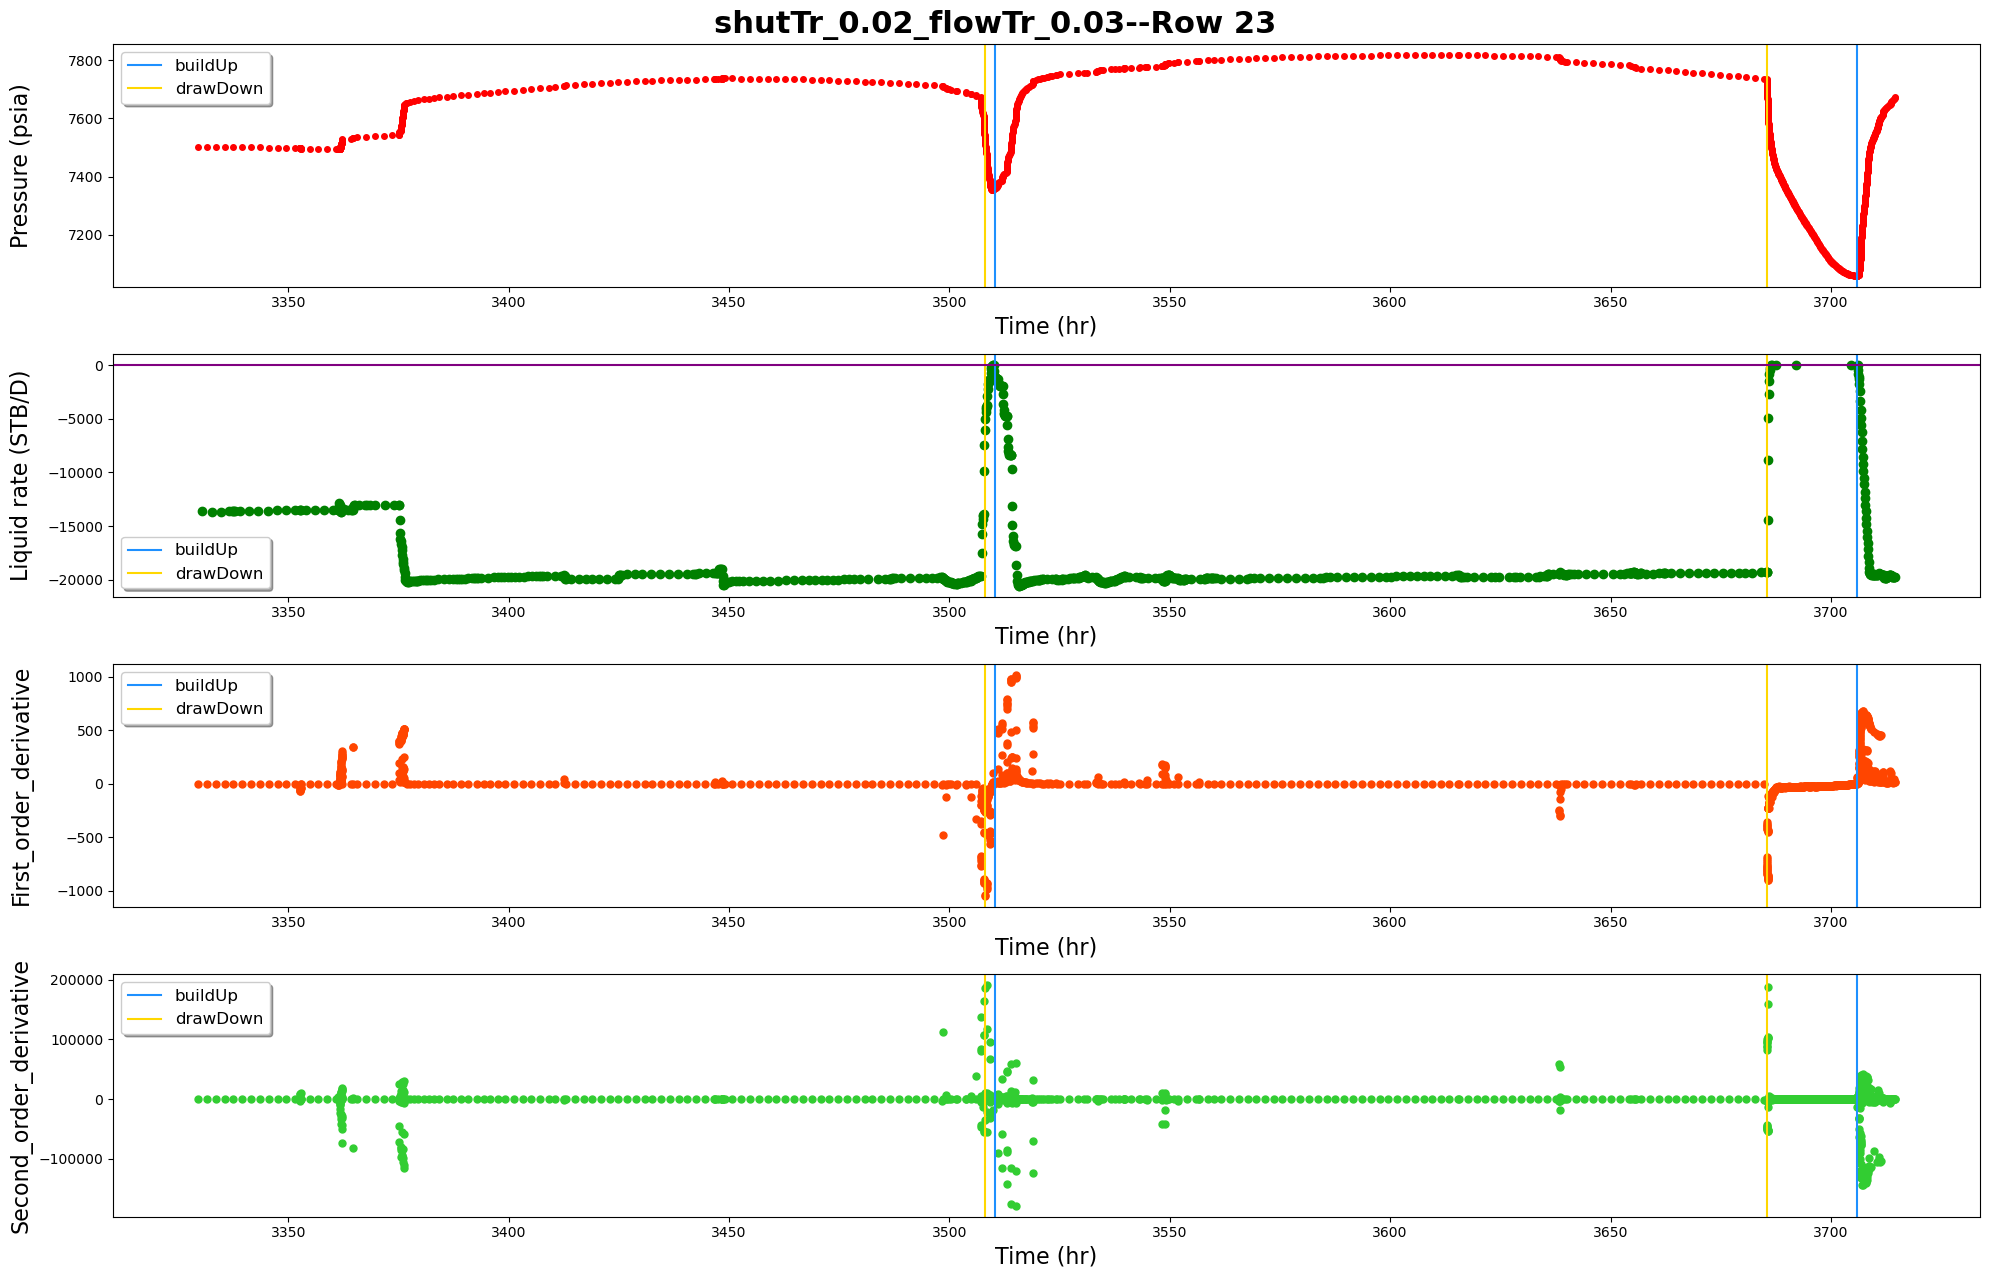

------row 24-----detected points:[27778, 27962, 28290, 28493]


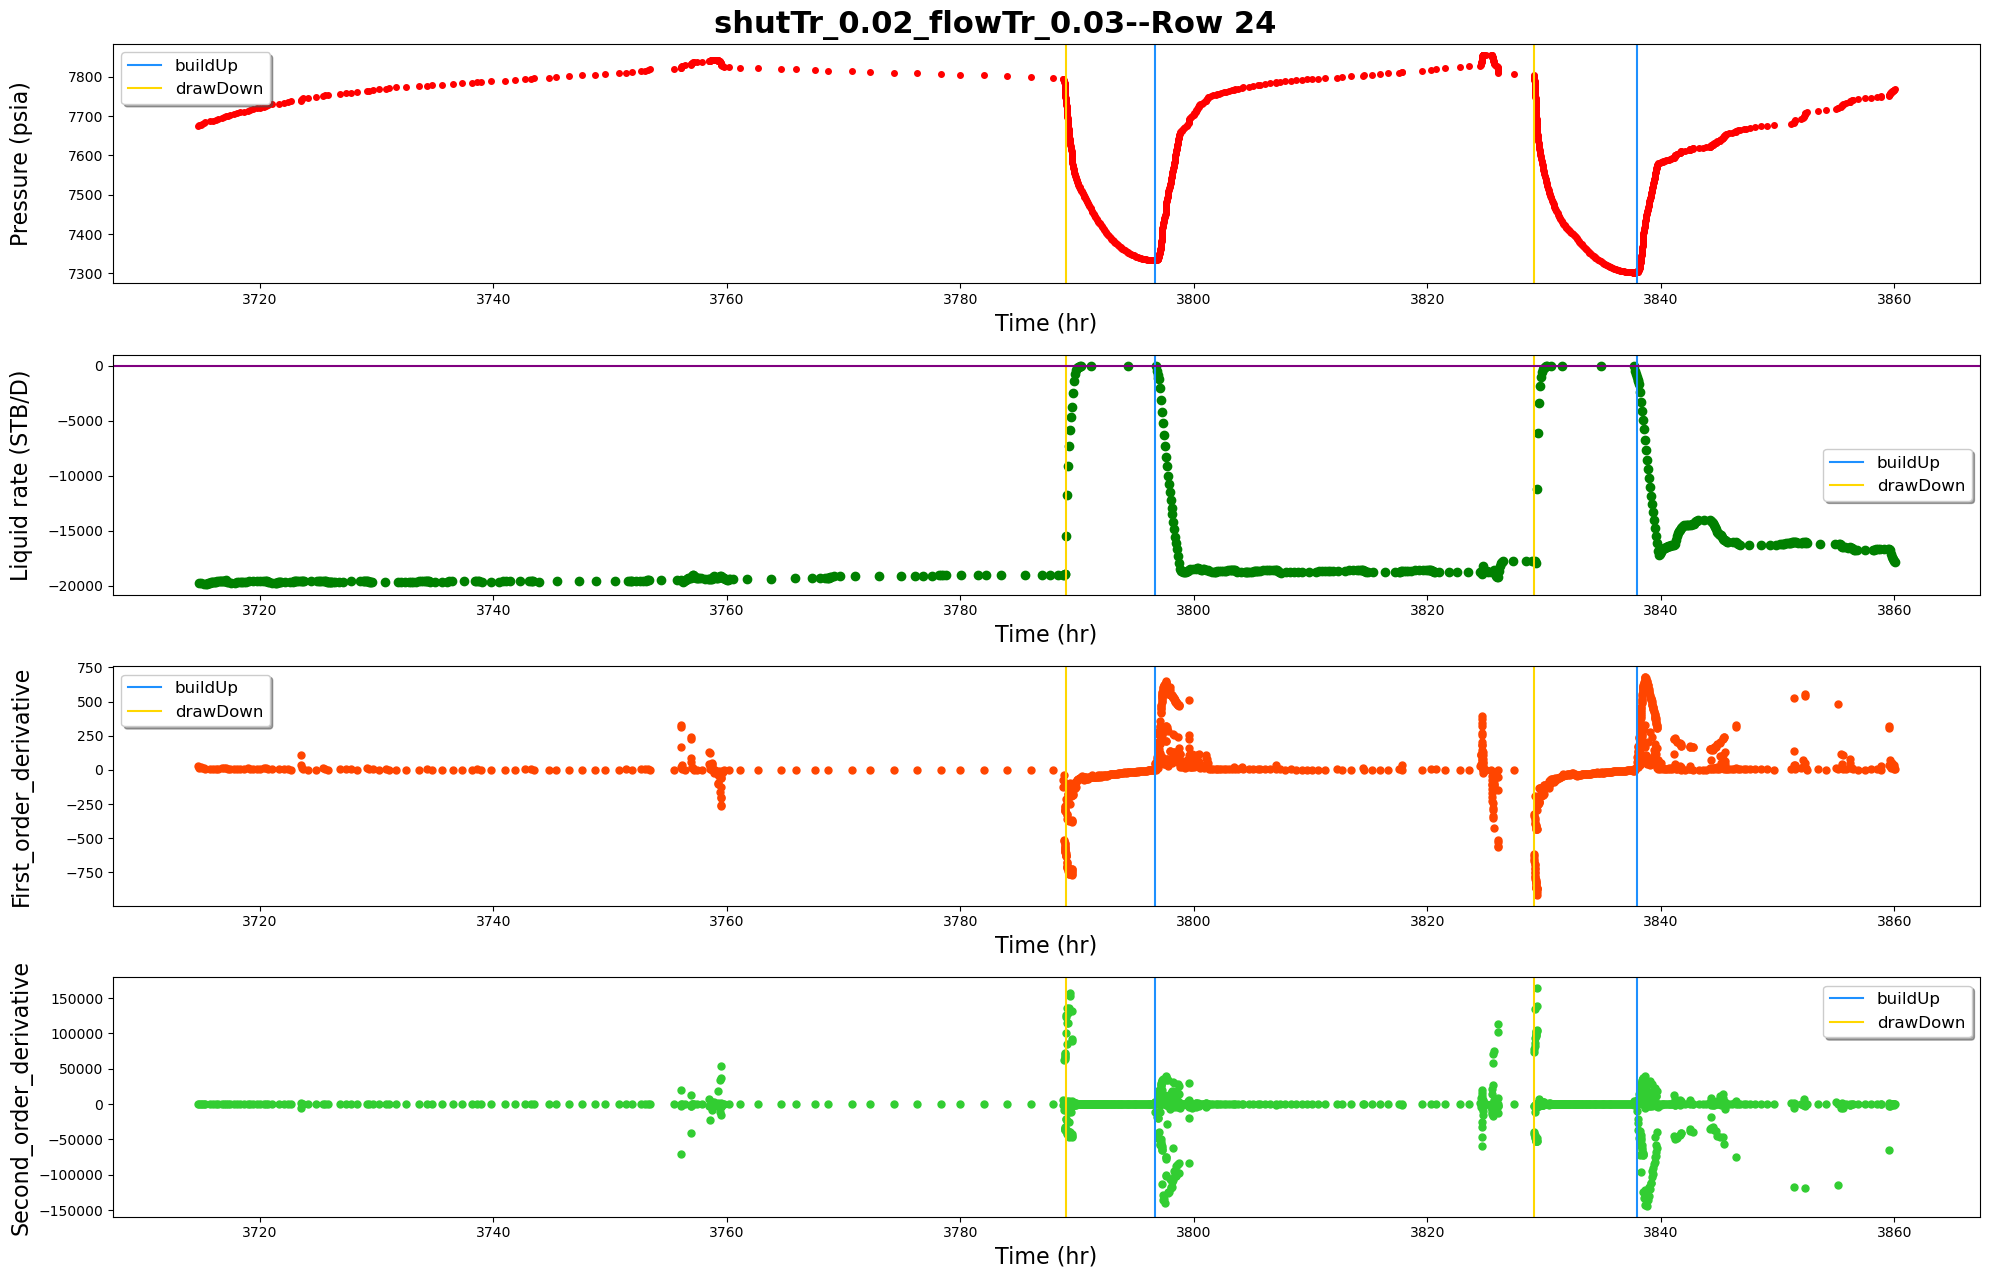

------row 25-----detected points:[28840, 29109]


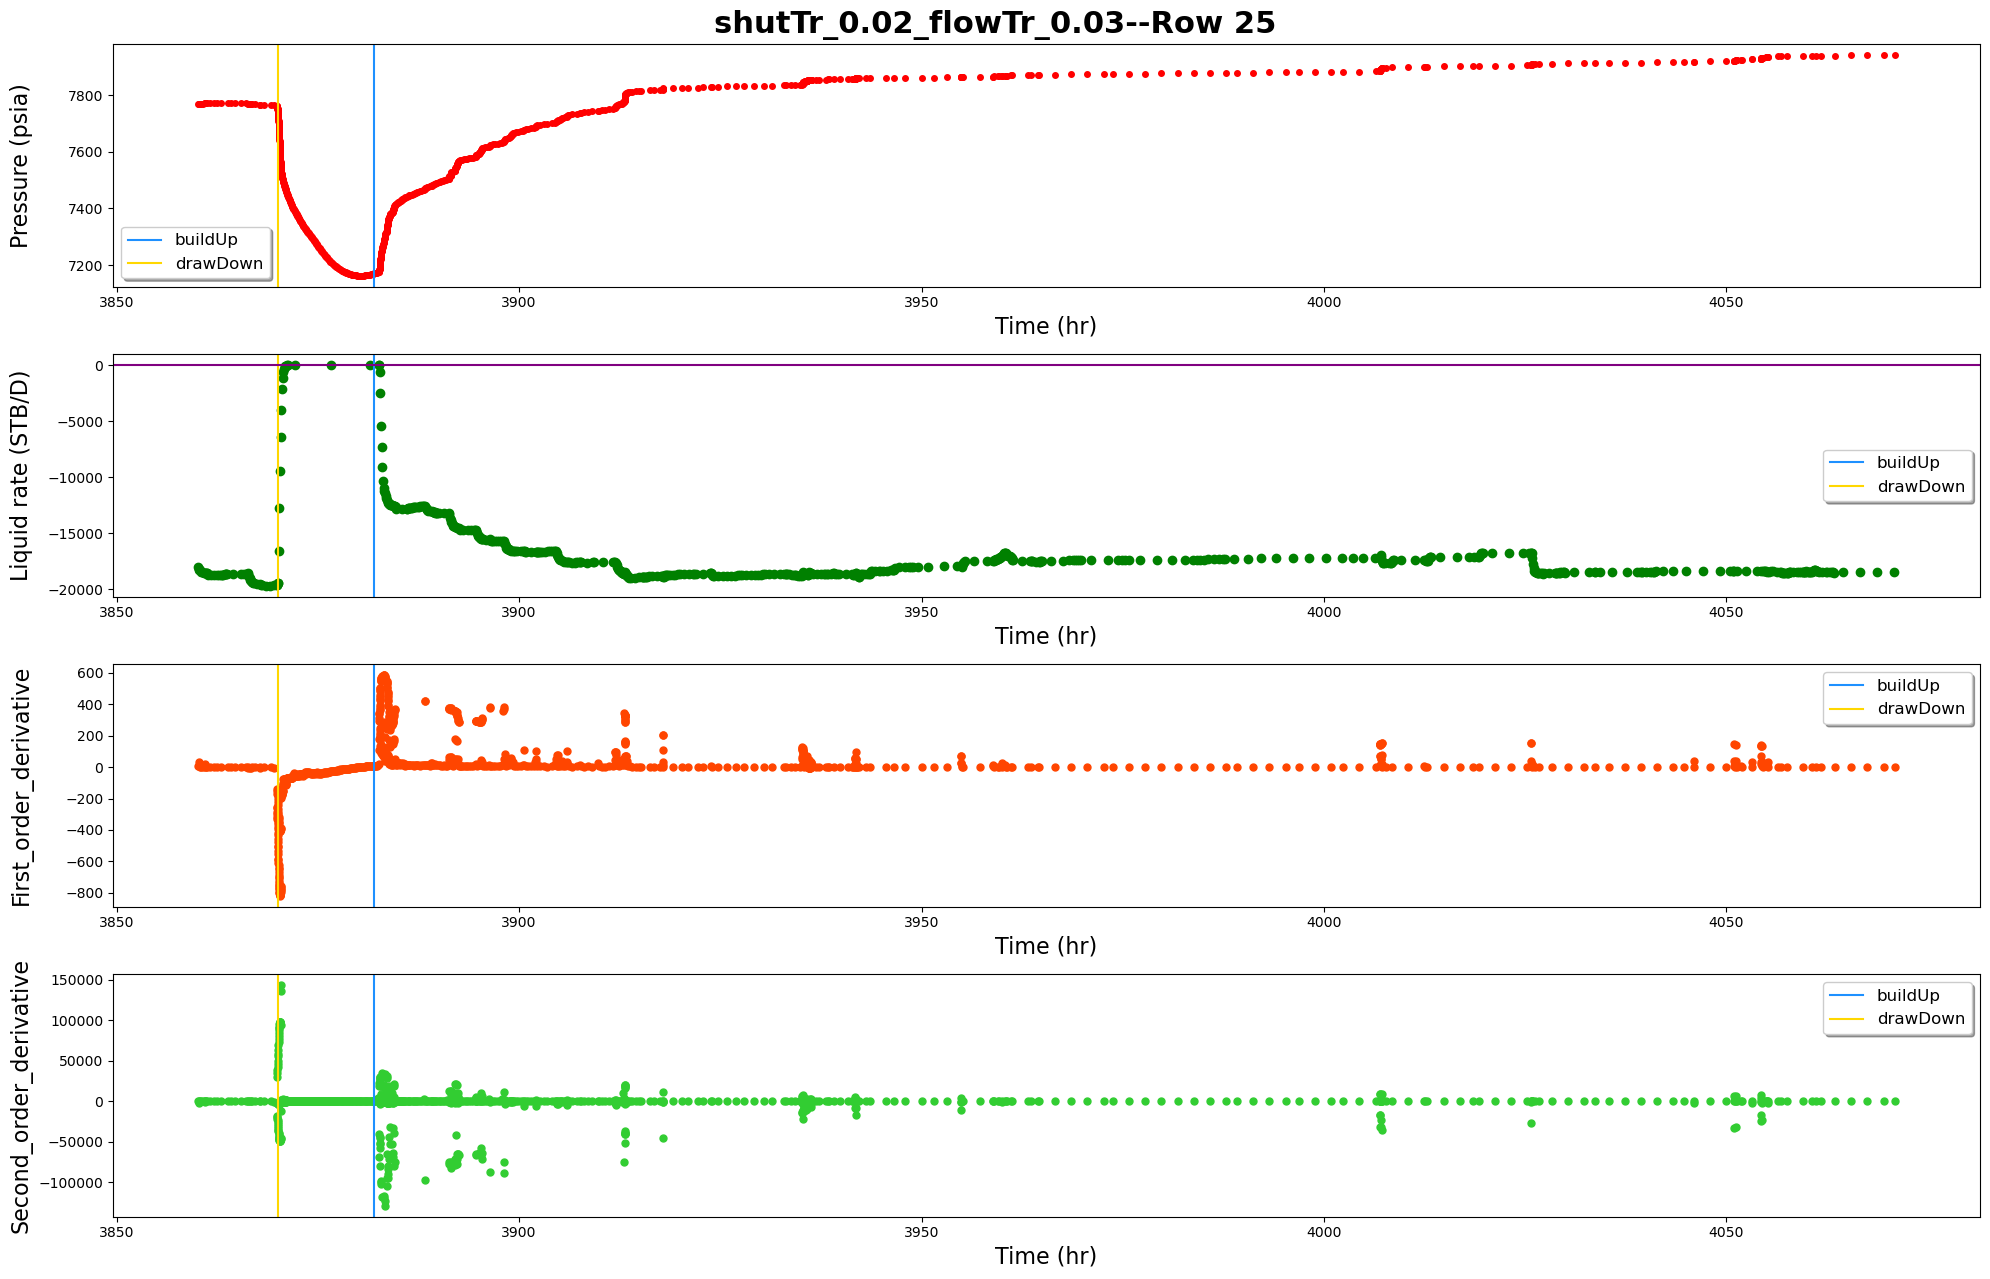

In [9]:
# points_type="allPoints"
points_type="majorTransients"
# parameters={}
parameters={"shutTr":minor_threshold_shutIn,
           "flowTr":minor_threshold_Flowing}
detect_points_dict={"buildUp":transients.major_buildUp,
                   "drawDown":transients.major_drawDown}

buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=True
folder_name=f"{method}/{points_type}/timeStep_{time_step}"
# folder_name="removed_transients"
%run plot_N_save.ipynb

In [ ]:
points_false=[27725,25894]
for point_index in points_false:
    identfication_UsePattern.check_in_pattern(identfication_UsePattern.data_forPredict,
                                 point_index,
                                 plot=True)

In [ ]:
points_missed=[25750,27824]
for point_index in points_missed:
    identfication_UsePattern.check_in_pattern(identfication_UsePattern.data_forPredict,
                                 point_index,
                                 plot=True)

# plot periods & multi rate break points

'buildup:134, drawdown:31'
---initializing...
---plotting...


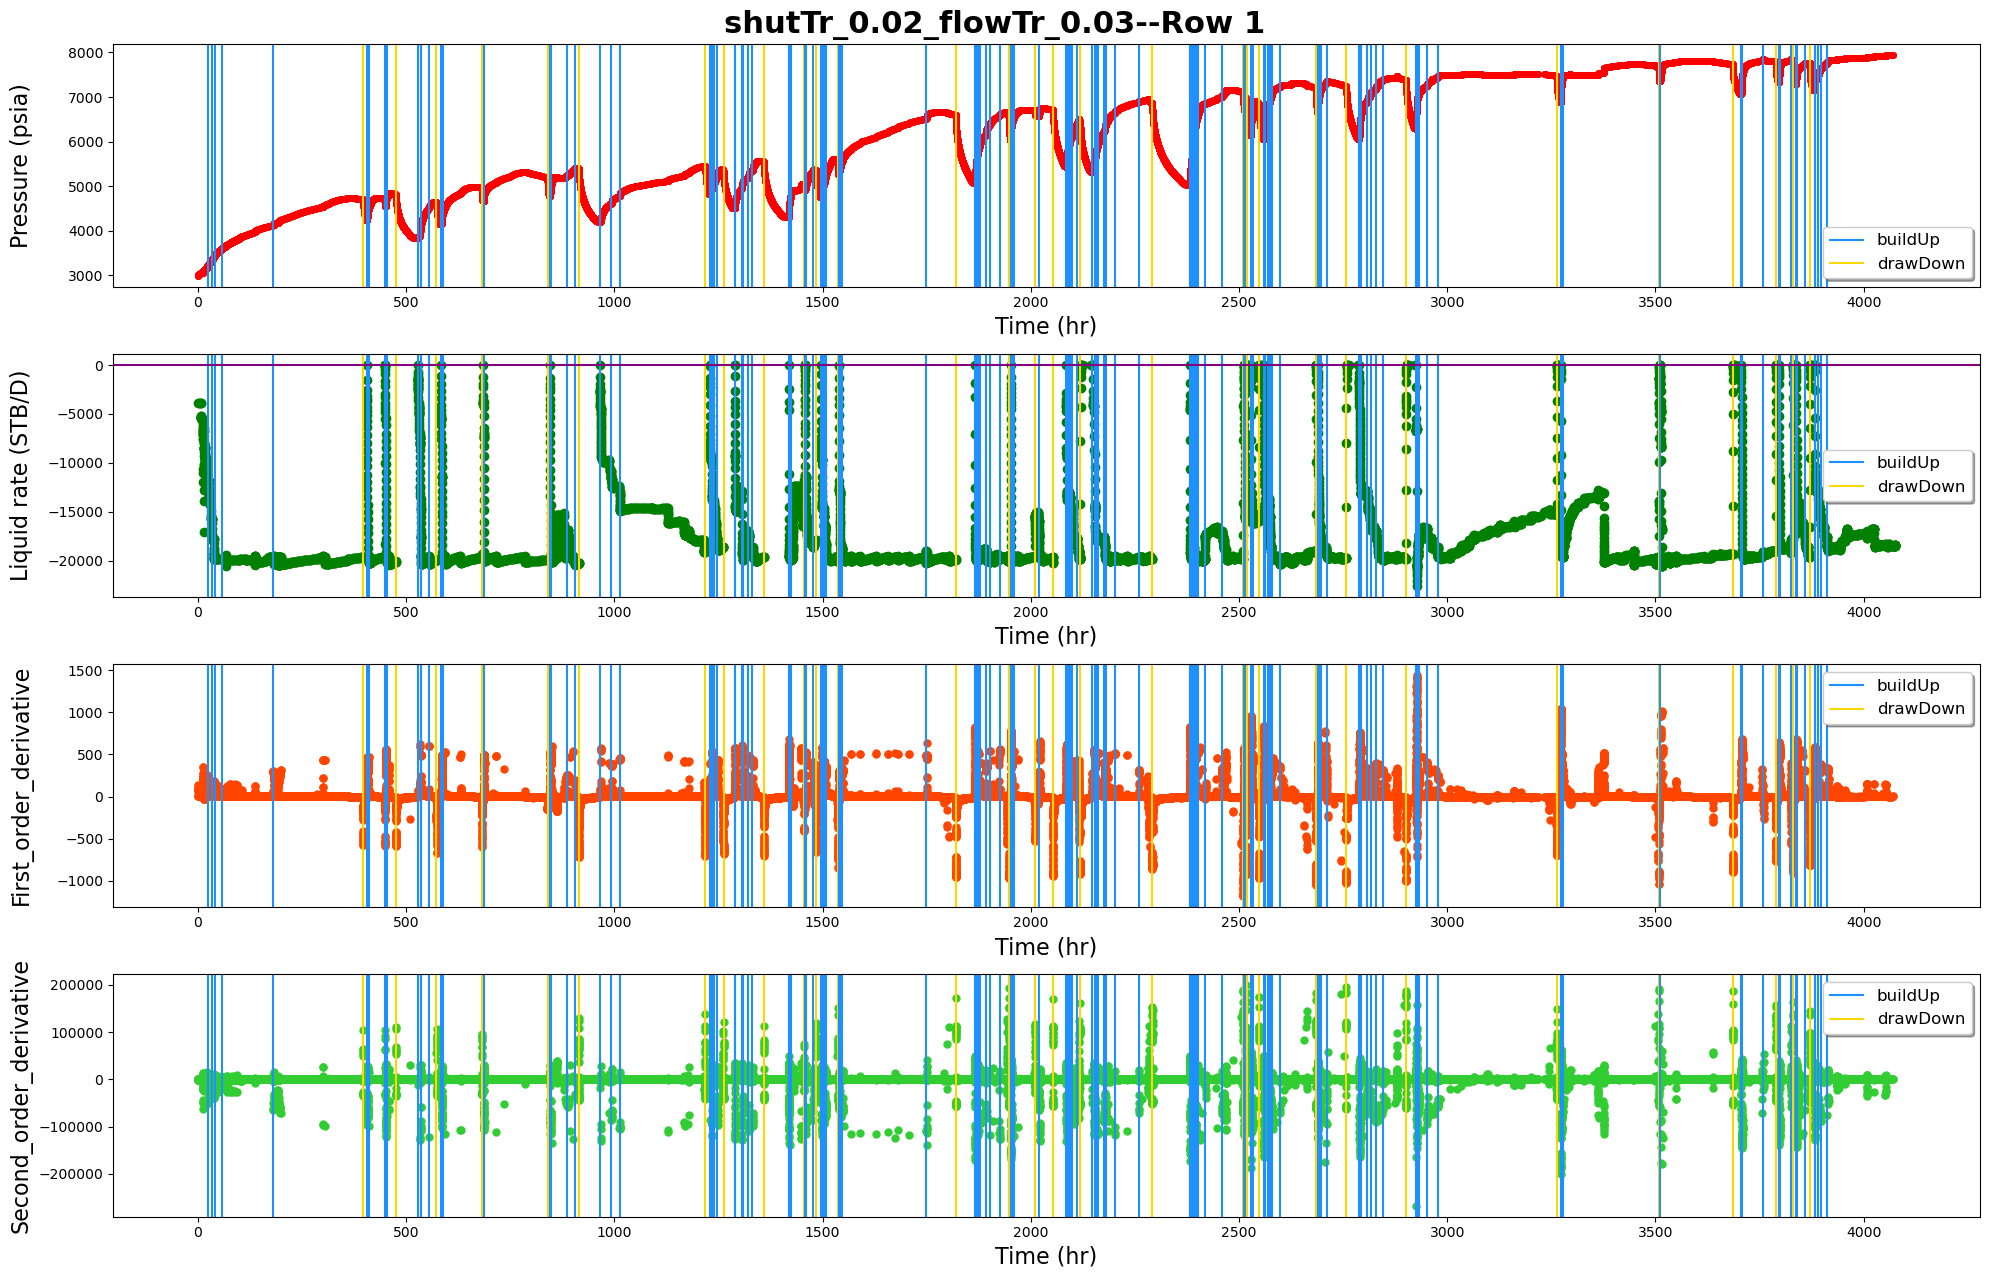

save whole....
detected 165 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[402, 580, 781, 1098]


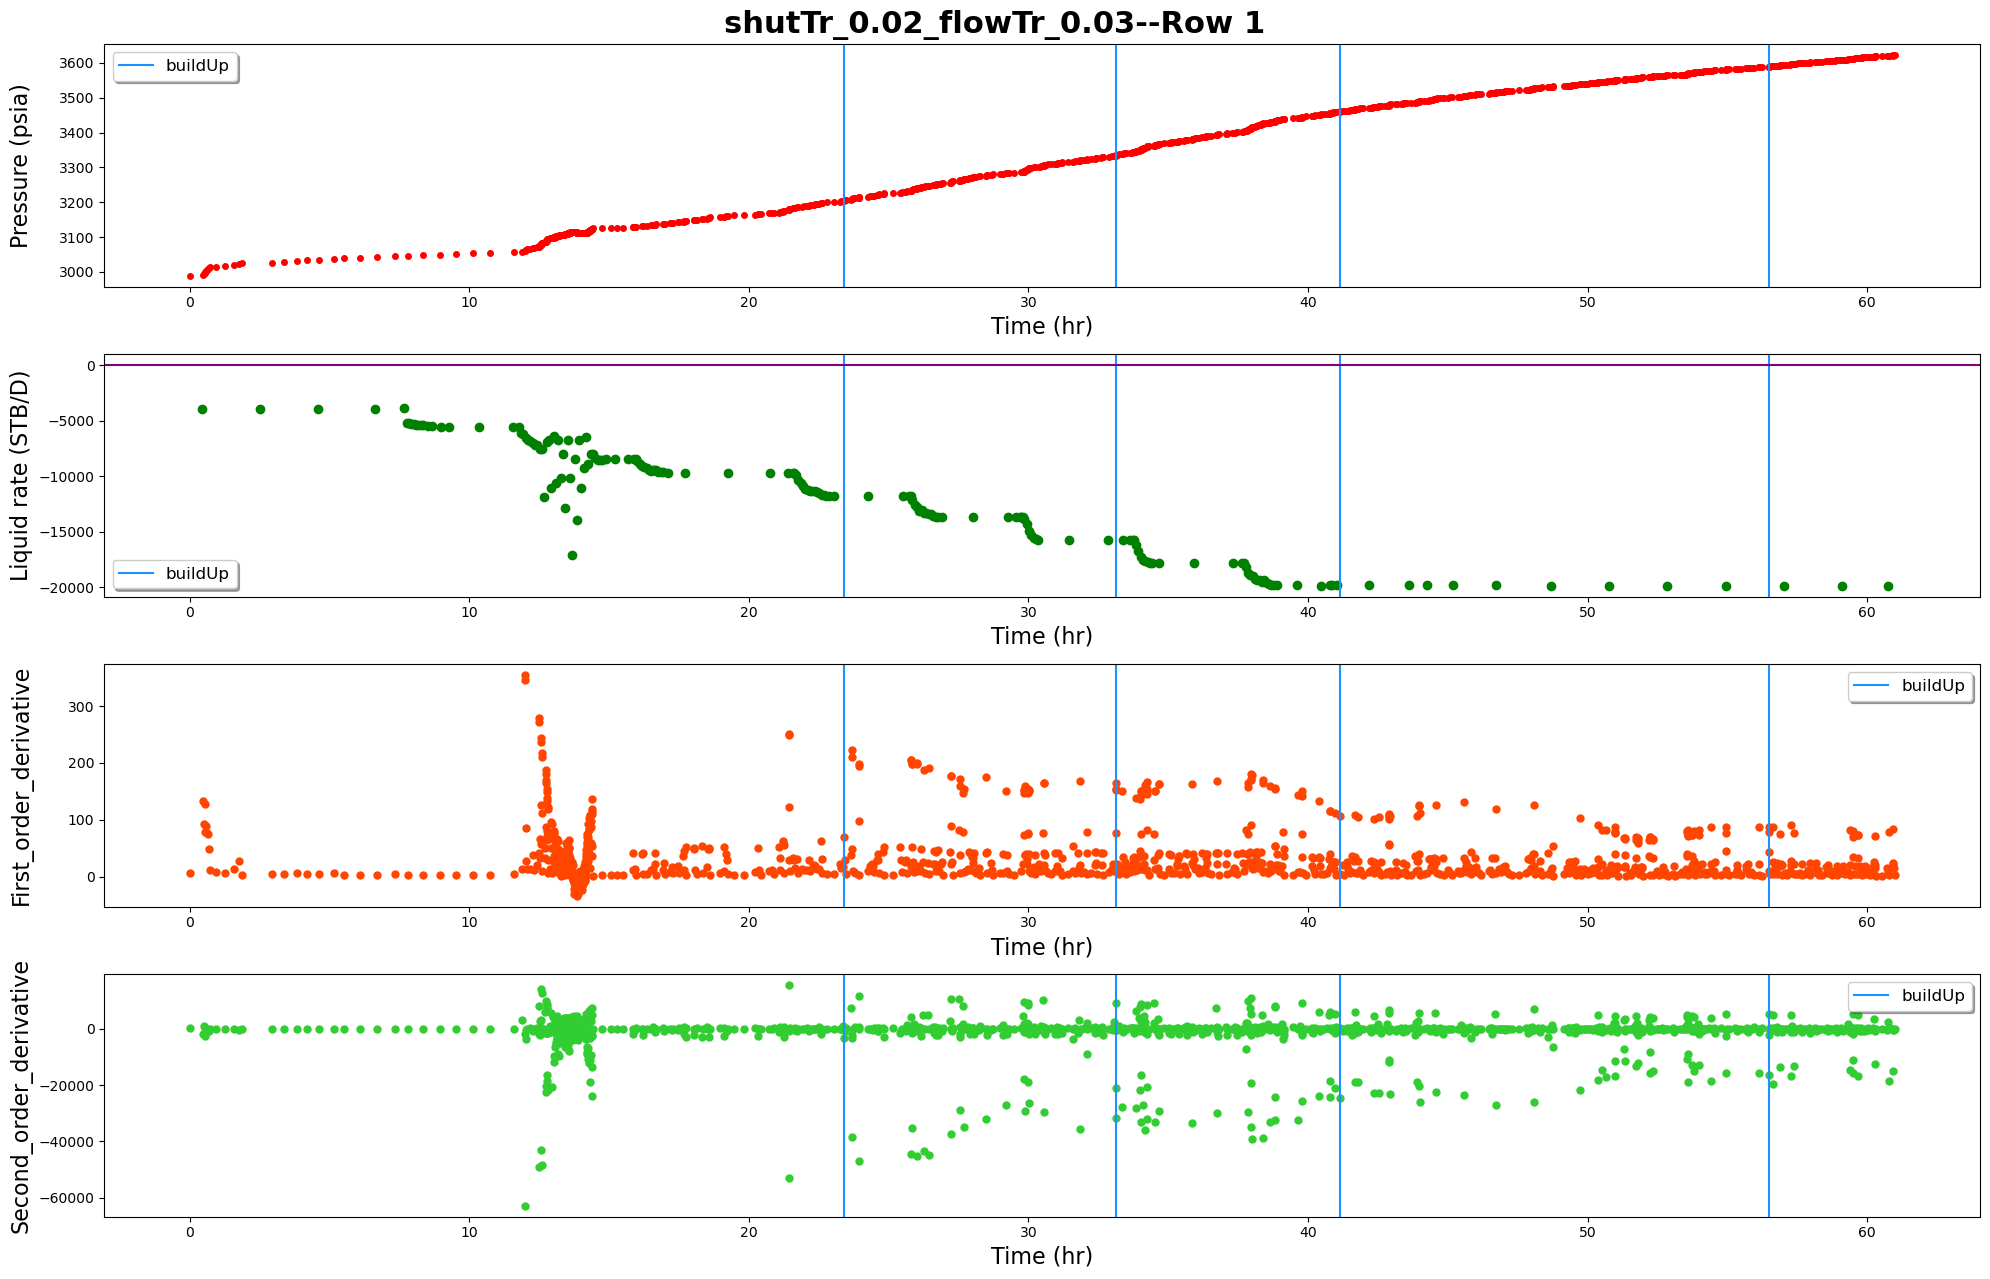

------row 2-----detected points:[1814, 2248]


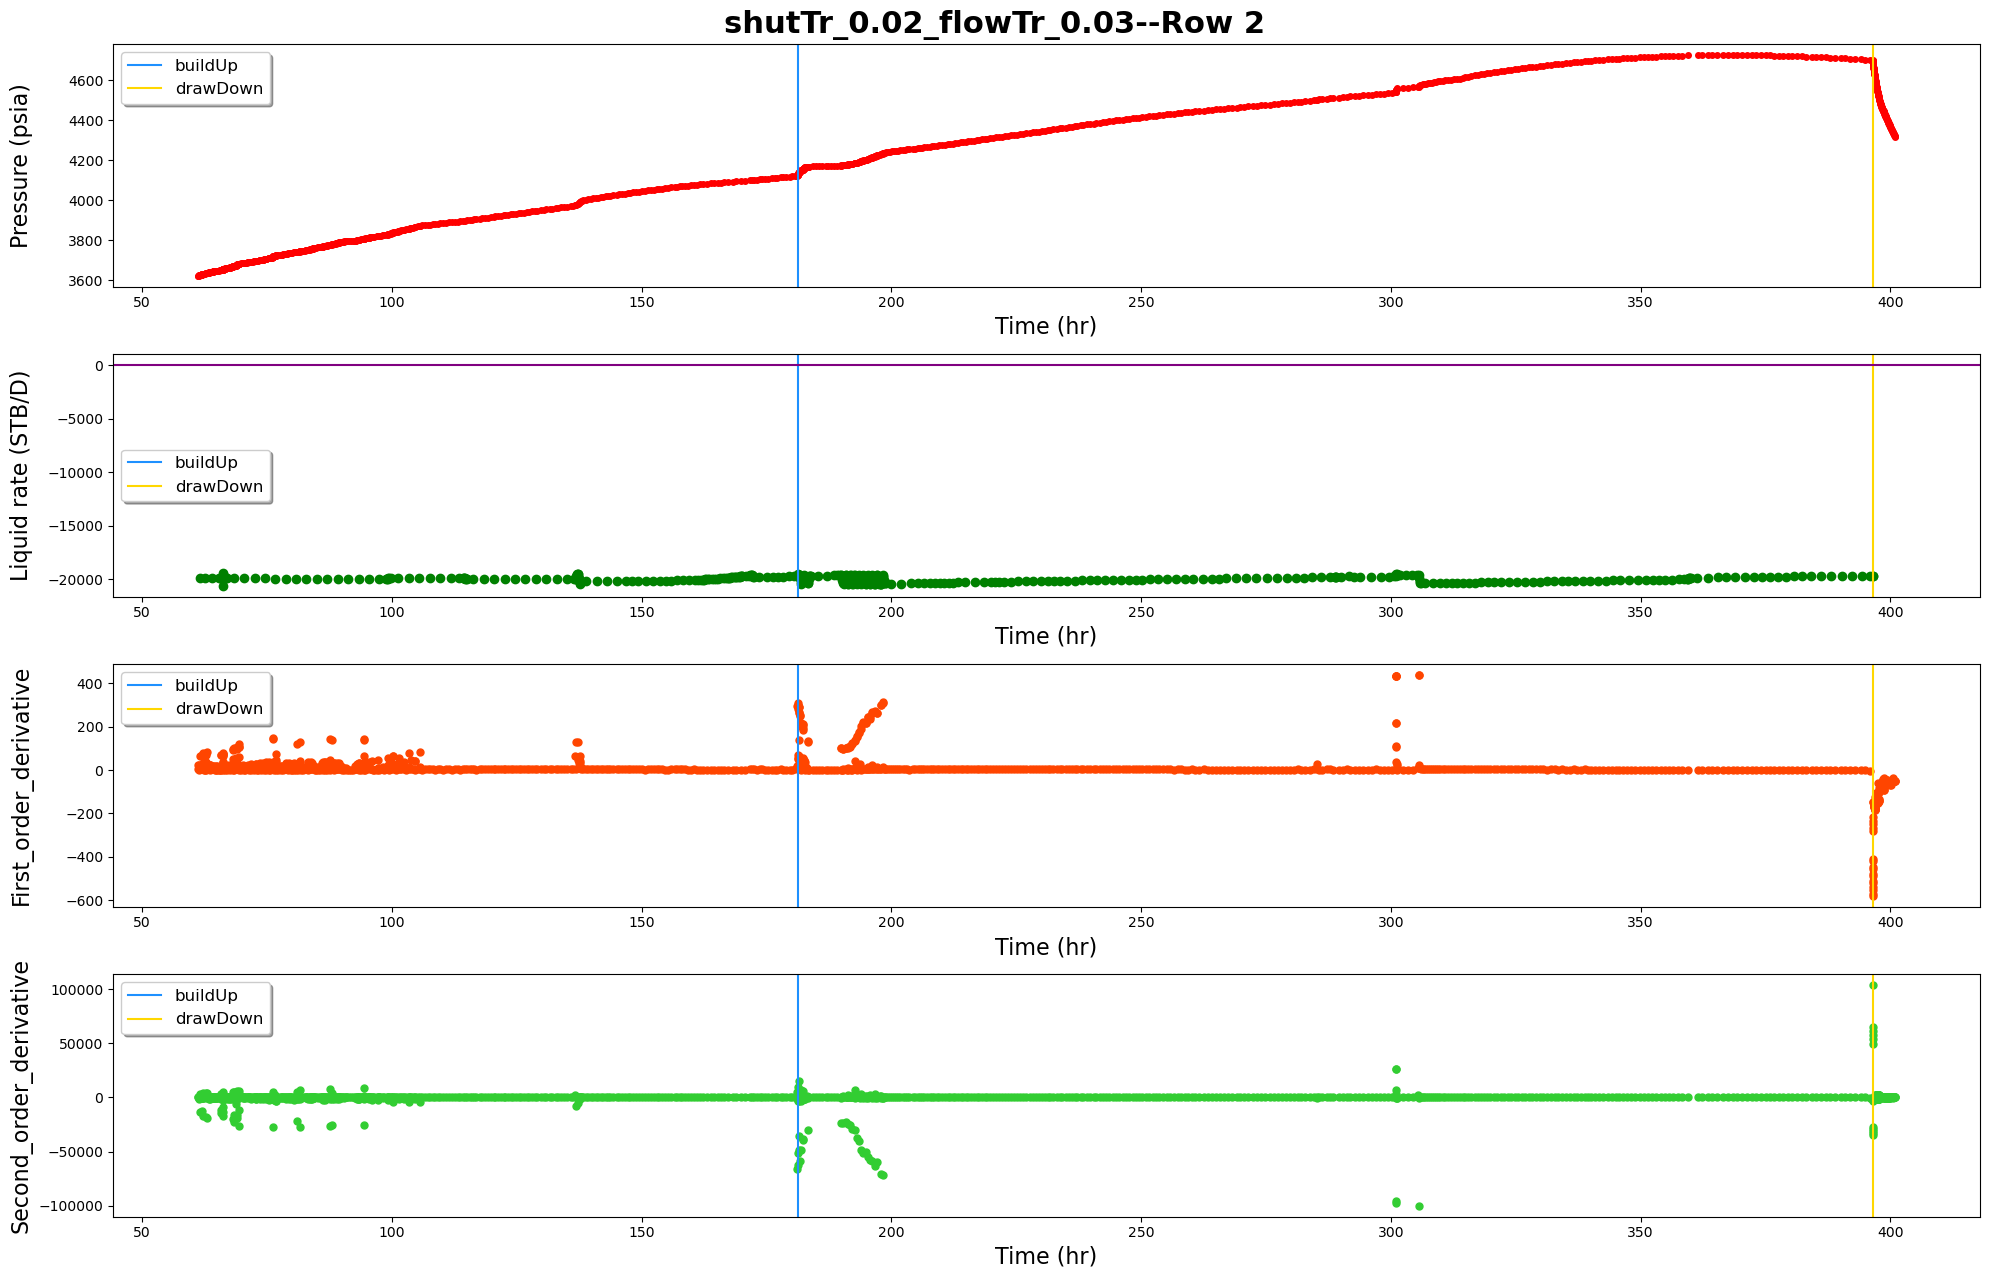

------row 3-----detected points:[2477, 2577, 2666, 2804, 2884, 2993, 3095, 3560]


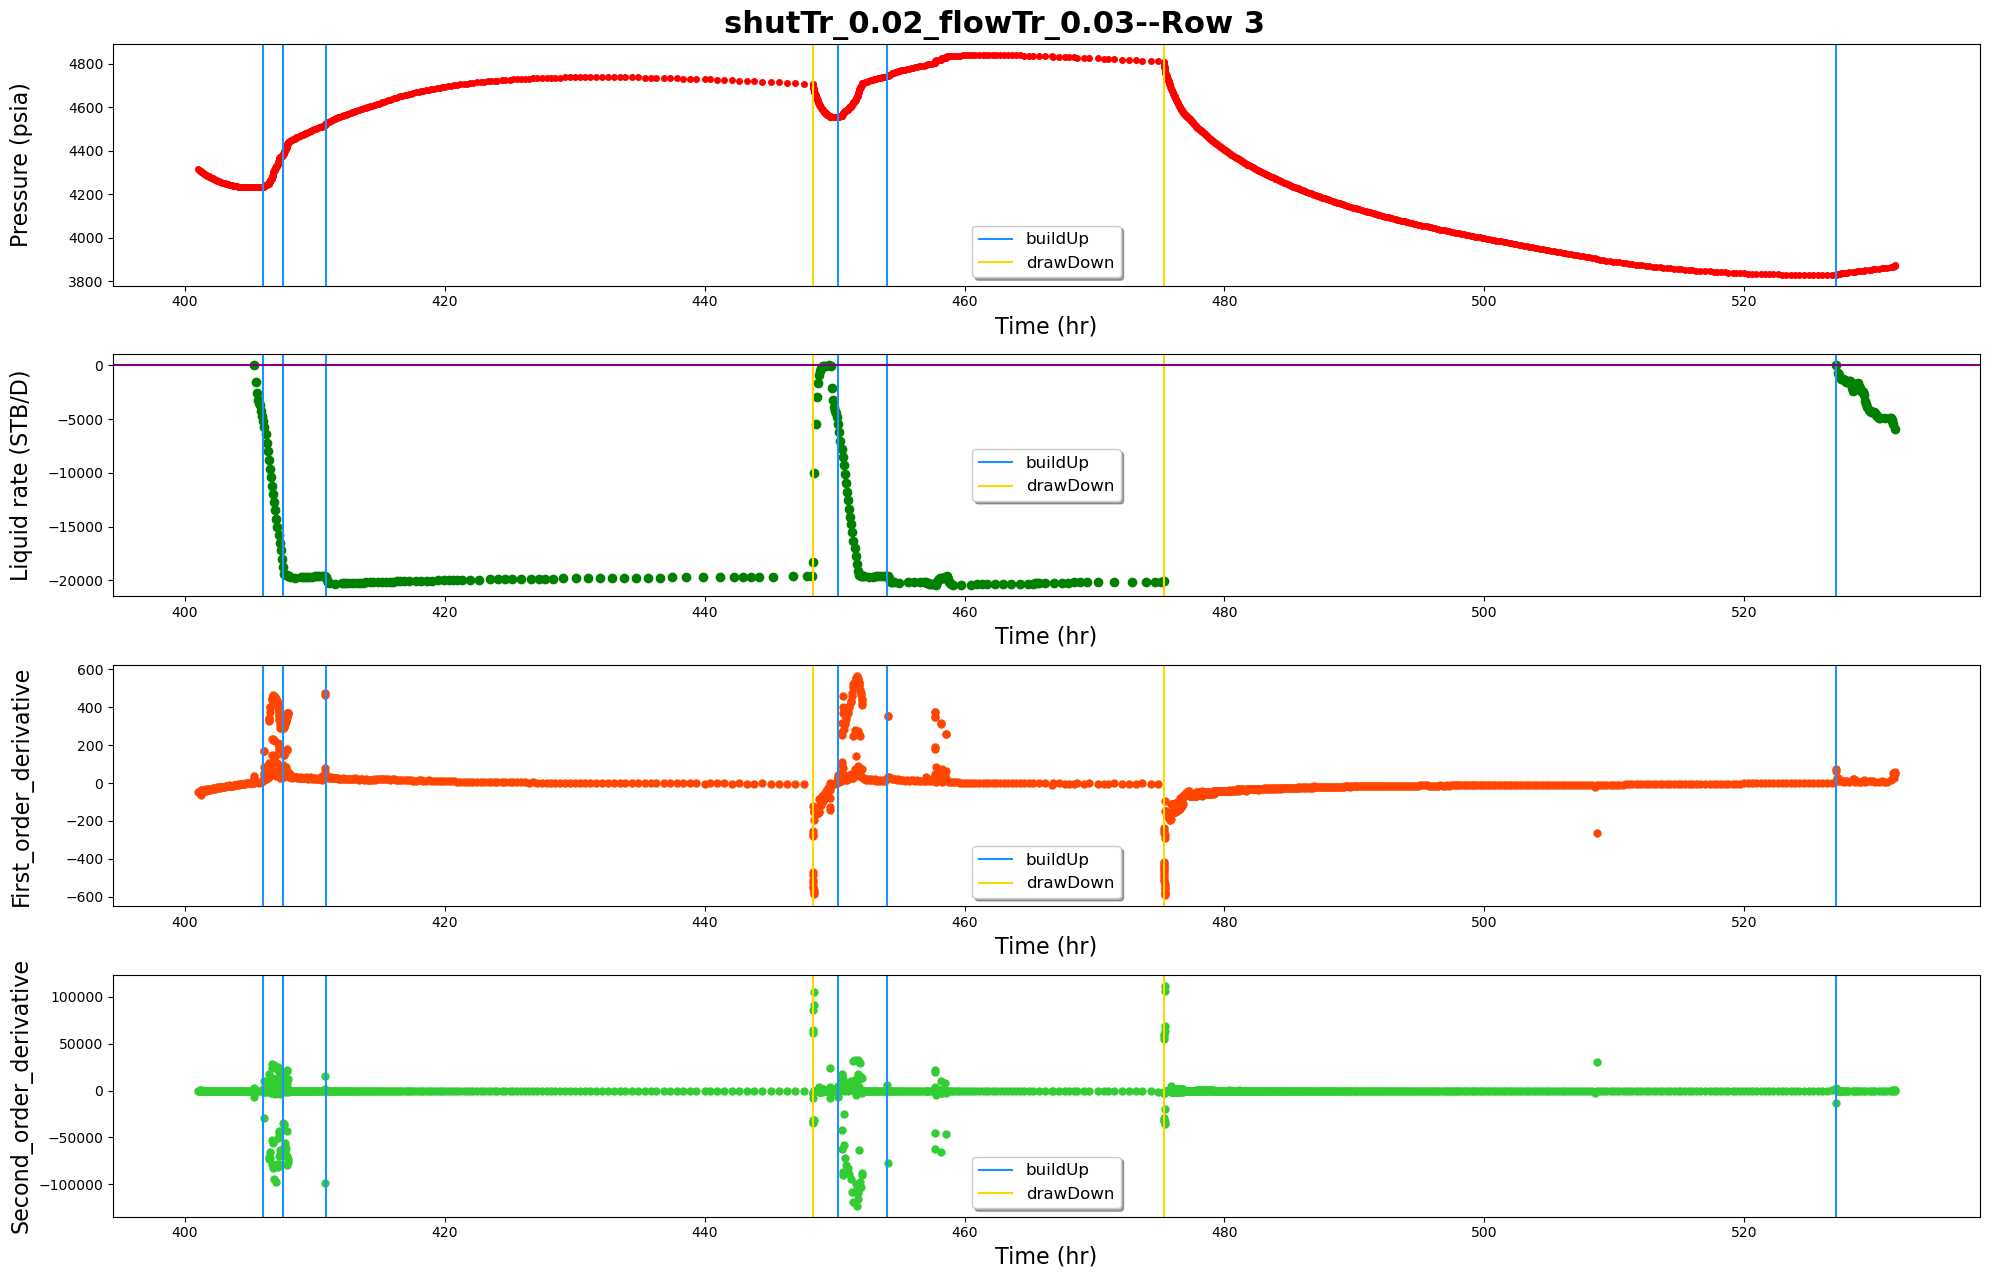

------row 4-----detected points:[3663, 3723, 3902, 3988, 4228, 4328, 4442, 4750]


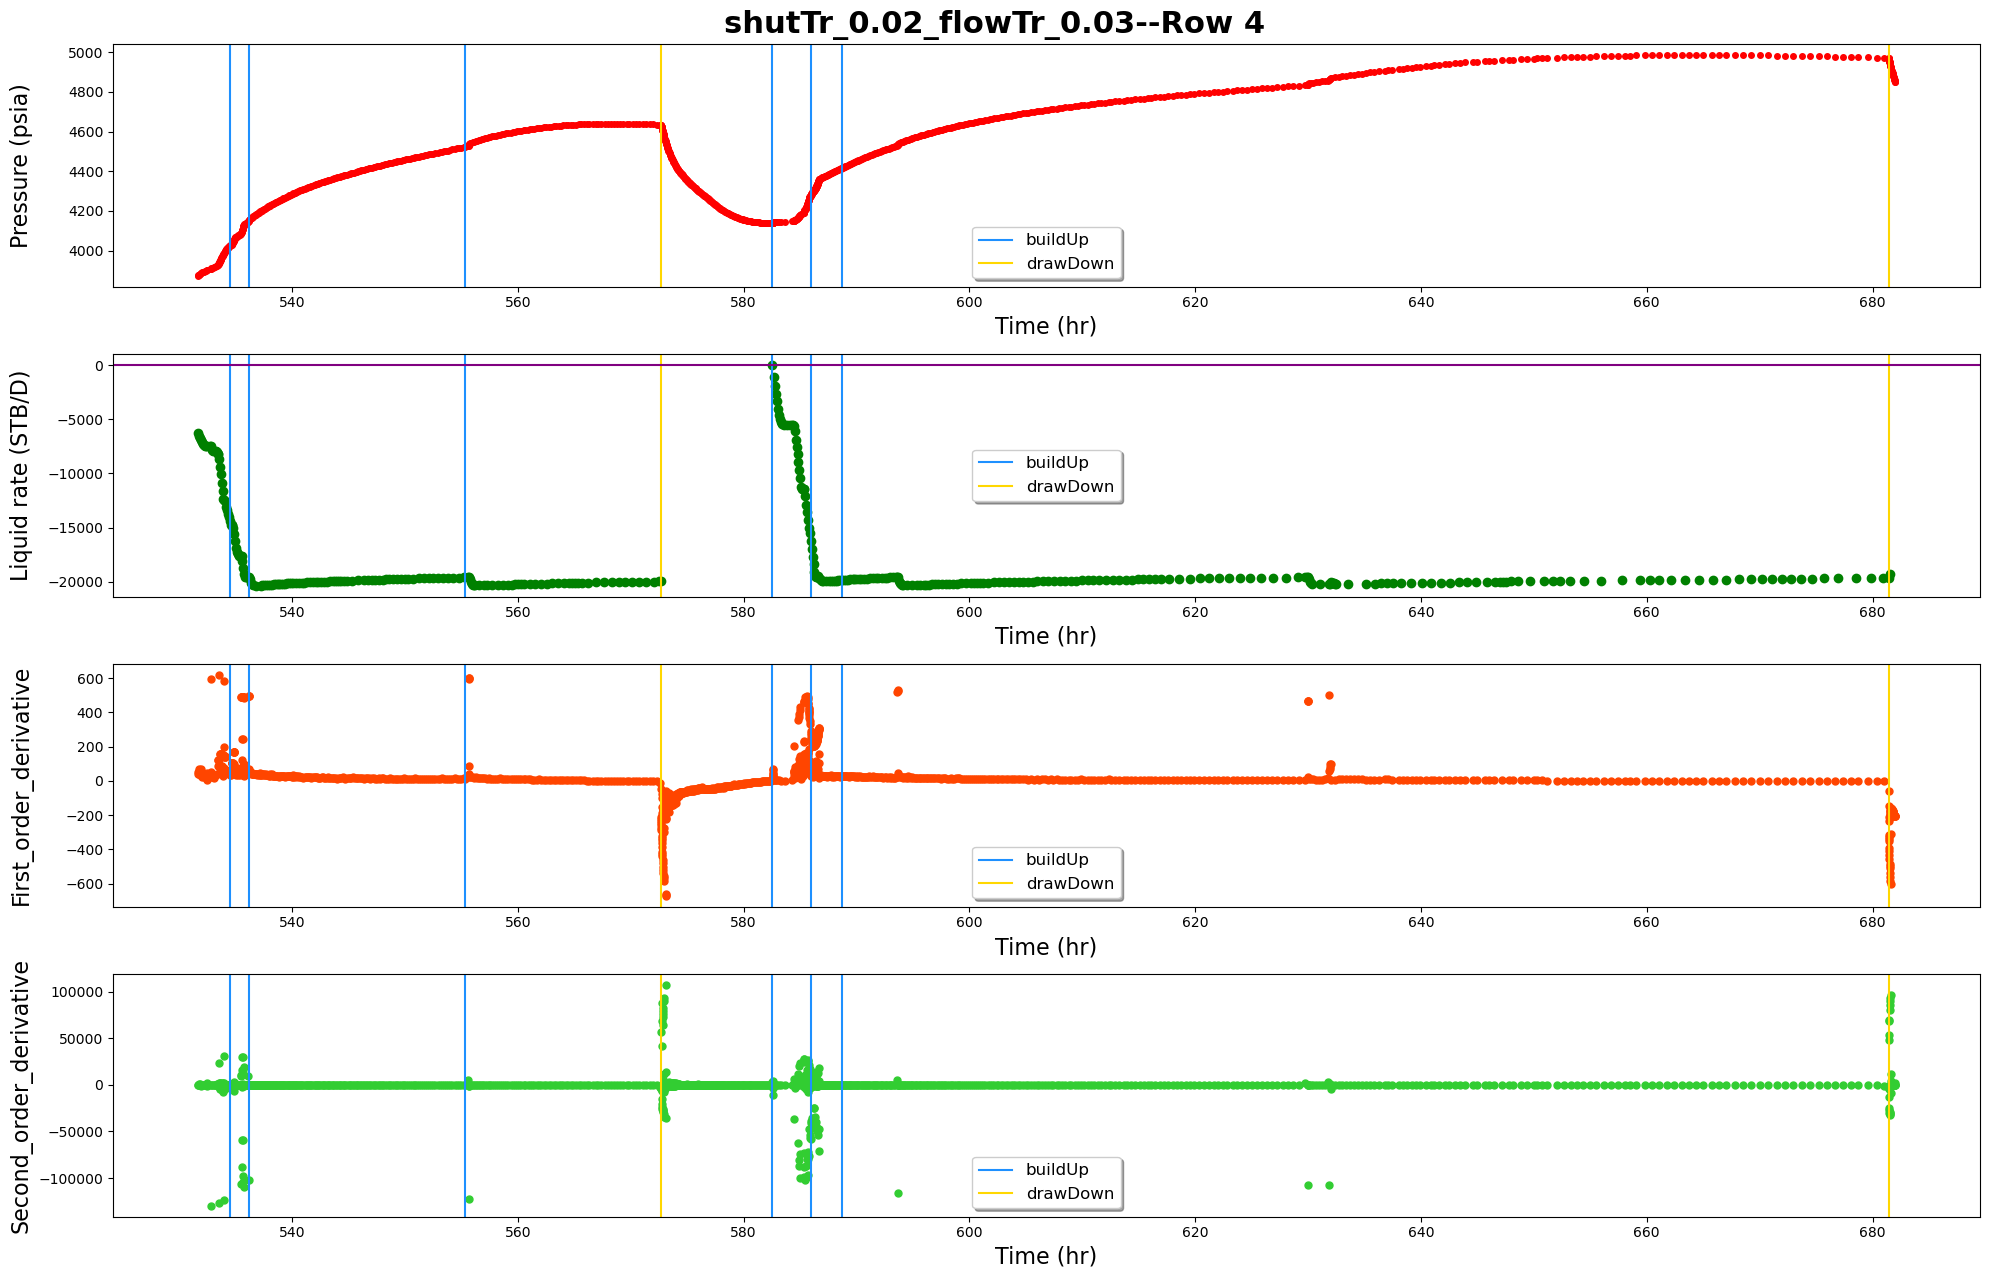

------row 5-----detected points:[4899, 4981, 5319, 5445, 5576, 5834, 5944]


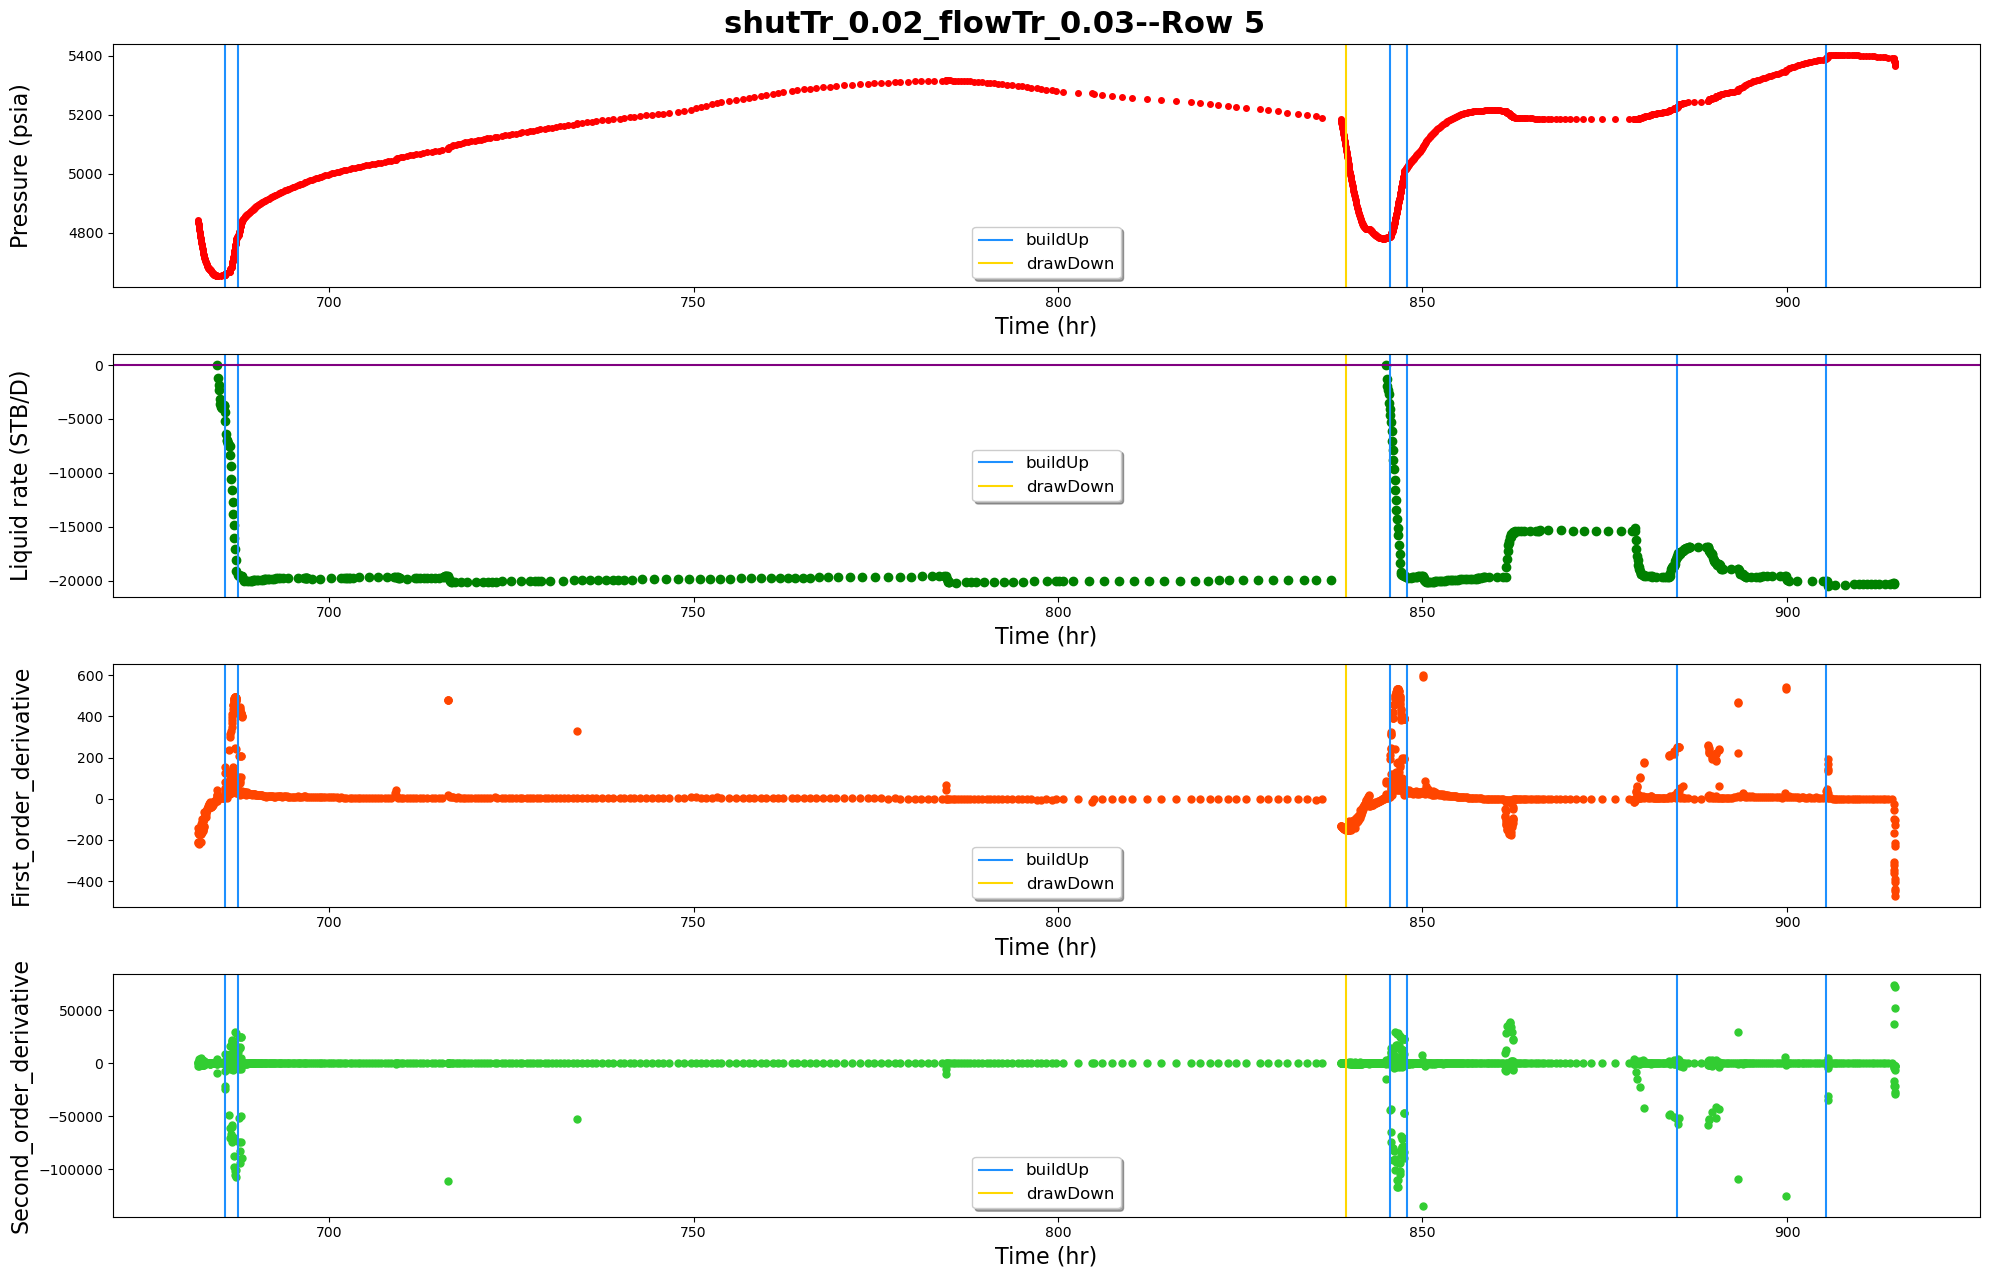

------row 6-----detected points:[6024, 6543, 6769, 6870]


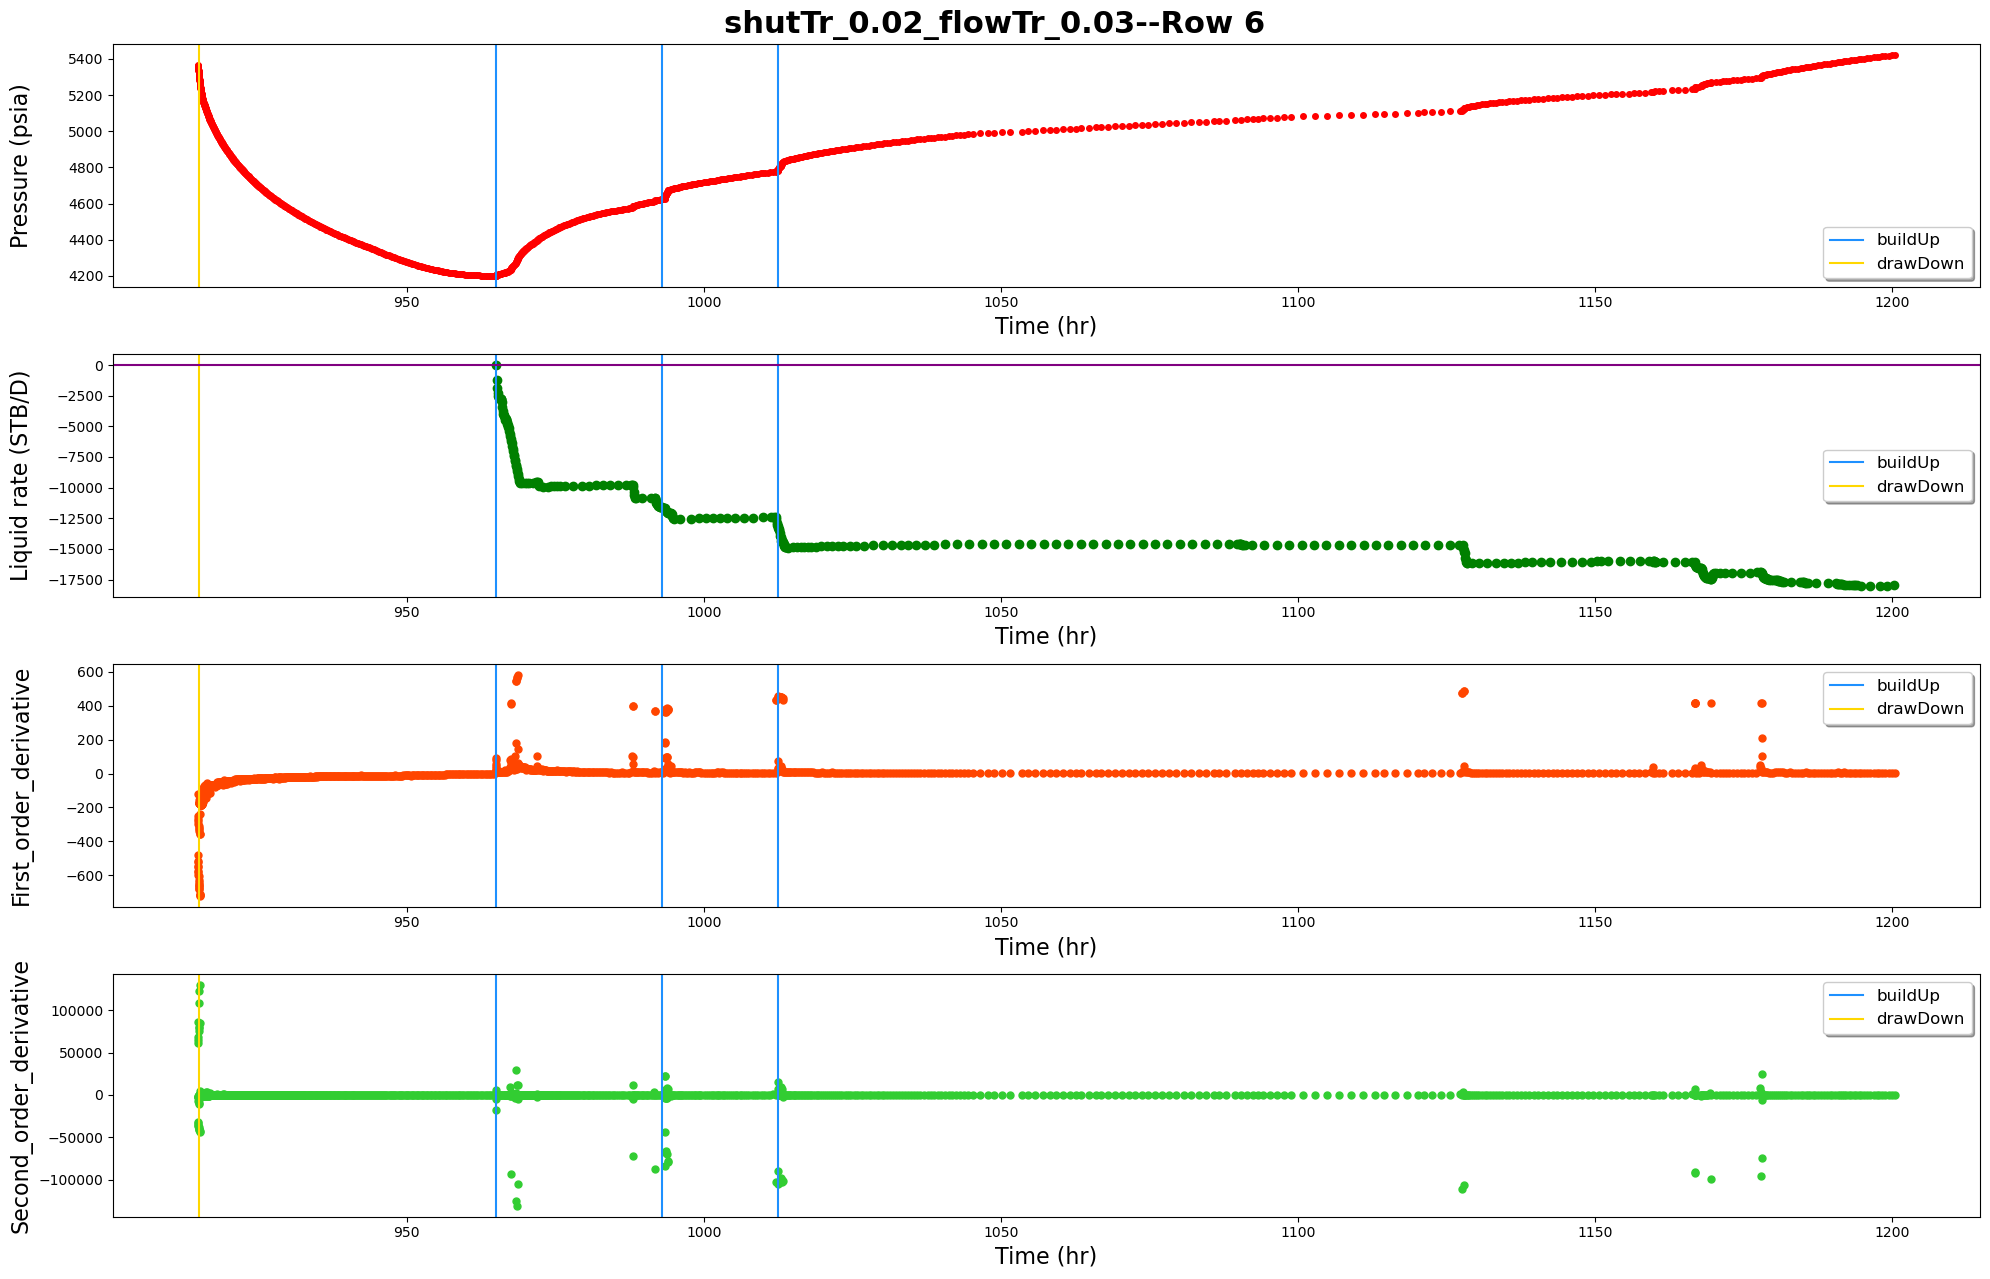

------row 7-----detected points:[7284, 7544, 7618, 7692, 7811, 7988, 8361]


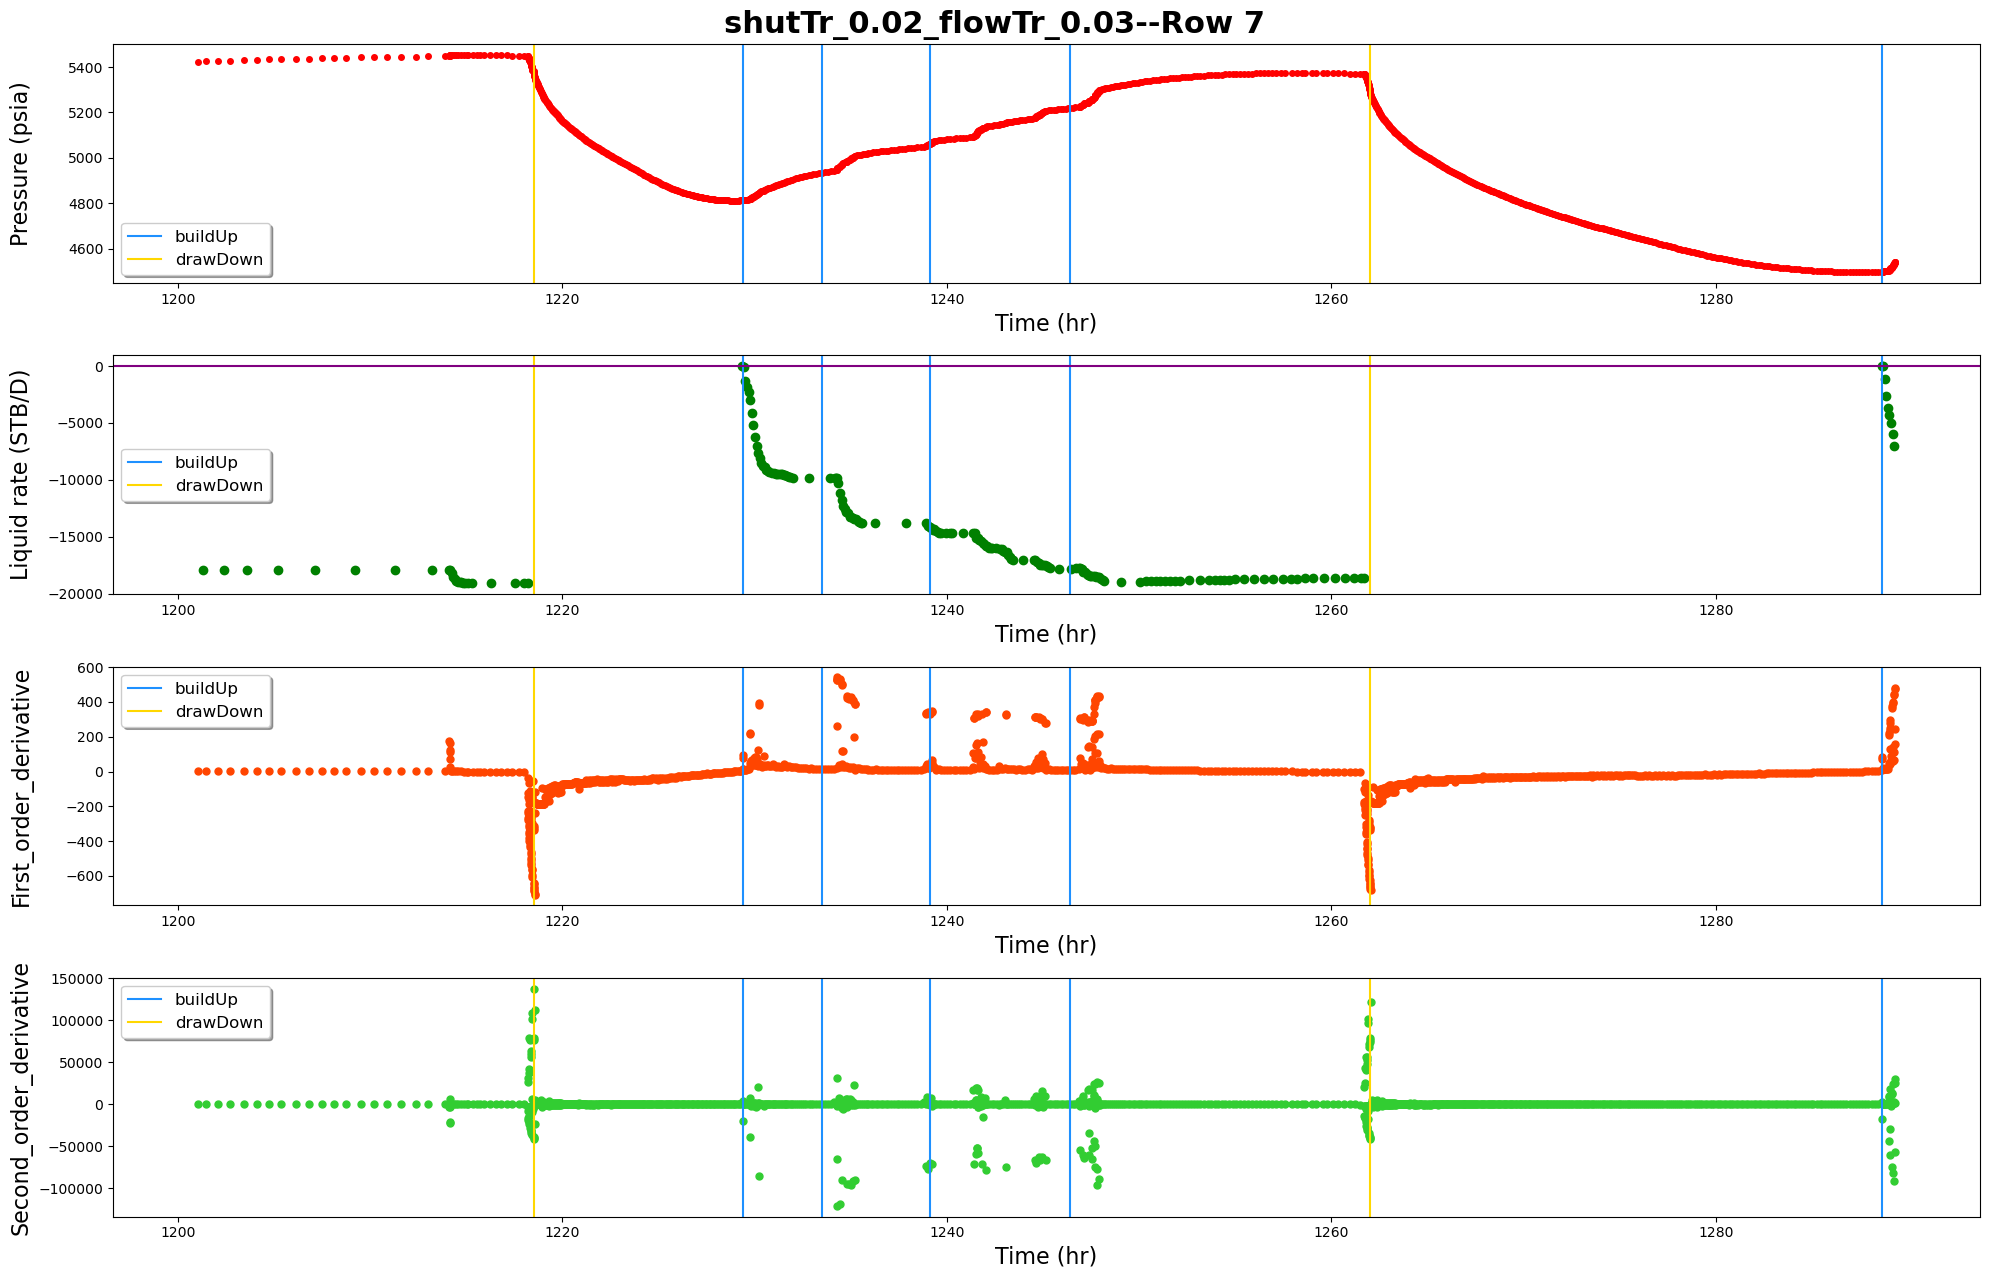

------row 8-----detected points:[8448, 8597, 8662, 8786, 8866, 9024]


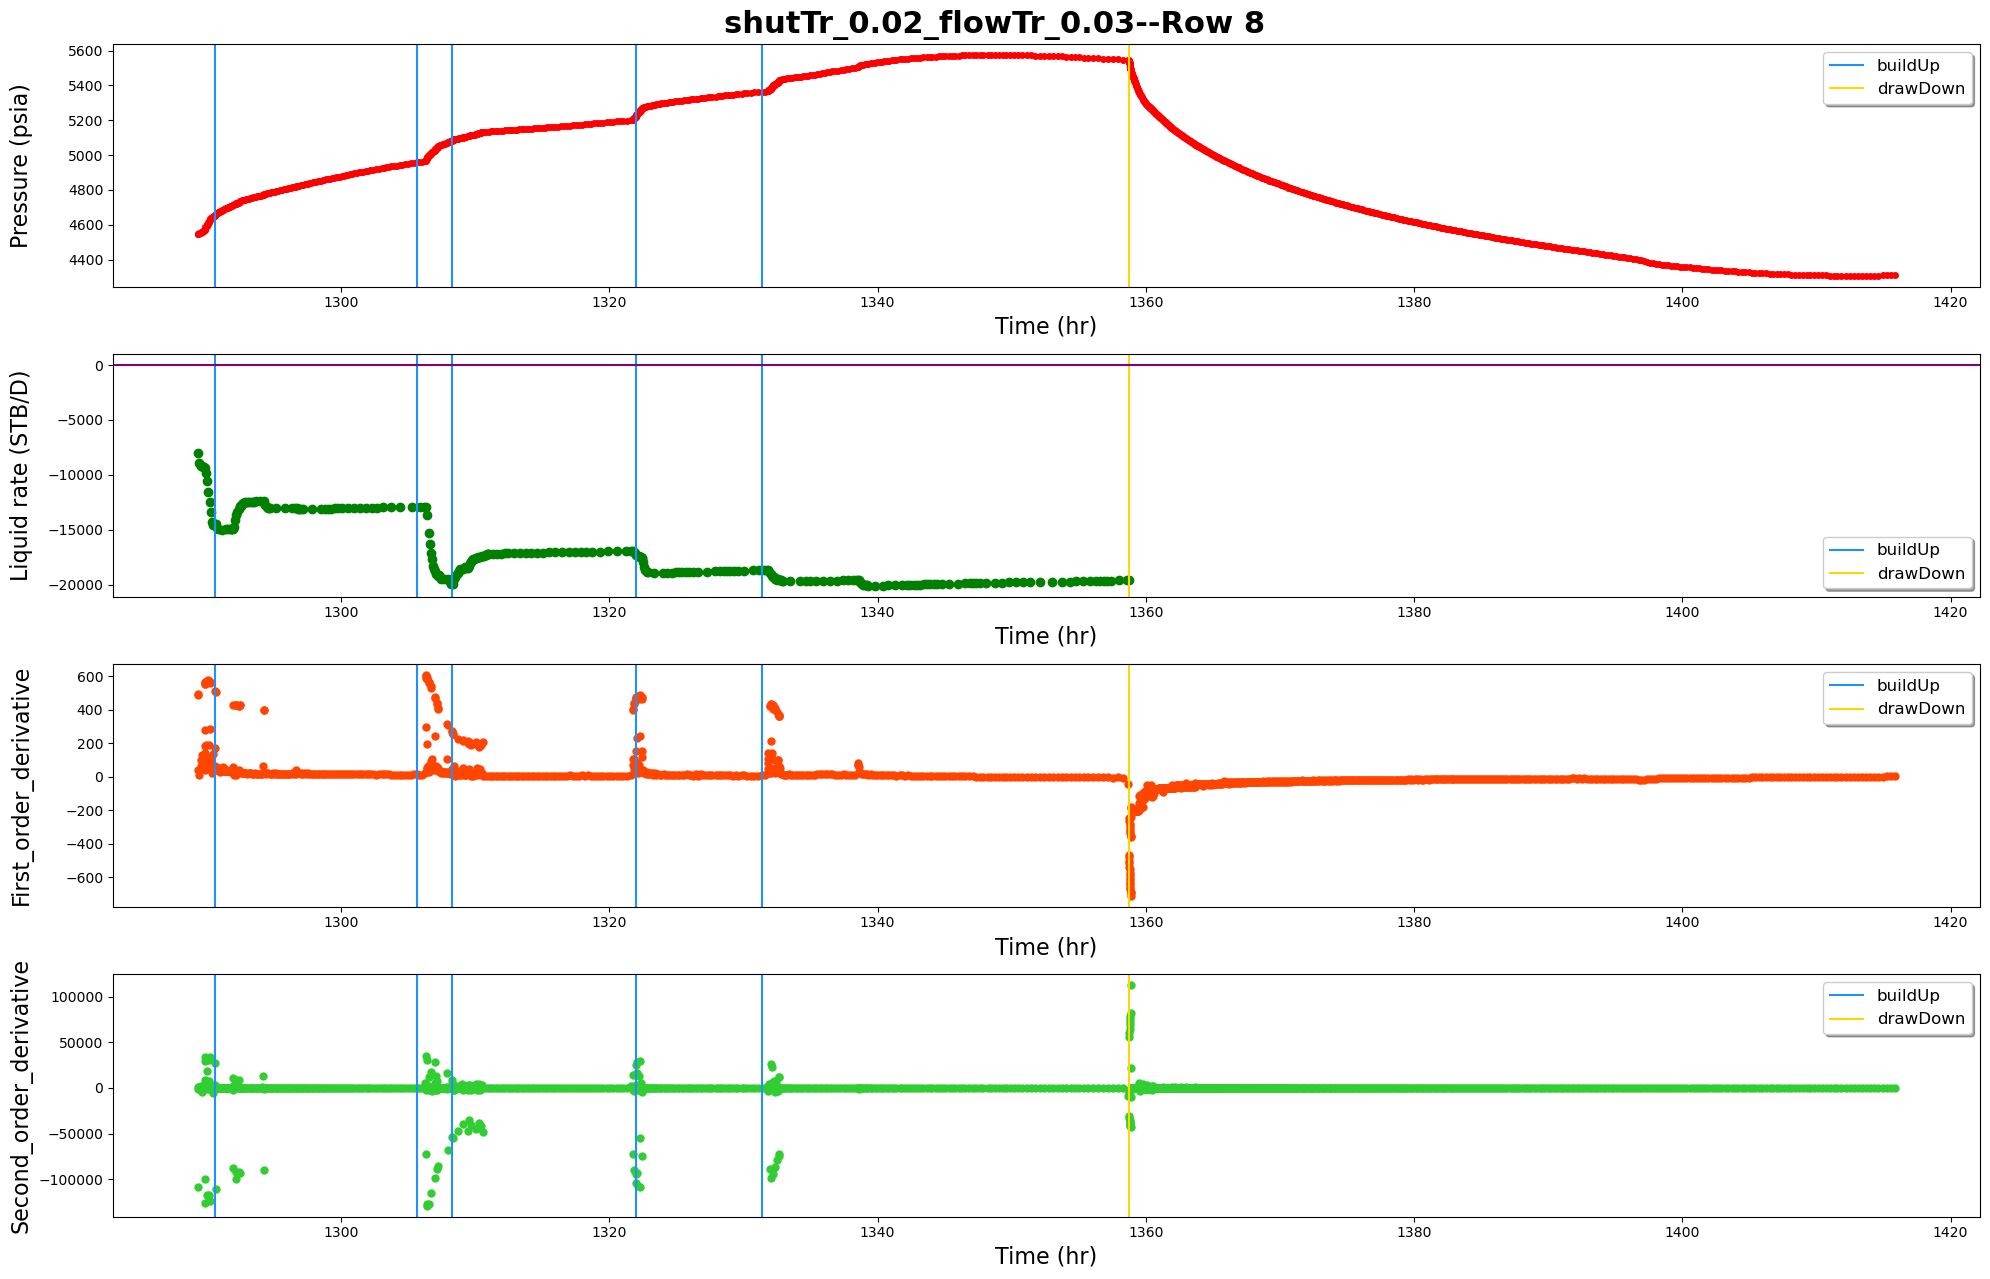

------row 9-----detected points:[9606, 9705, 9818, 9897, 10149, 10224, 10296, 10462, 10527]


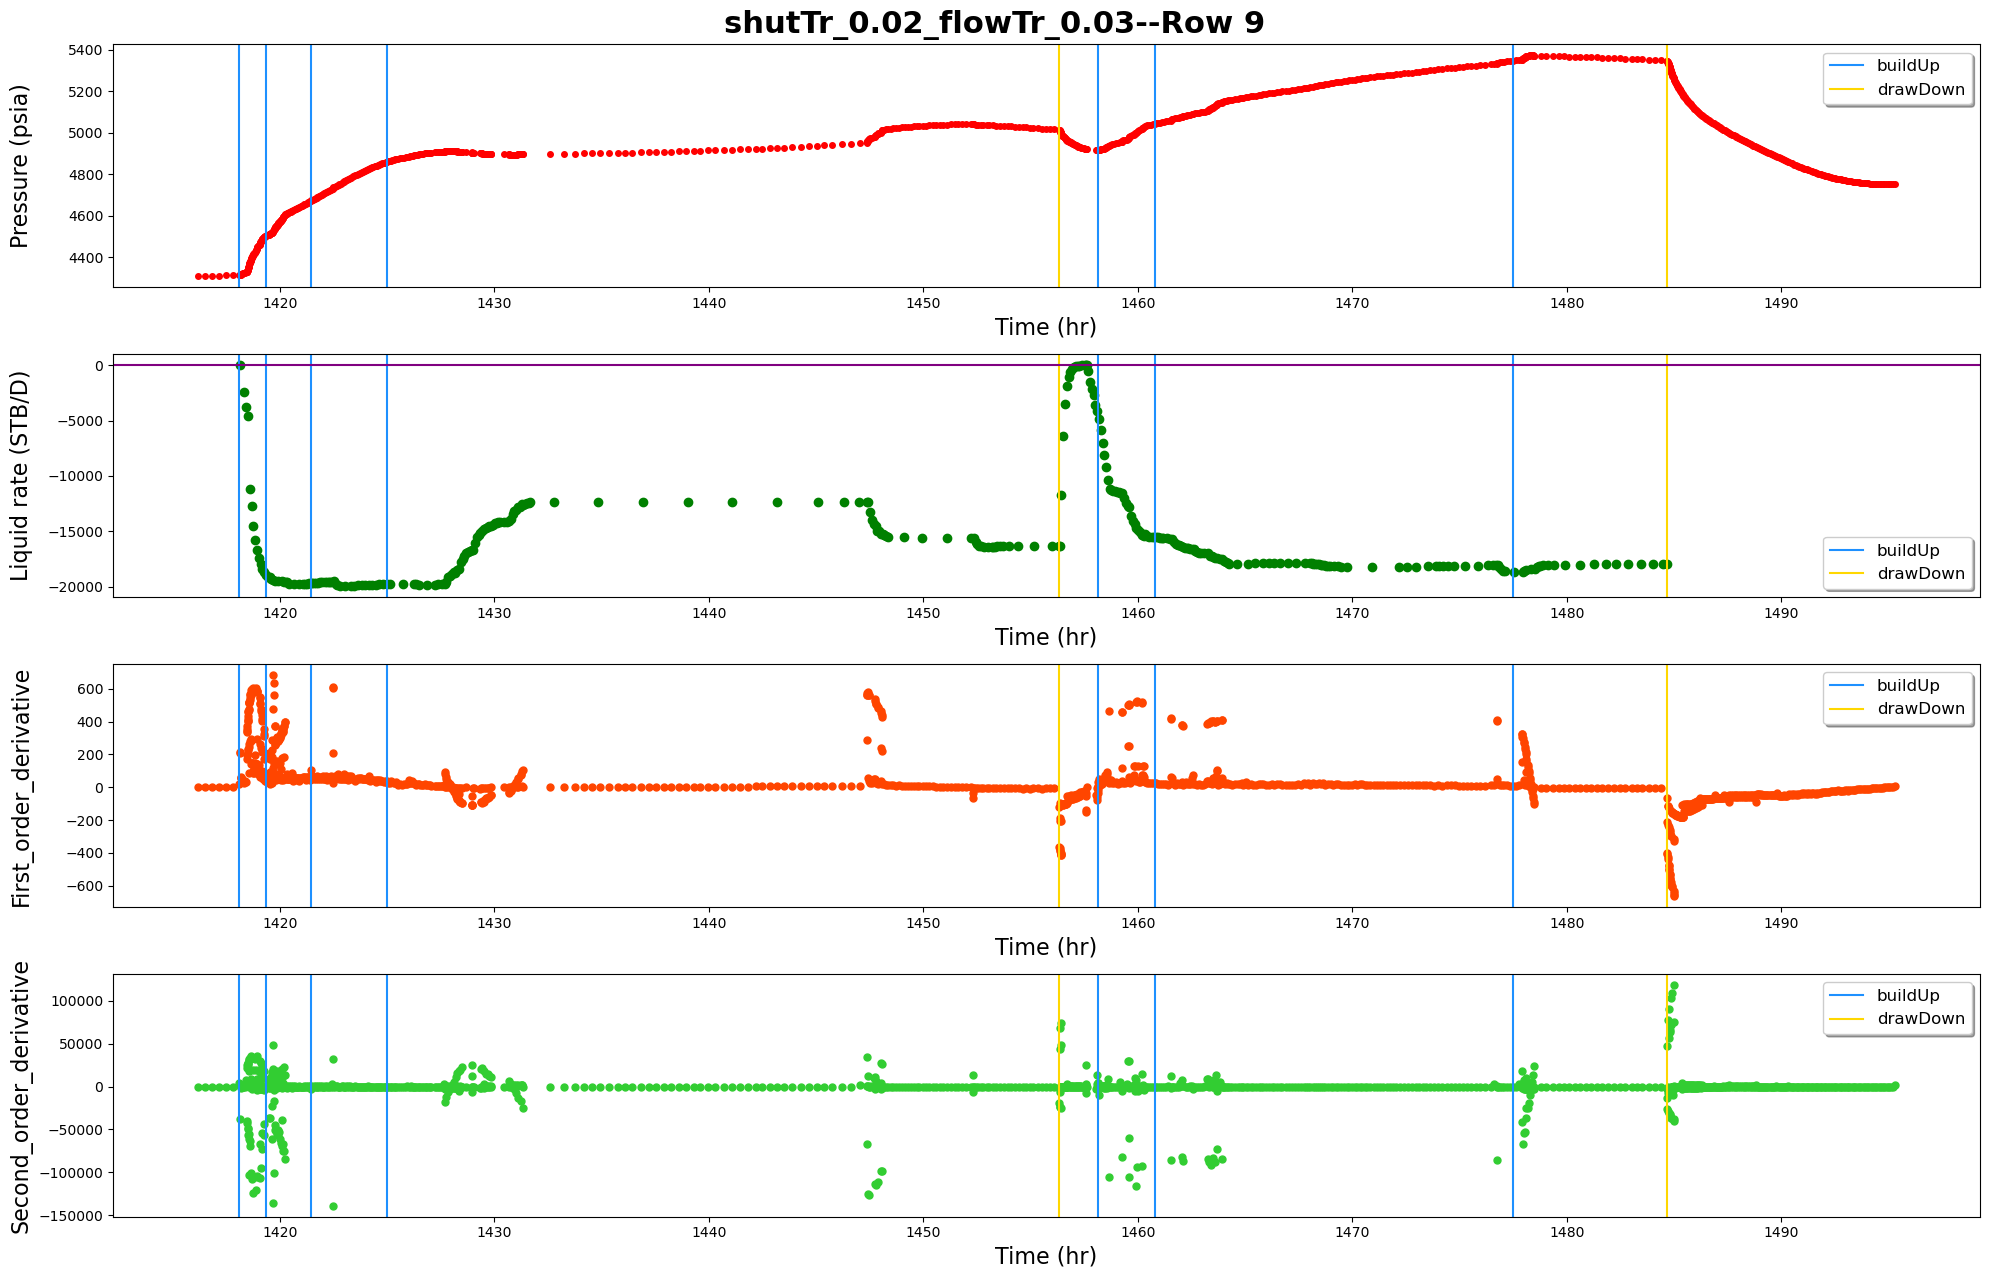

------row 10-----detected points:[10800, 10903, 10972, 11078, 11340, 11490, 11621, 11743]


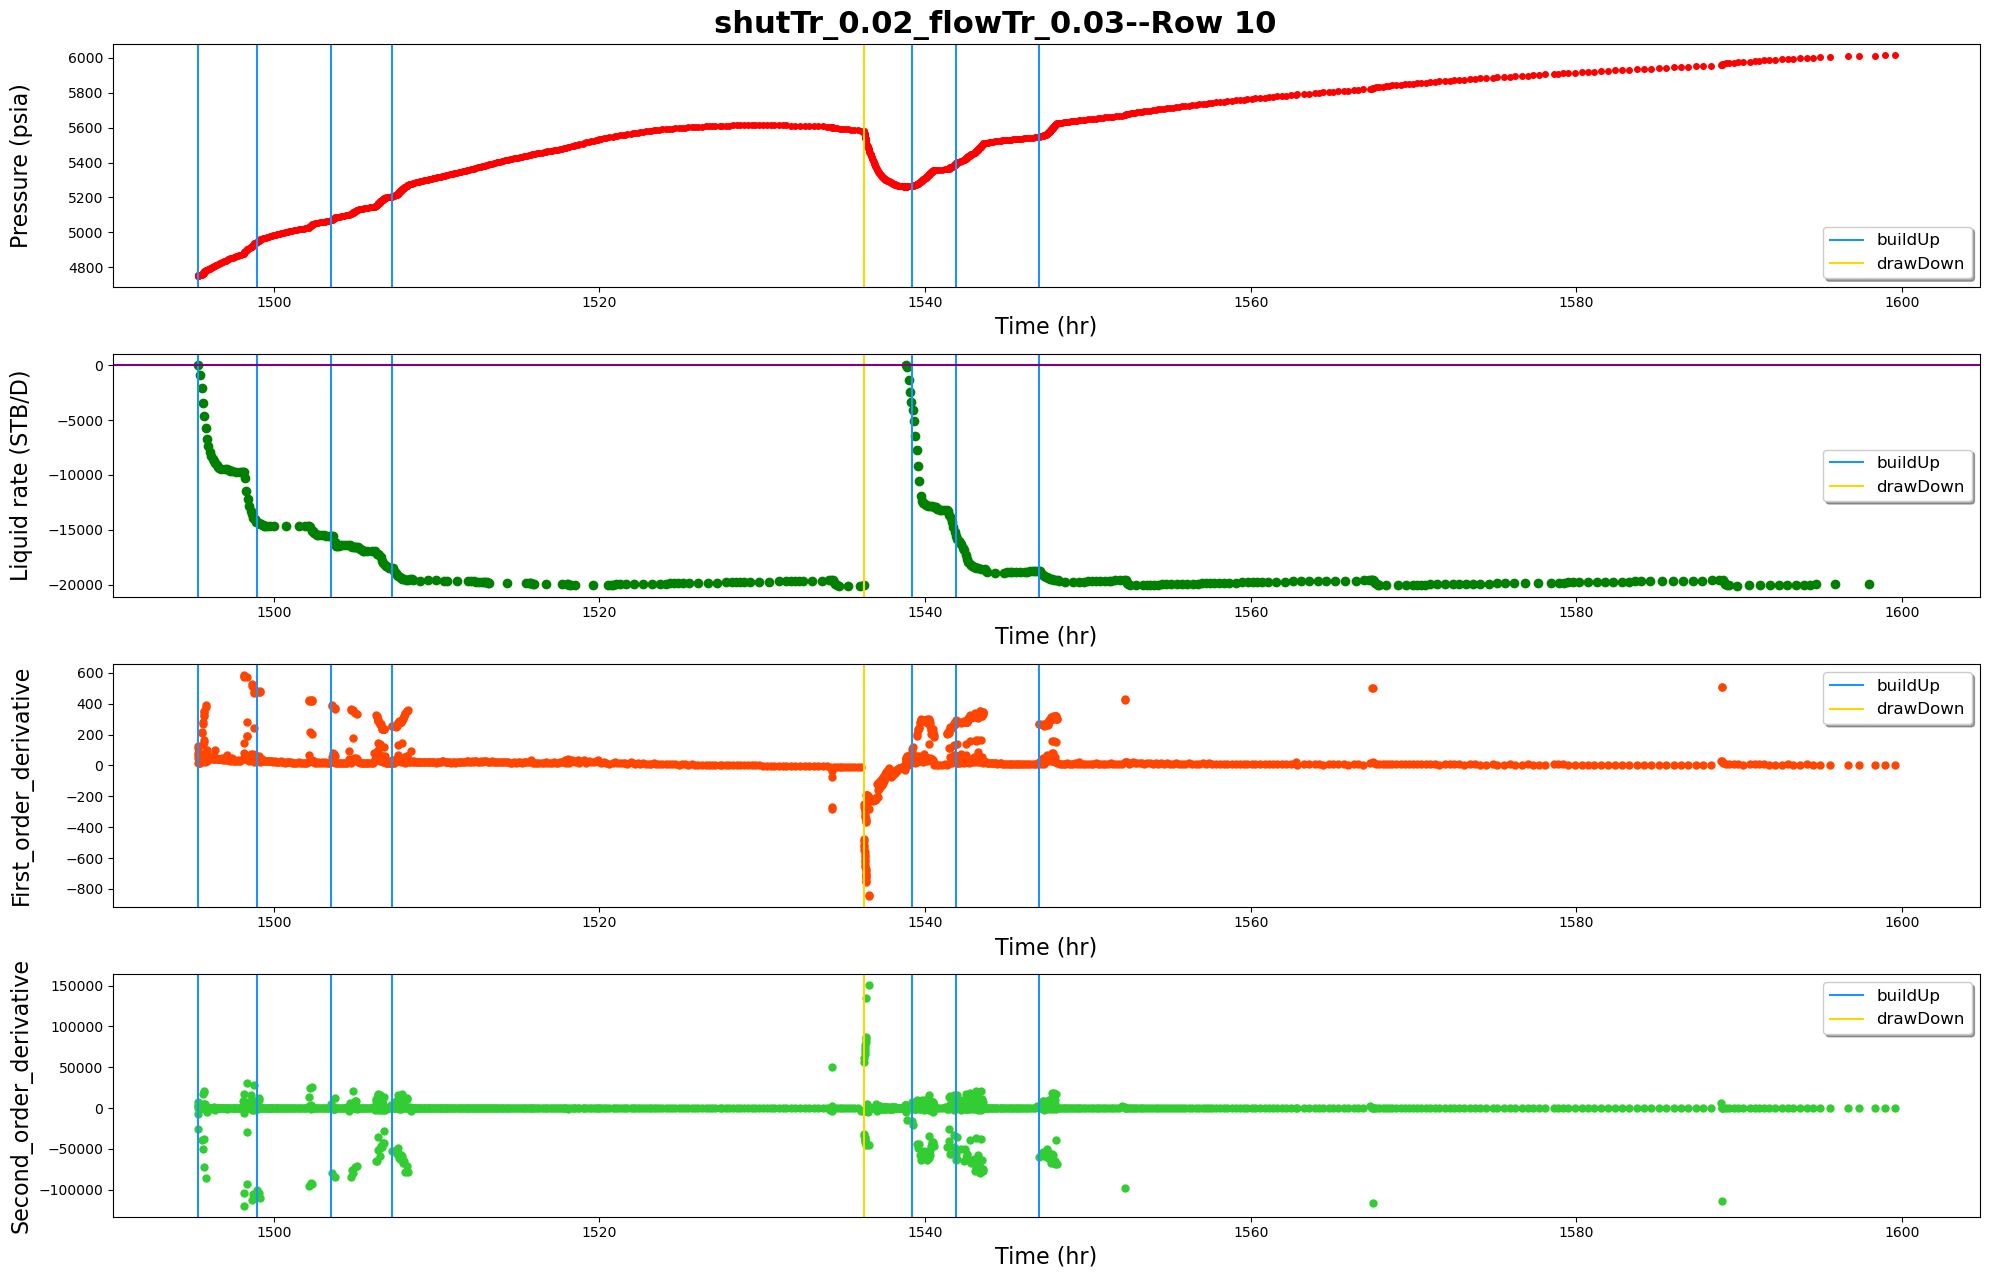

------row 11-----detected points:[12243, 12362, 13038, 13195]


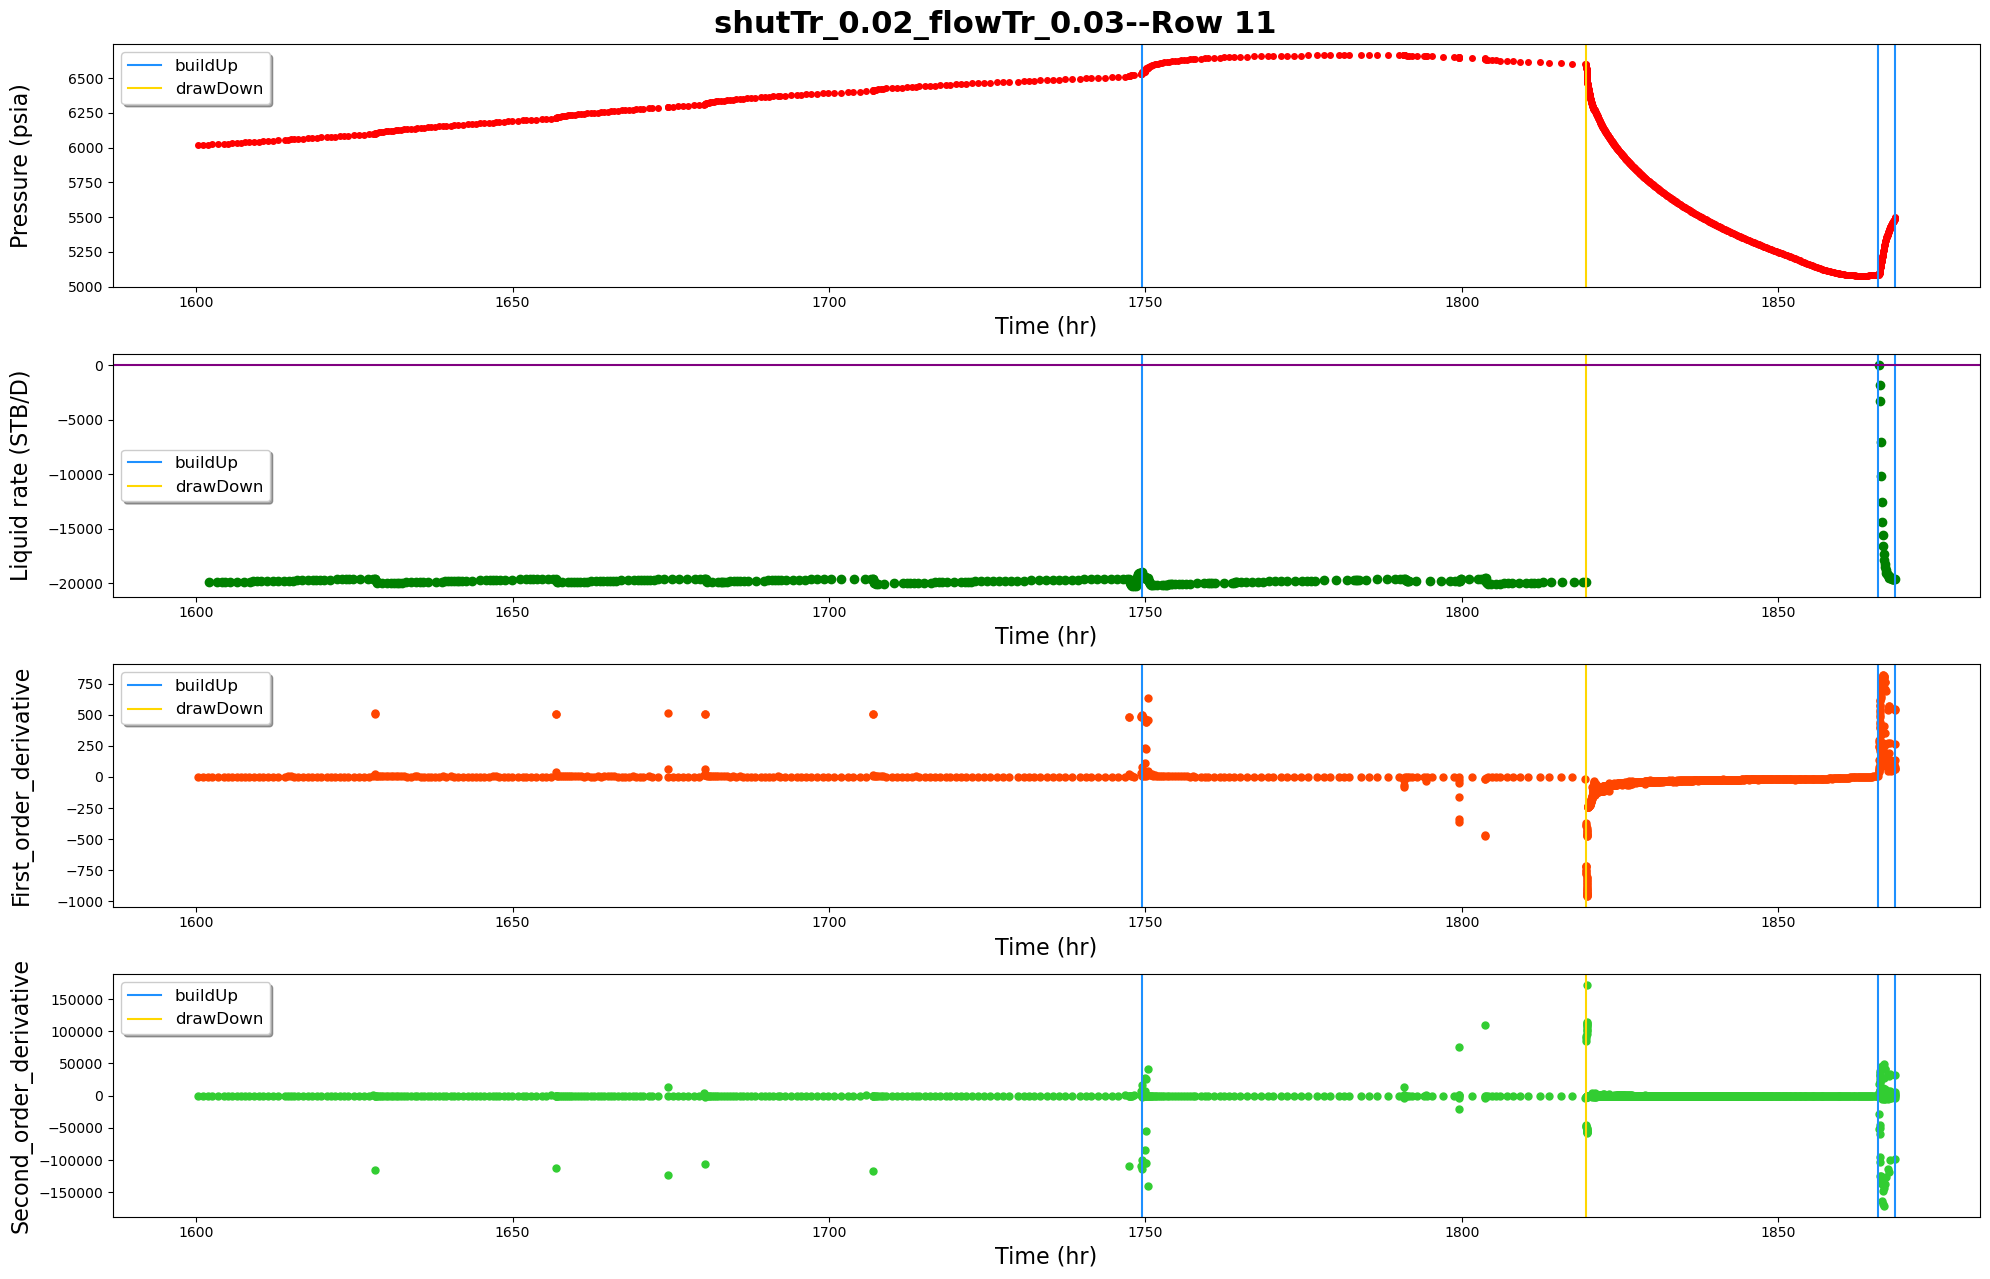

------row 12-----detected points:[13270, 13349, 13424, 13529, 13667, 13775, 13909, 14089, 14248, 14328]


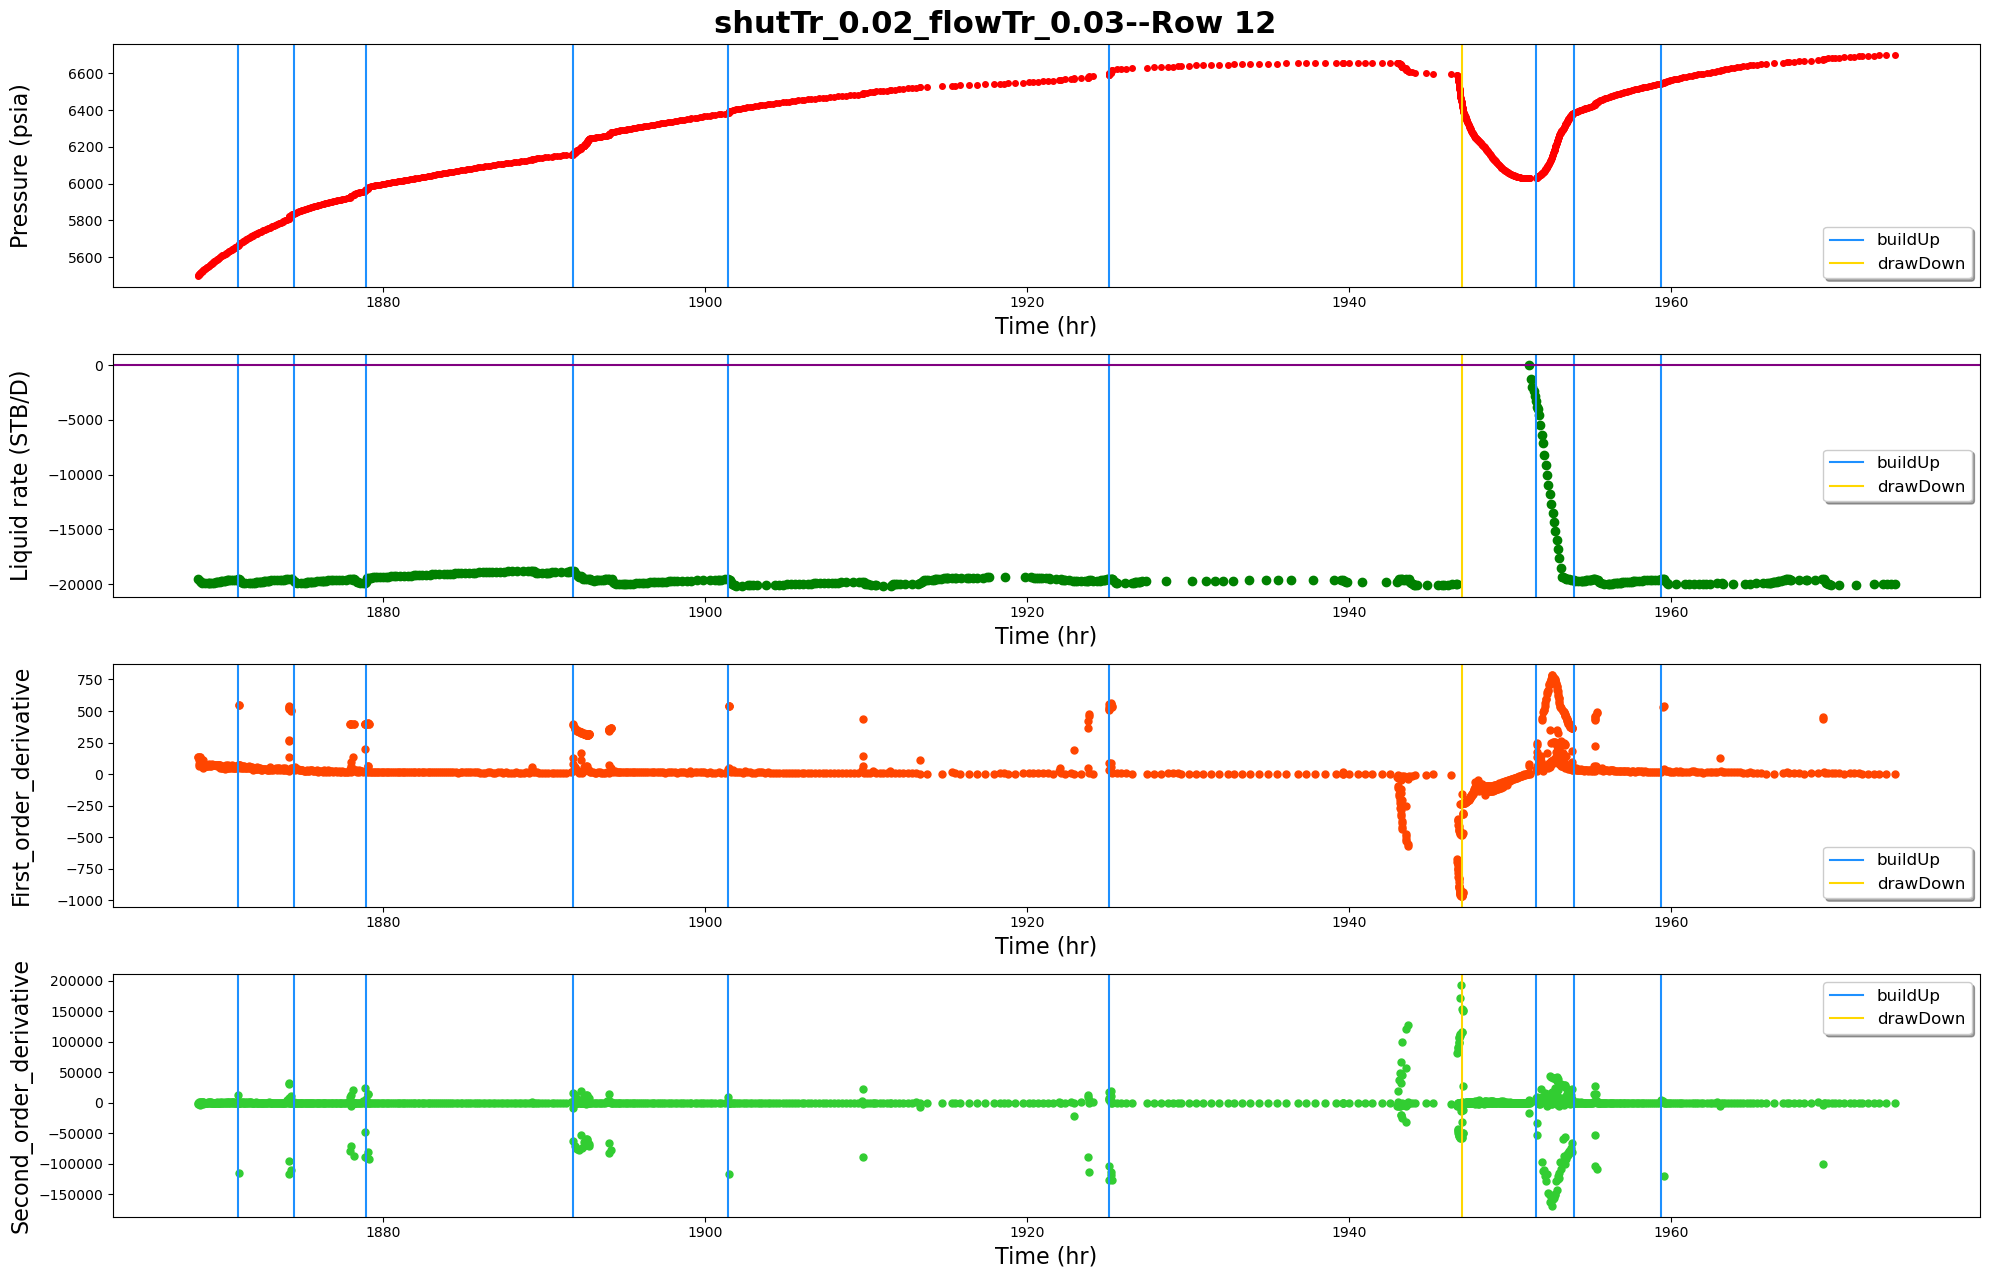

------row 13-----detected points:[14471, 14569, 14774, 15329, 15463, 15528]


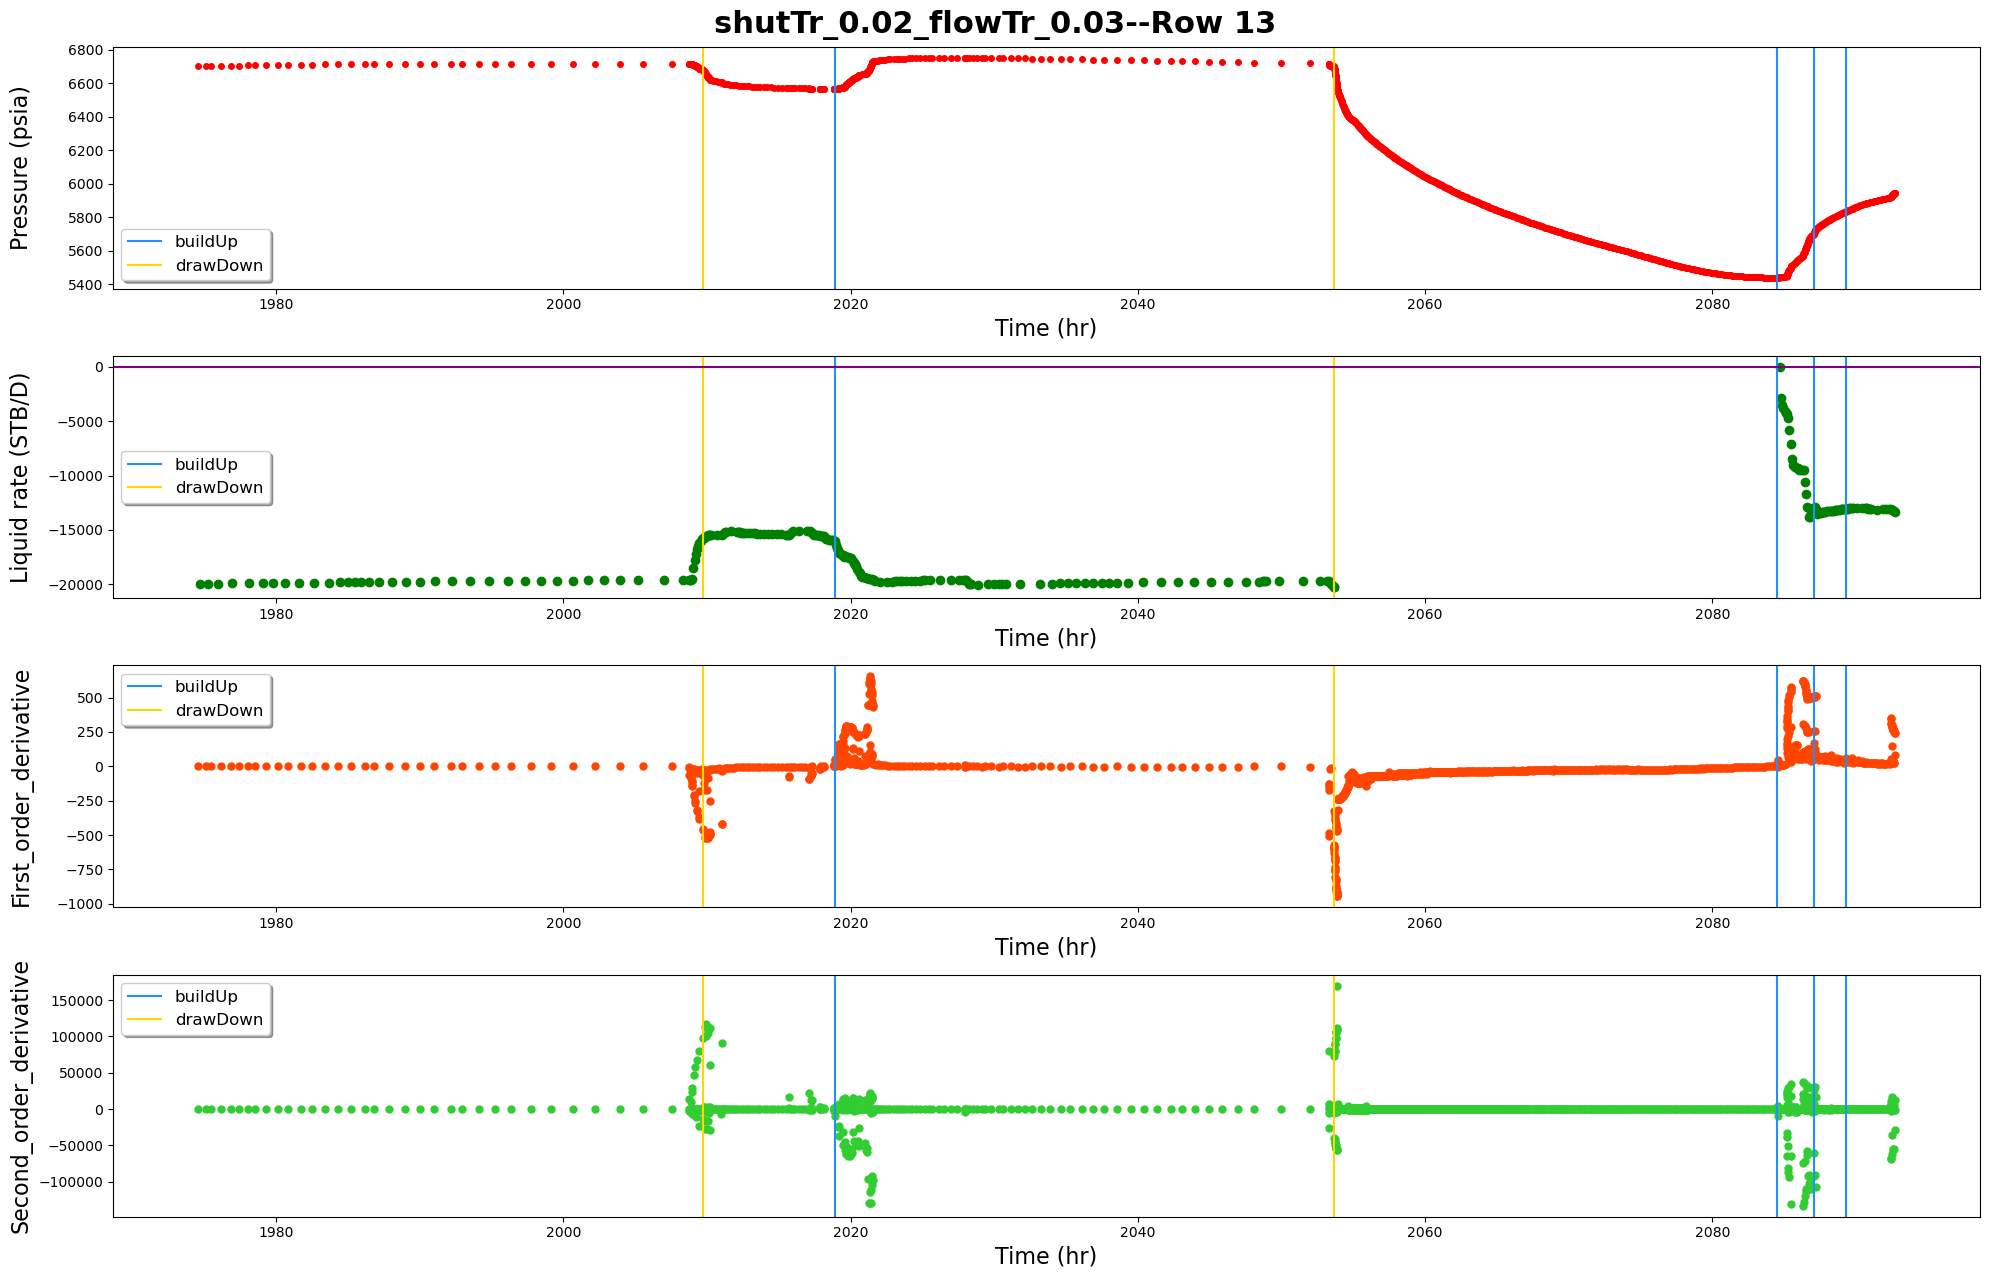

------row 14-----detected points:[15627, 15734, 15937, 16096, 16580, 16693, 16787]


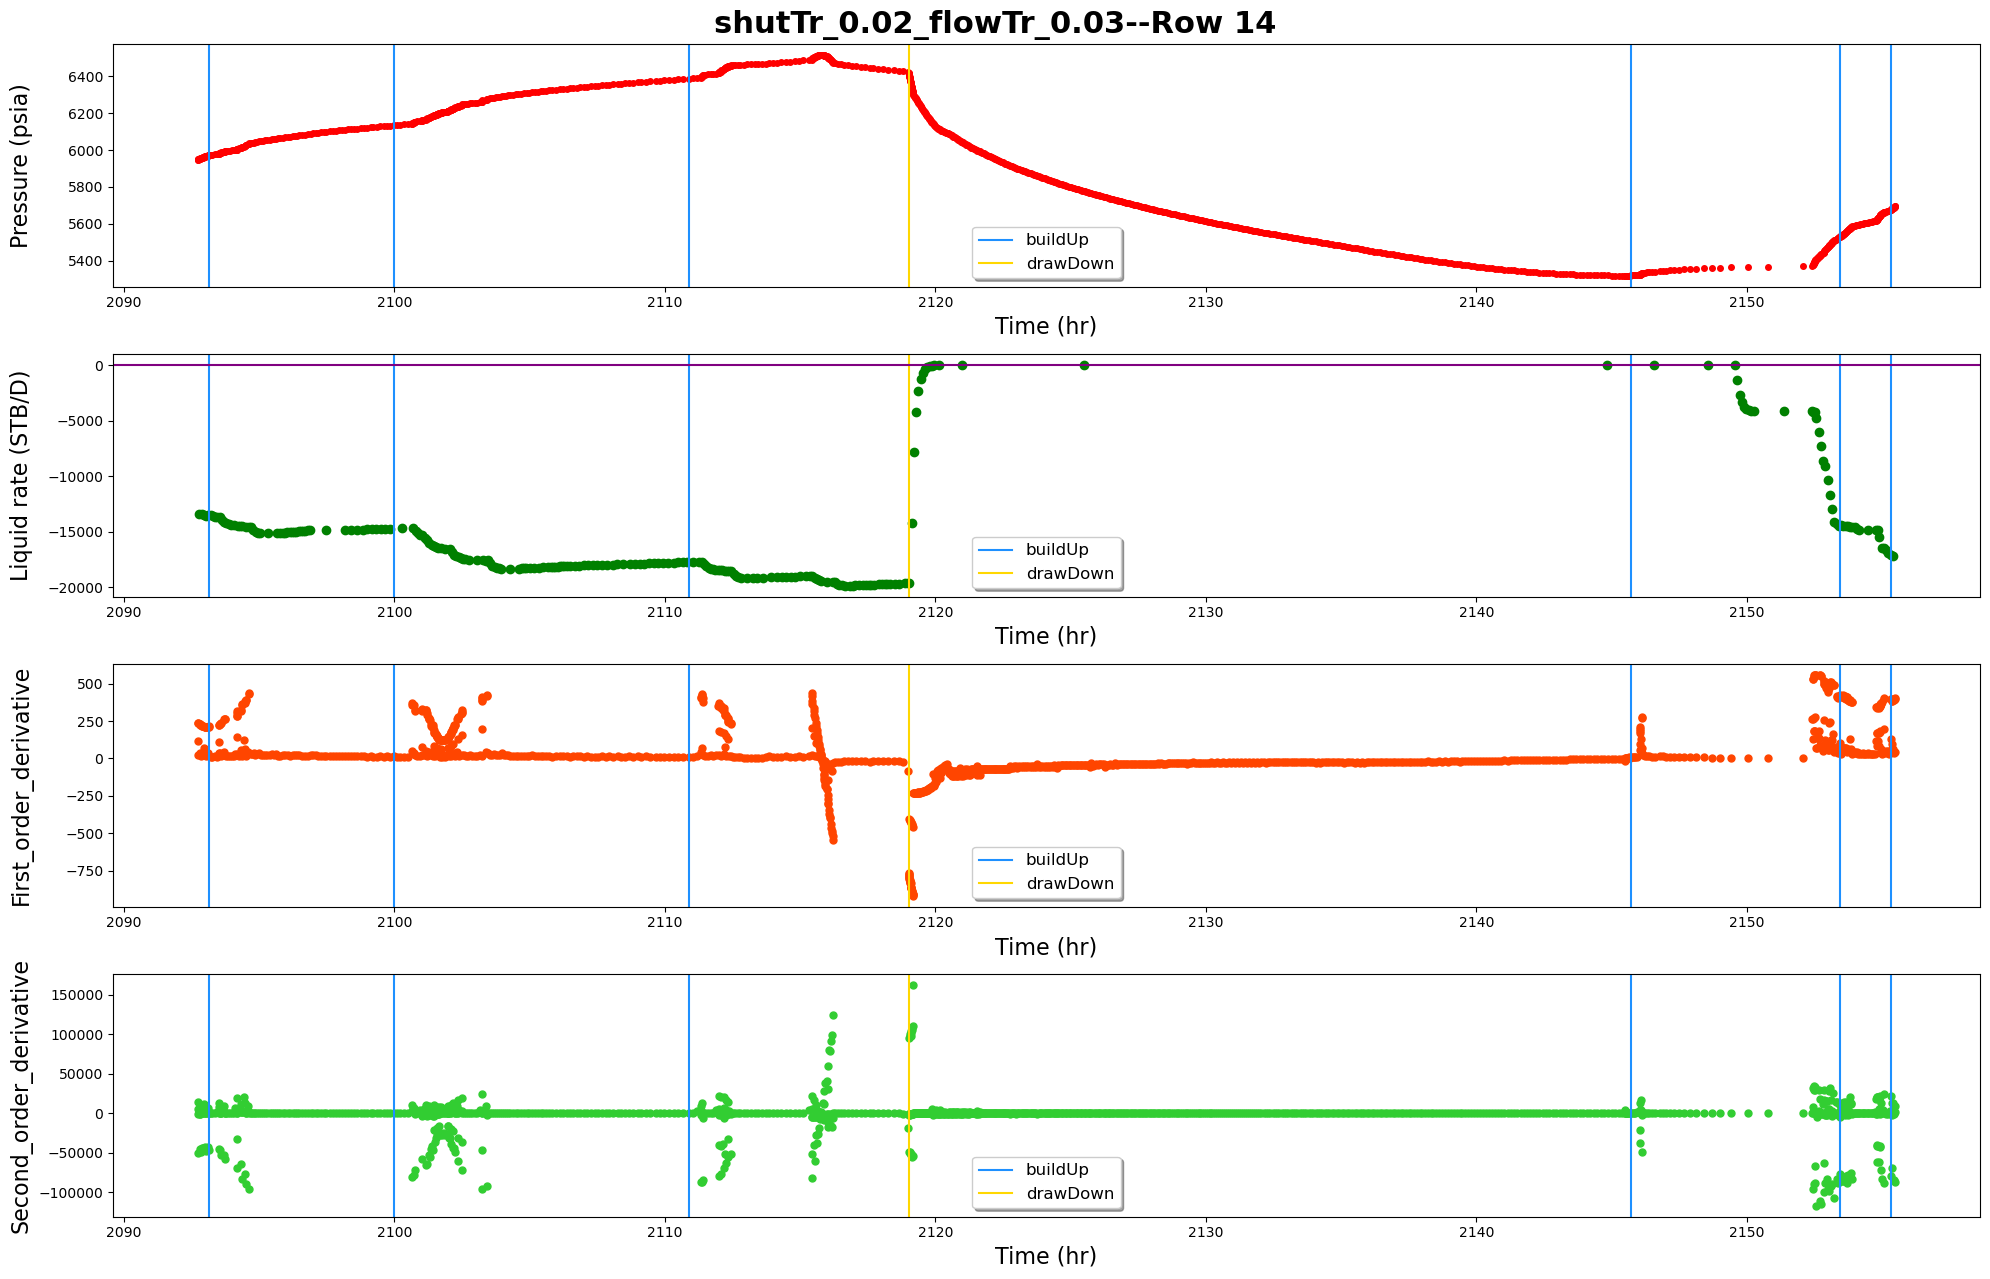

------row 15-----detected points:[16863, 16923, 17064, 17193, 17341, 17462, 17589]


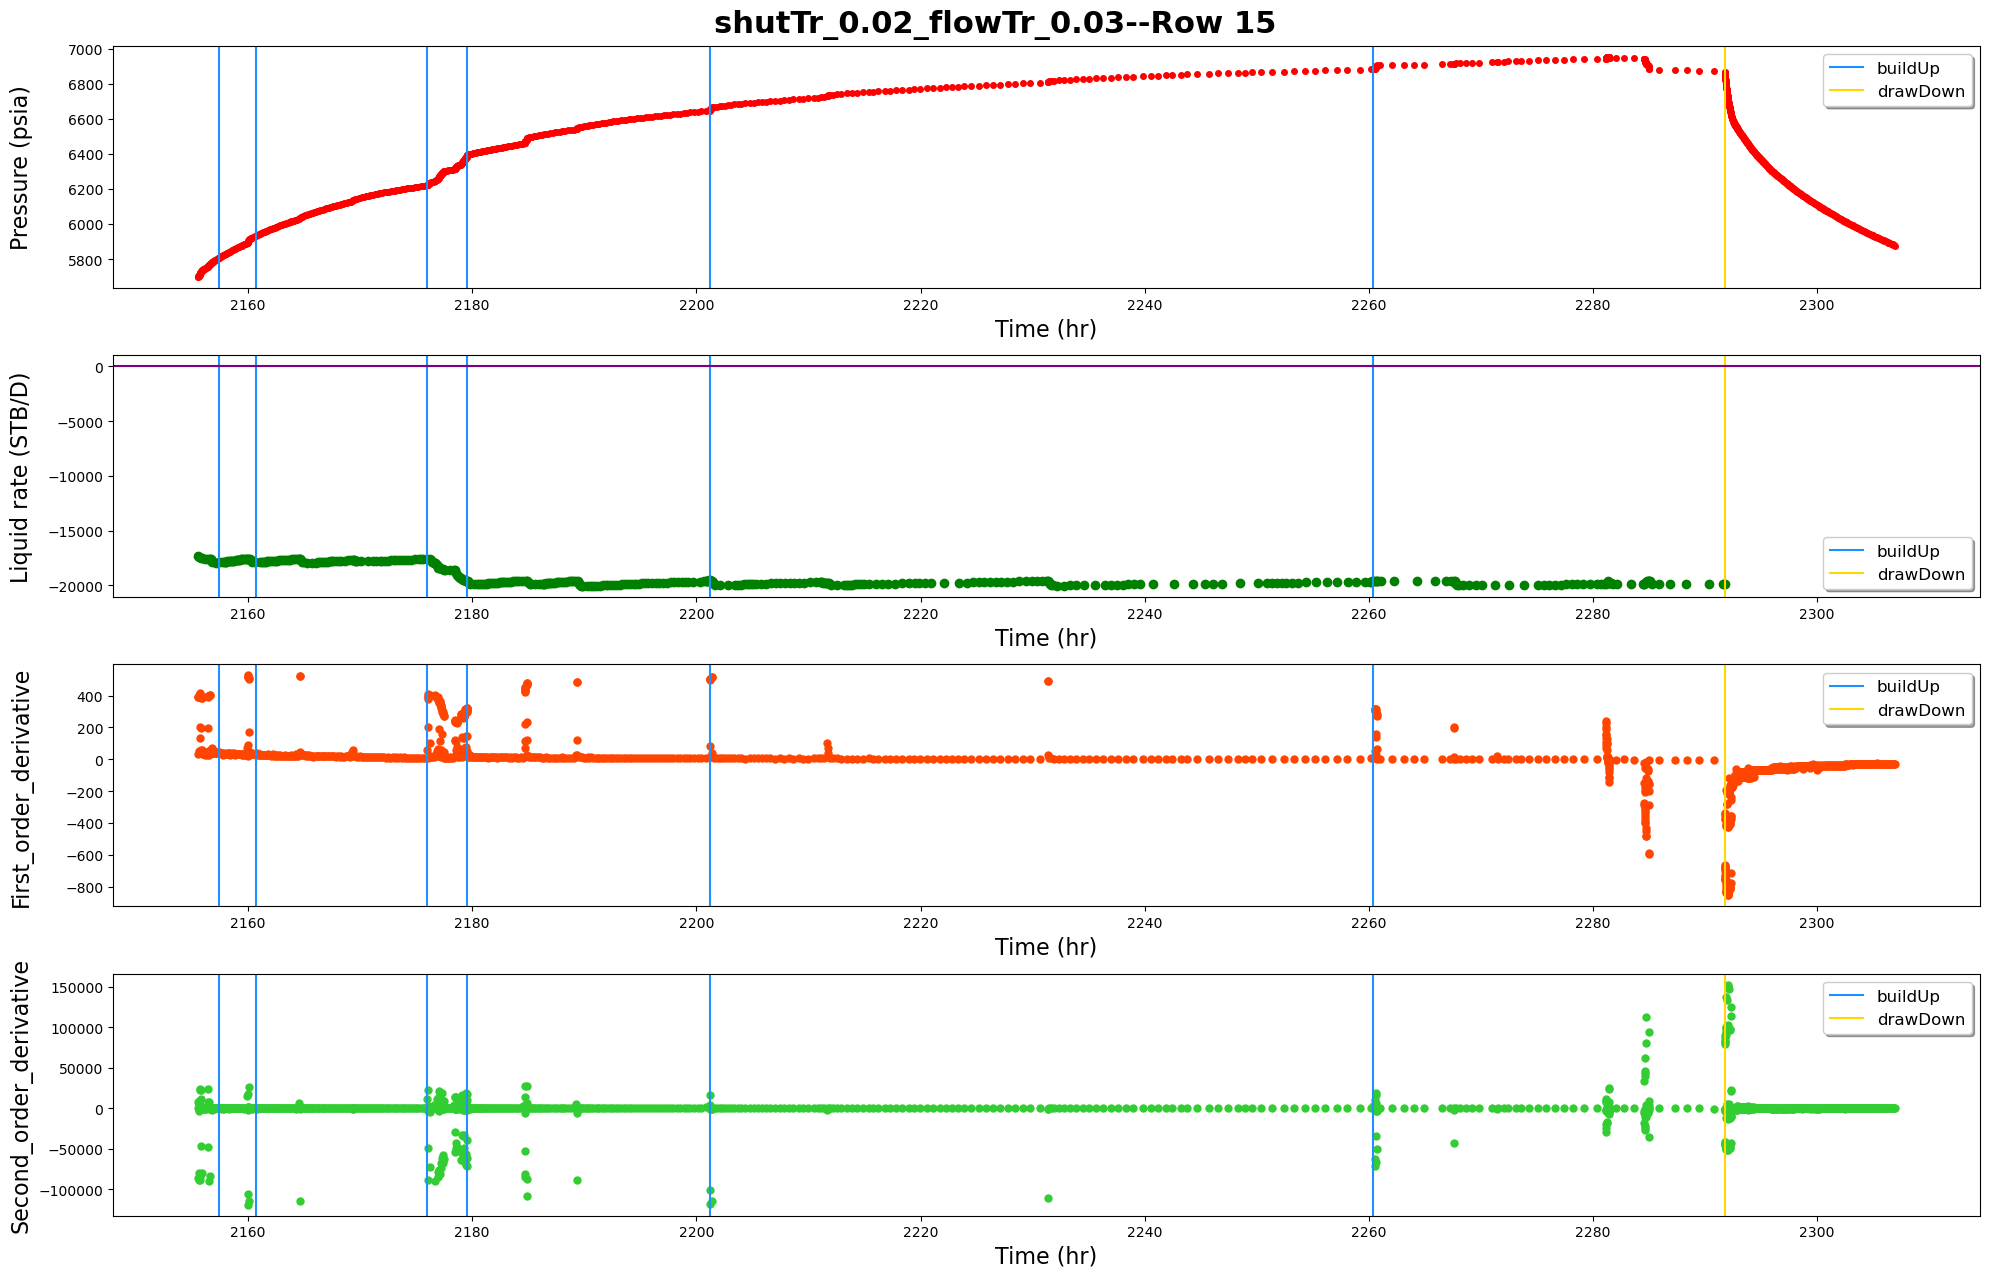

------row 16-----detected points:[18433, 18559, 18648, 18711, 18948, 19021, 19091, 19160]


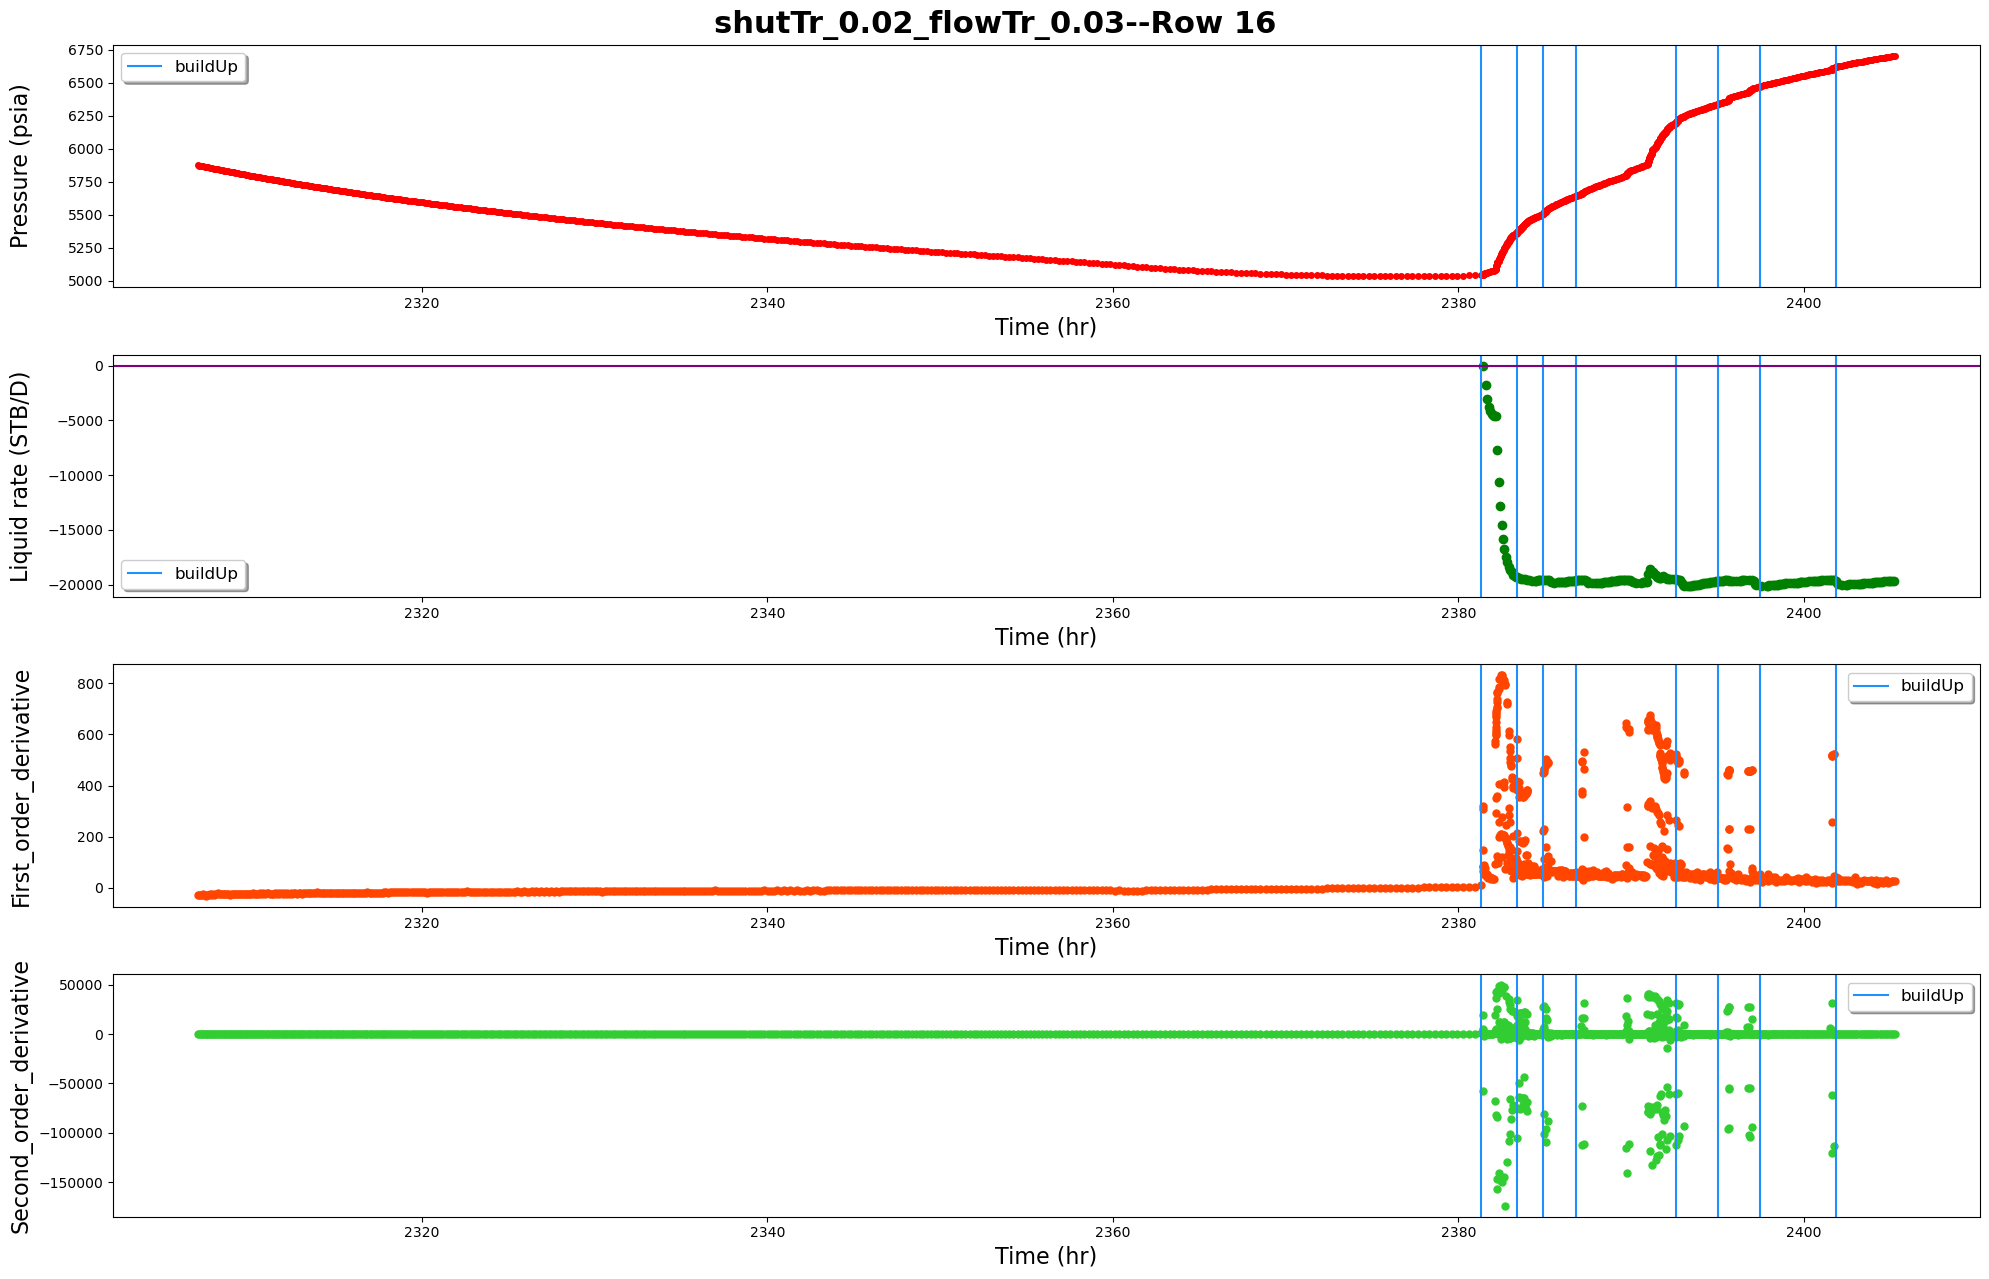

------row 17-----detected points:[19290, 19459, 19642, 19765, 19901, 20077, 20333]


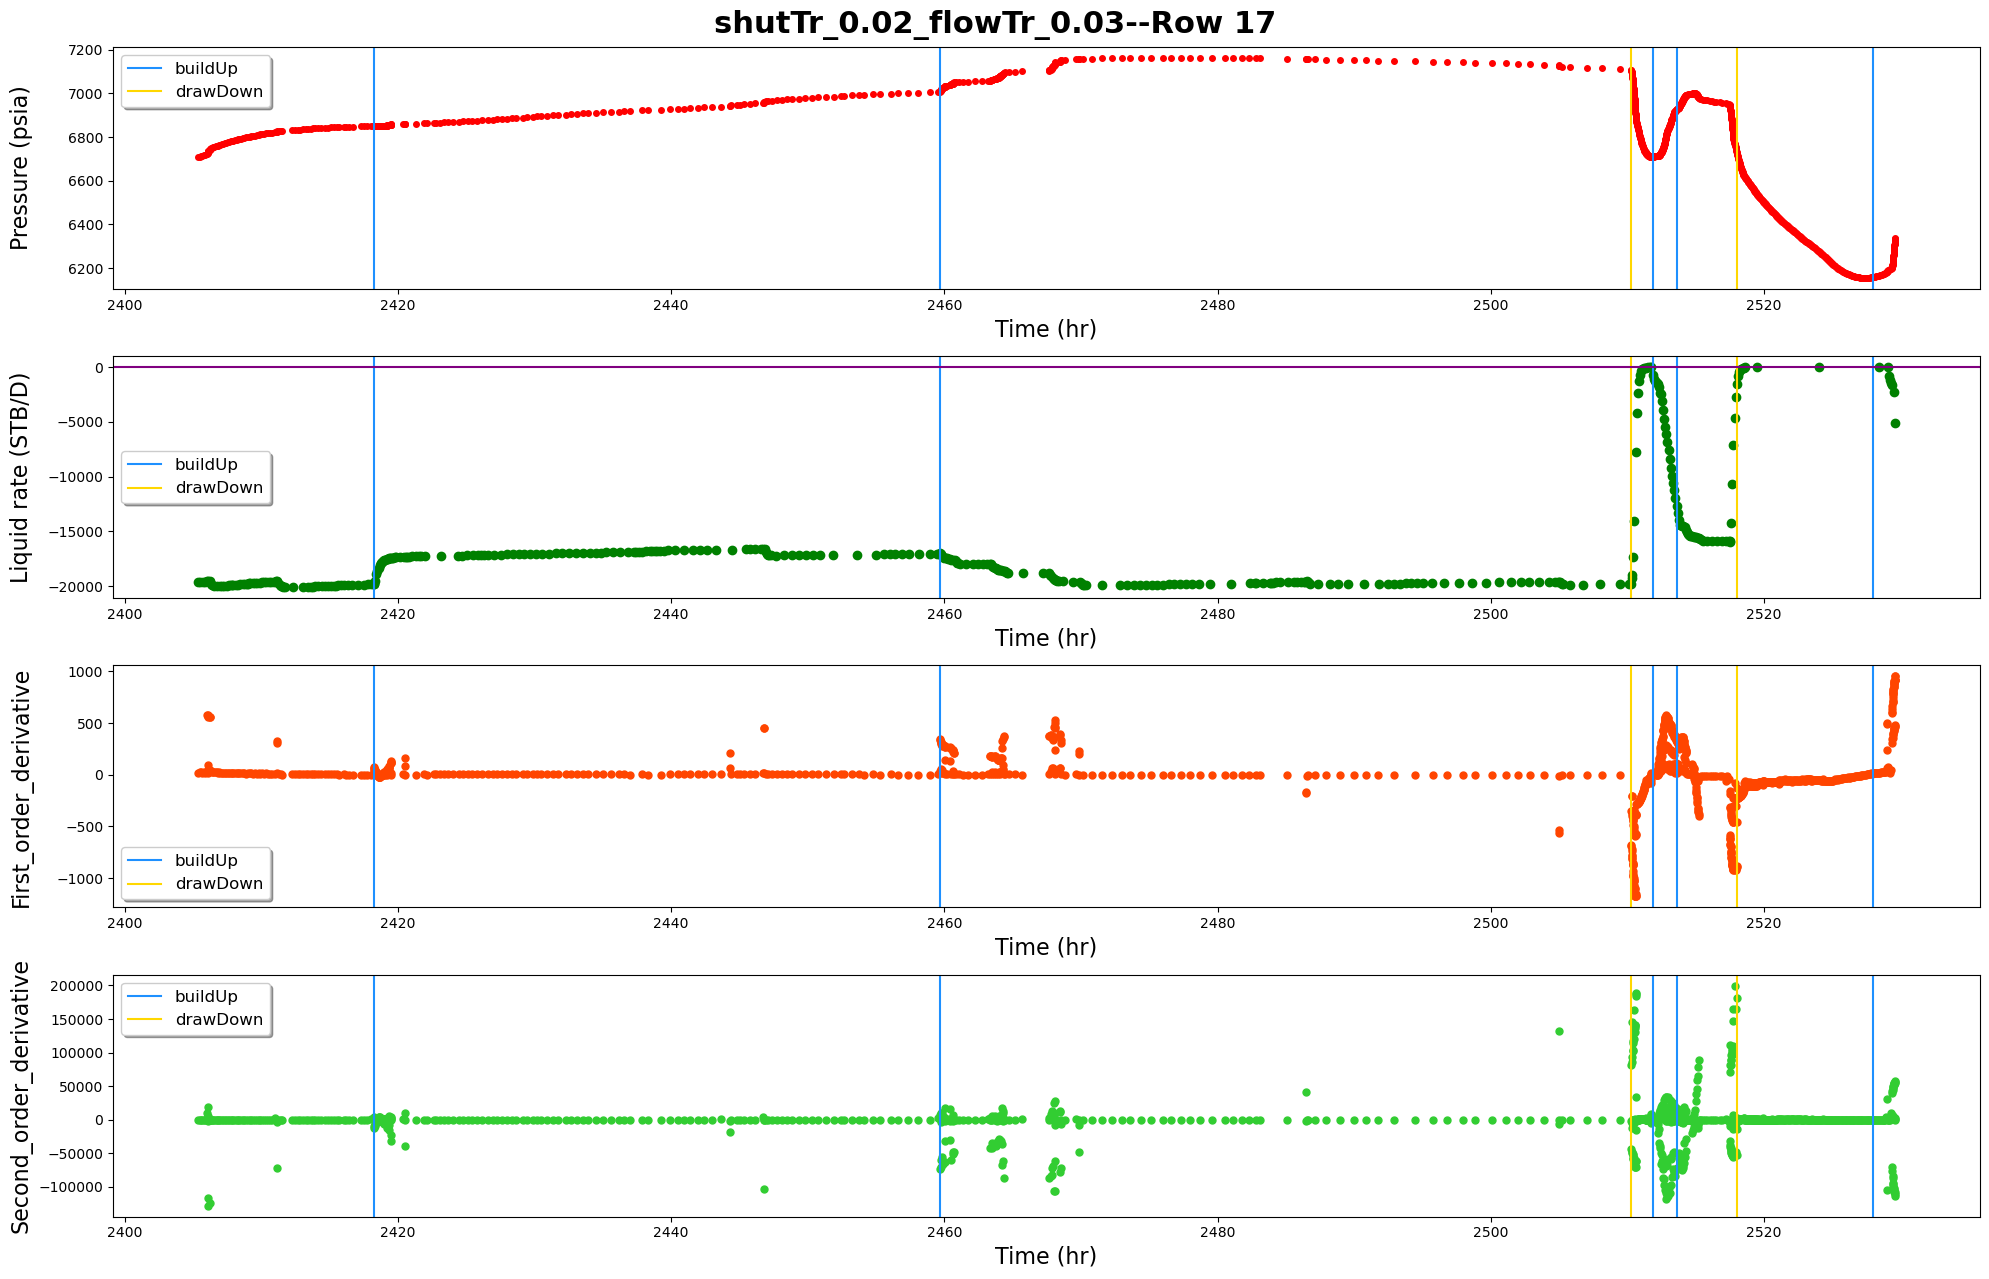

------row 18-----detected points:[20475, 20565, 20700, 21026, 21214, 21407, 21560]


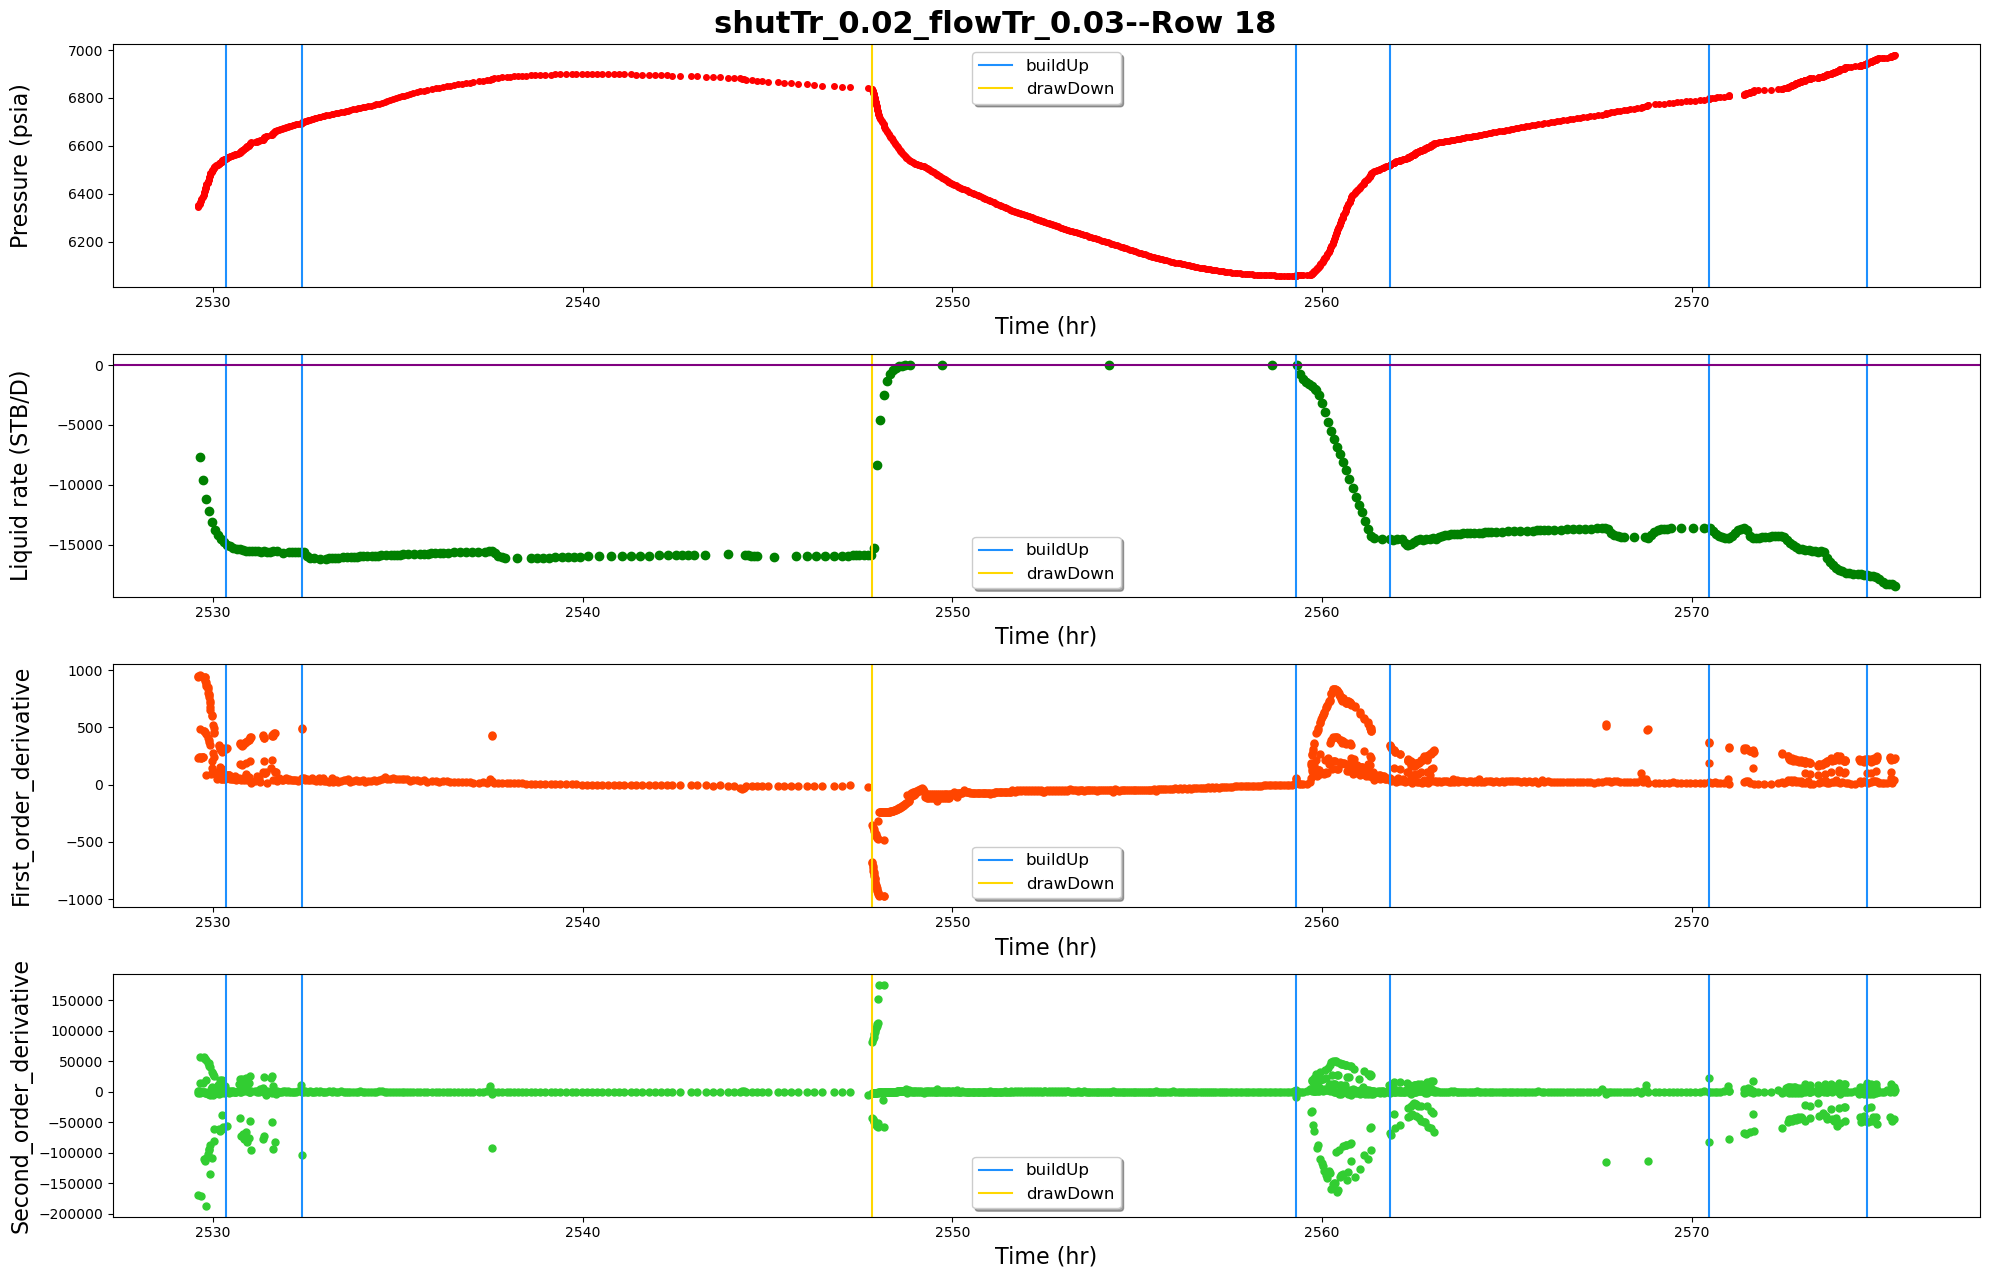

------row 19-----detected points:[21687, 21782, 21974, 22181, 22317, 22417, 22542, 22635, 22709]


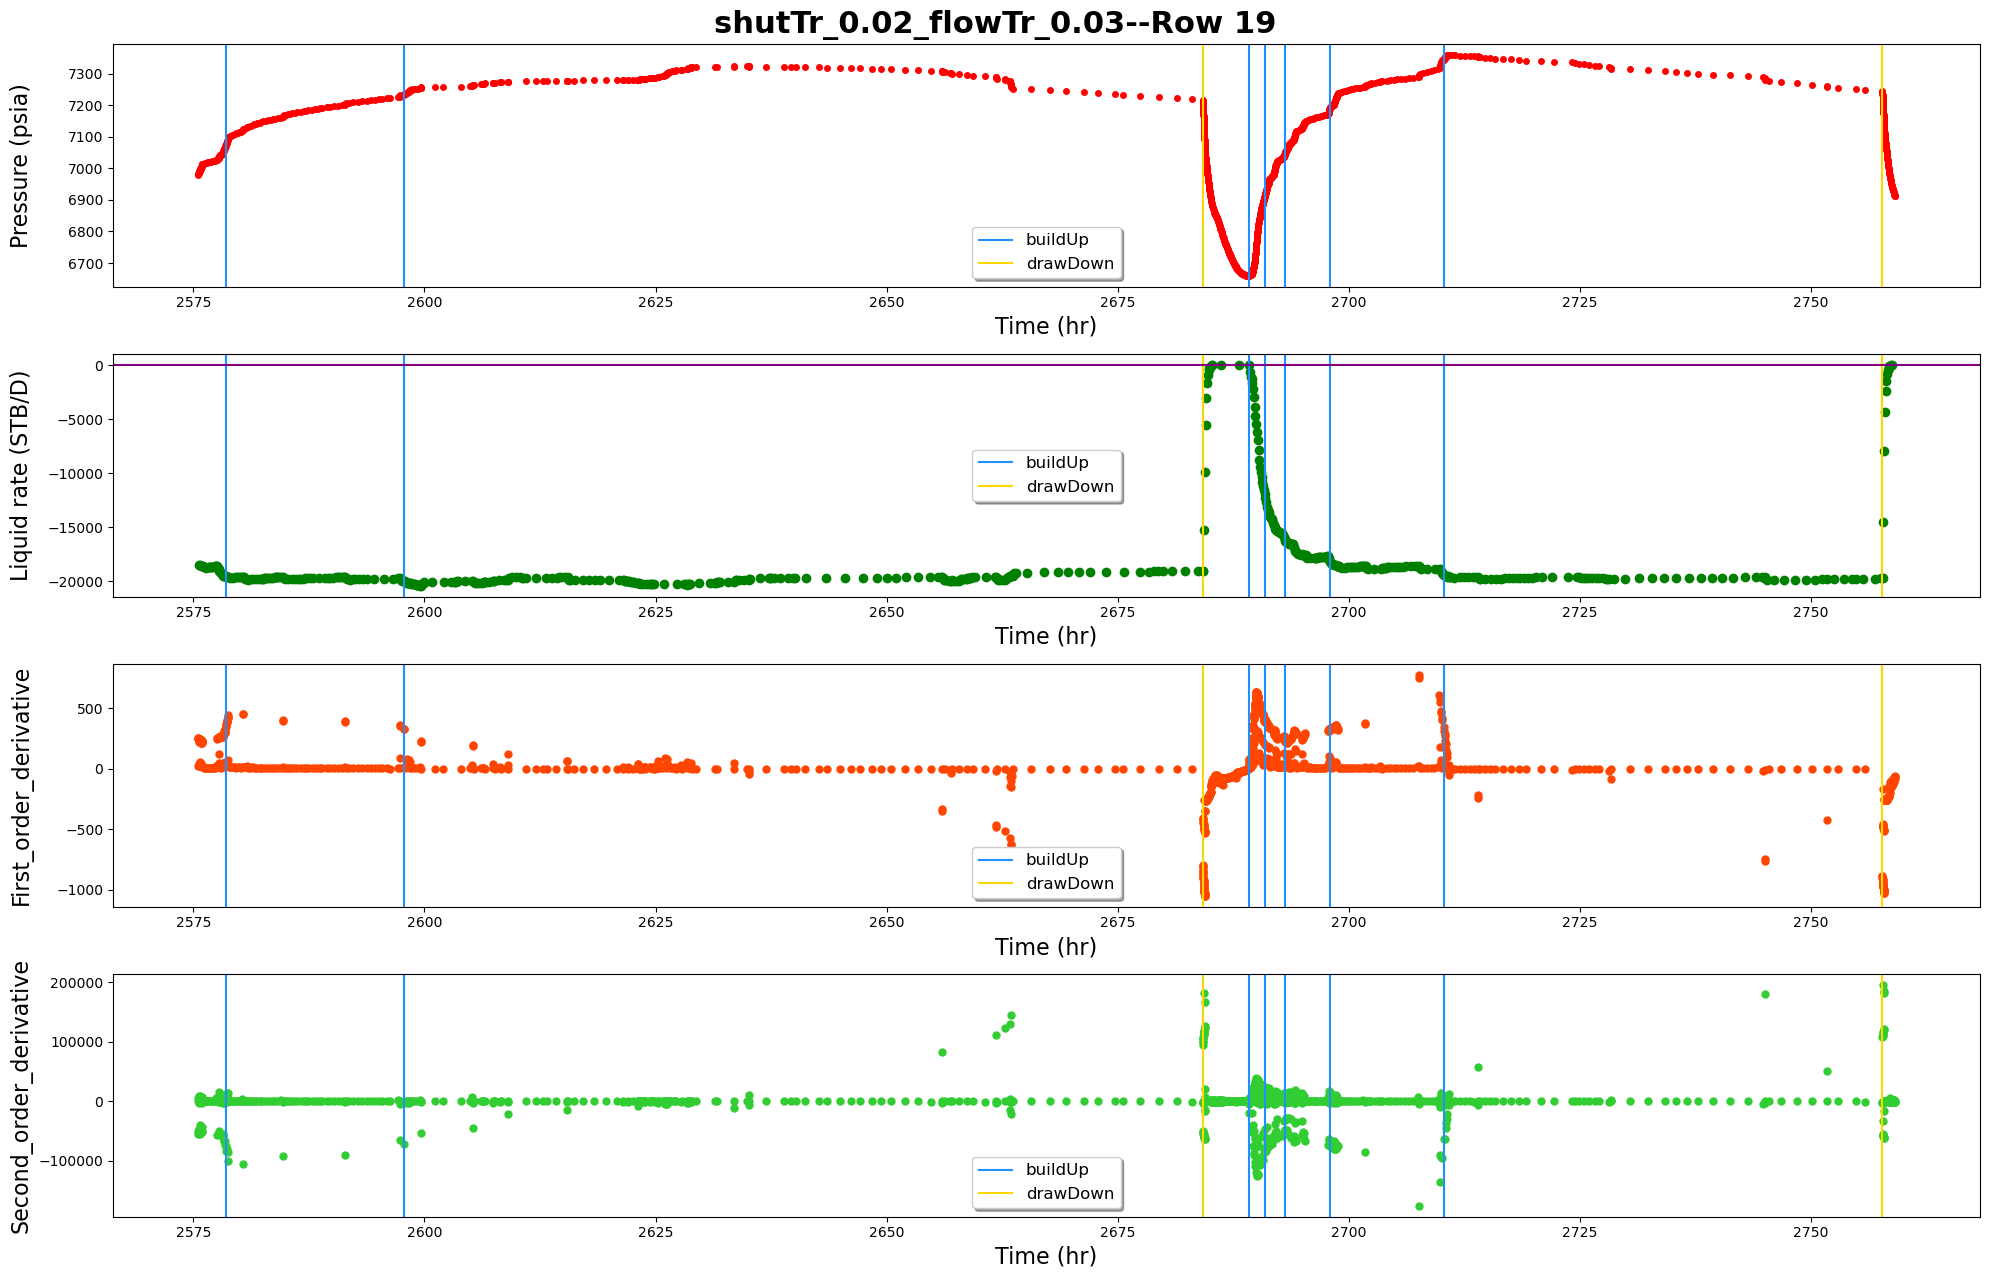

------row 20-----detected points:[23219, 23416, 23498, 23636, 23834, 23935]


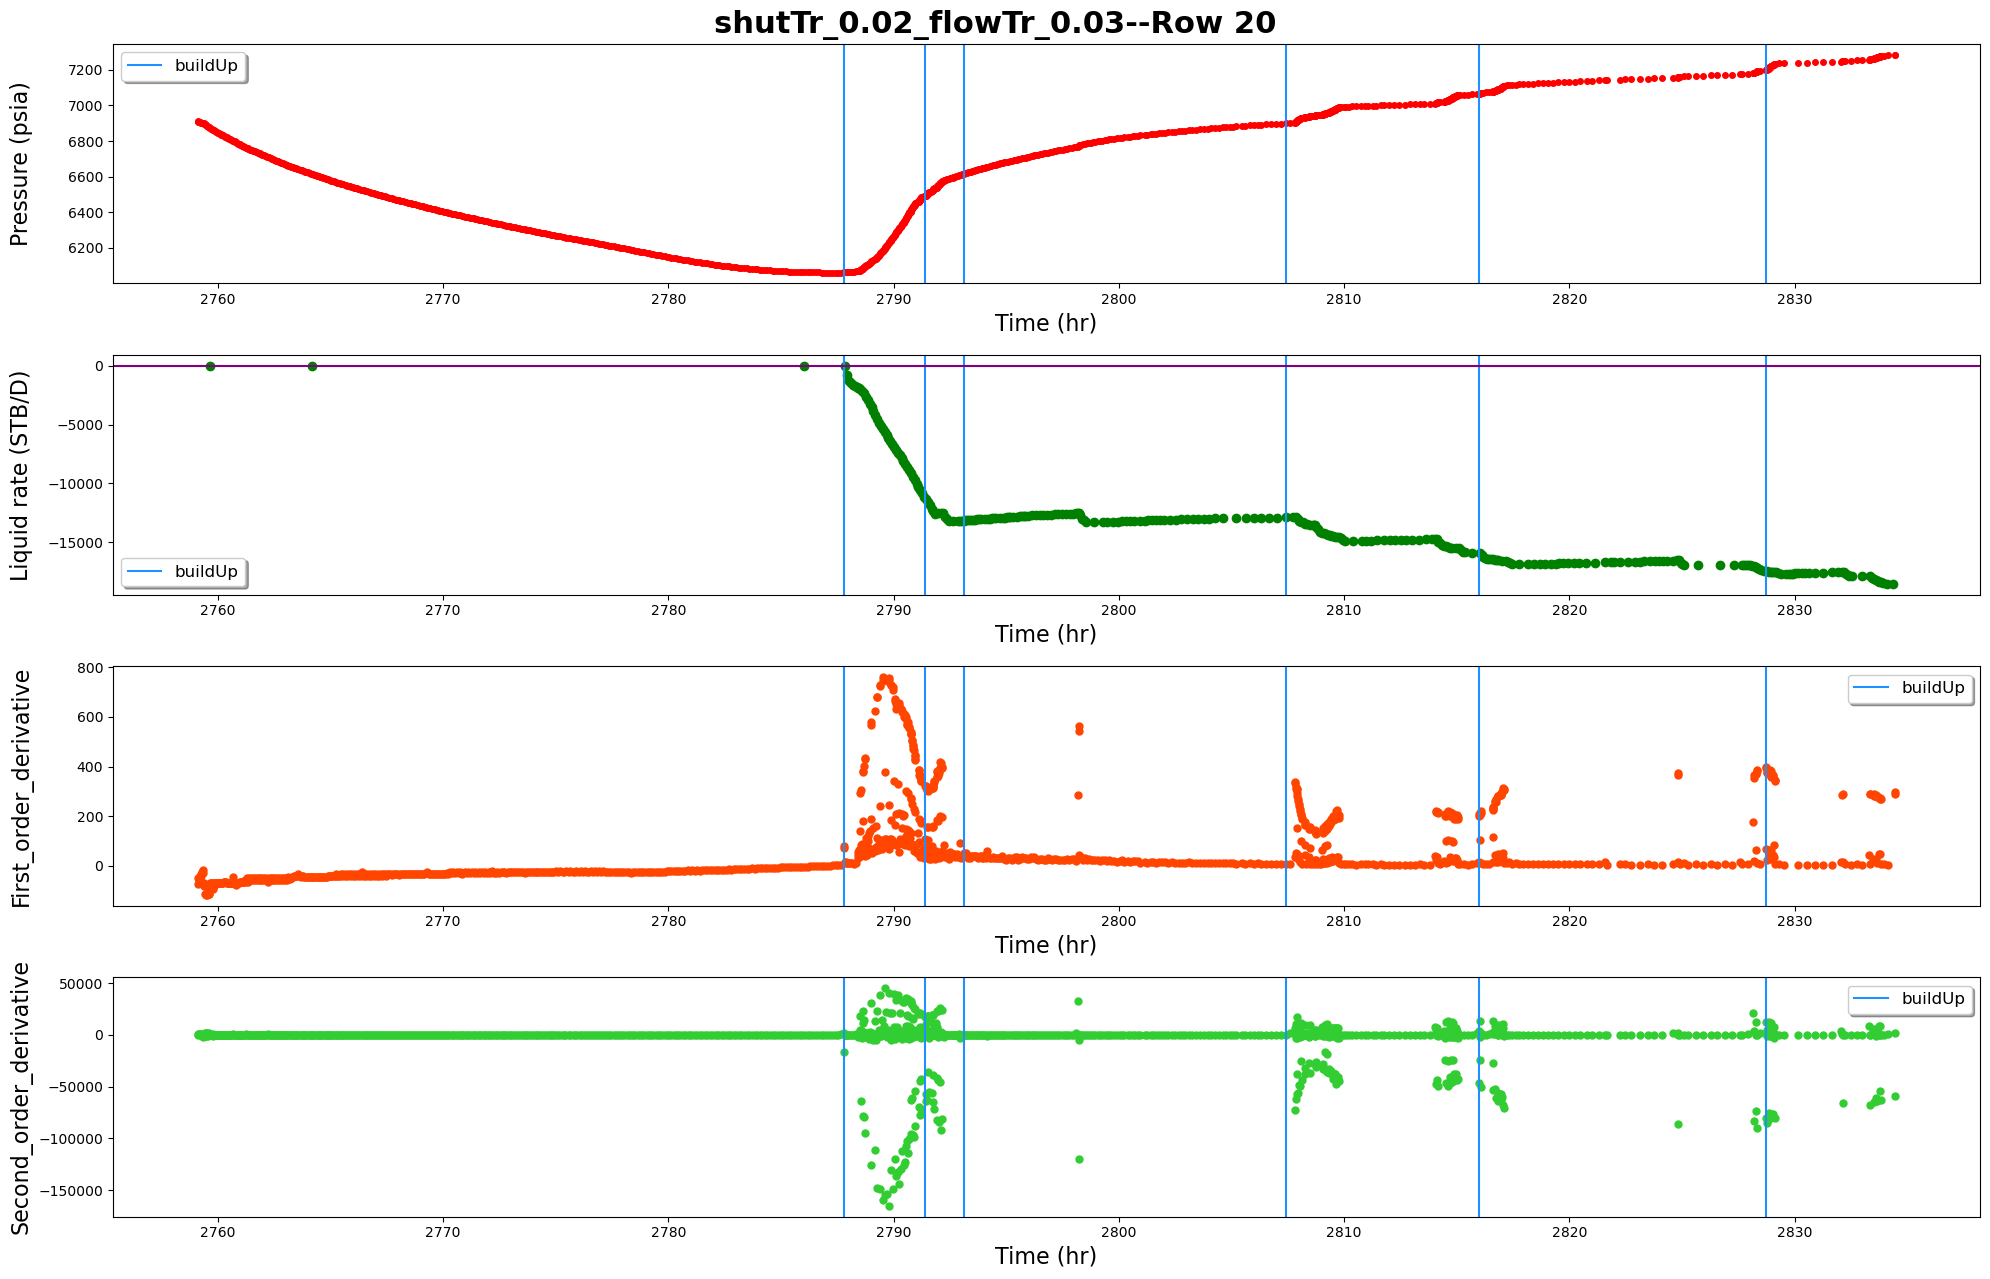

------row 21-----detected points:[24070, 24215, 24683, 24831, 25055, 25198]


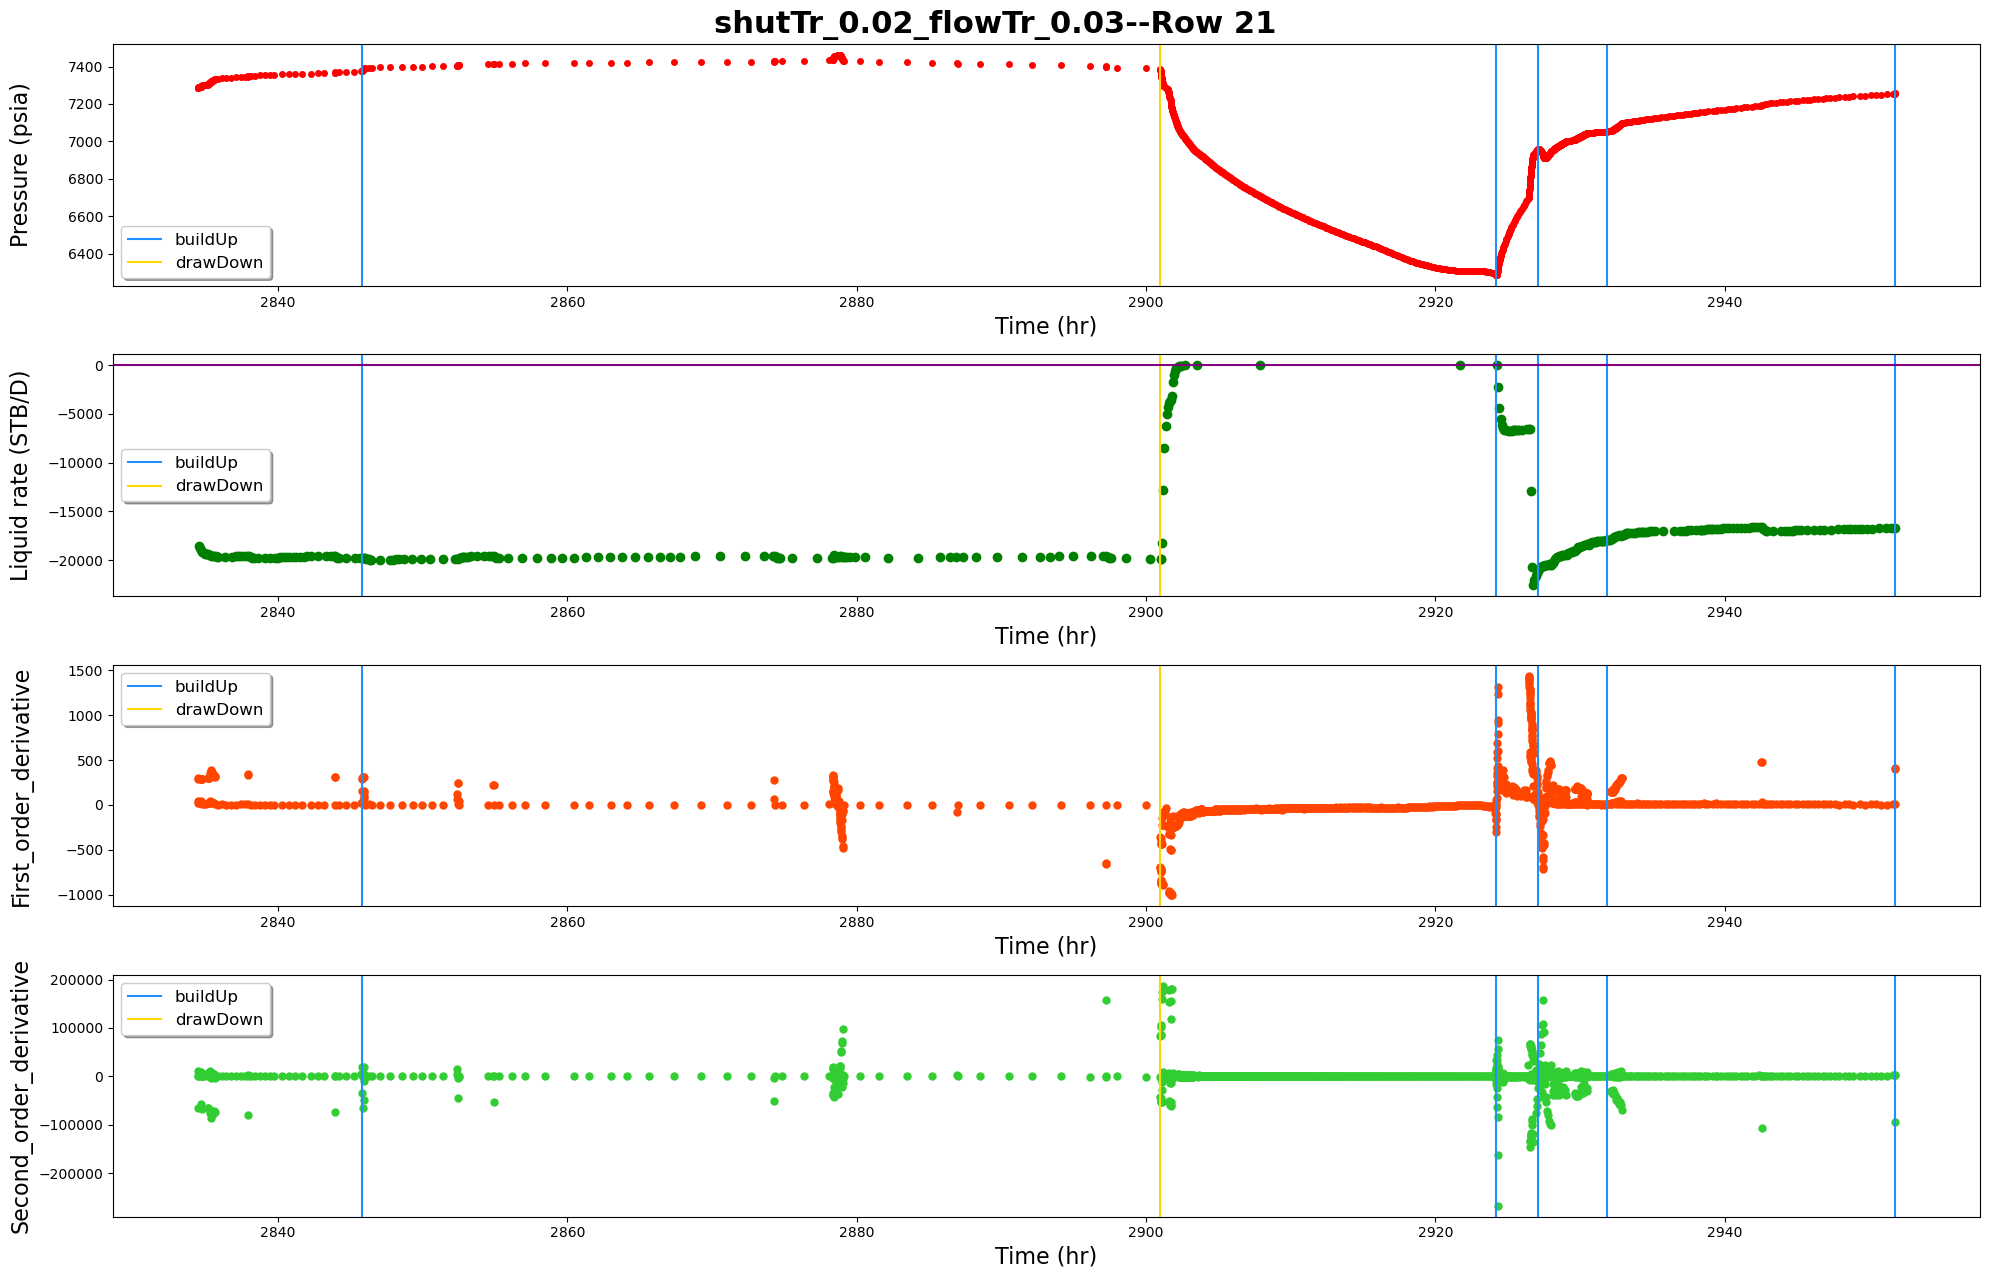

------row 22-----detected points:[25342, 25750, 25992, 26125, 26206]


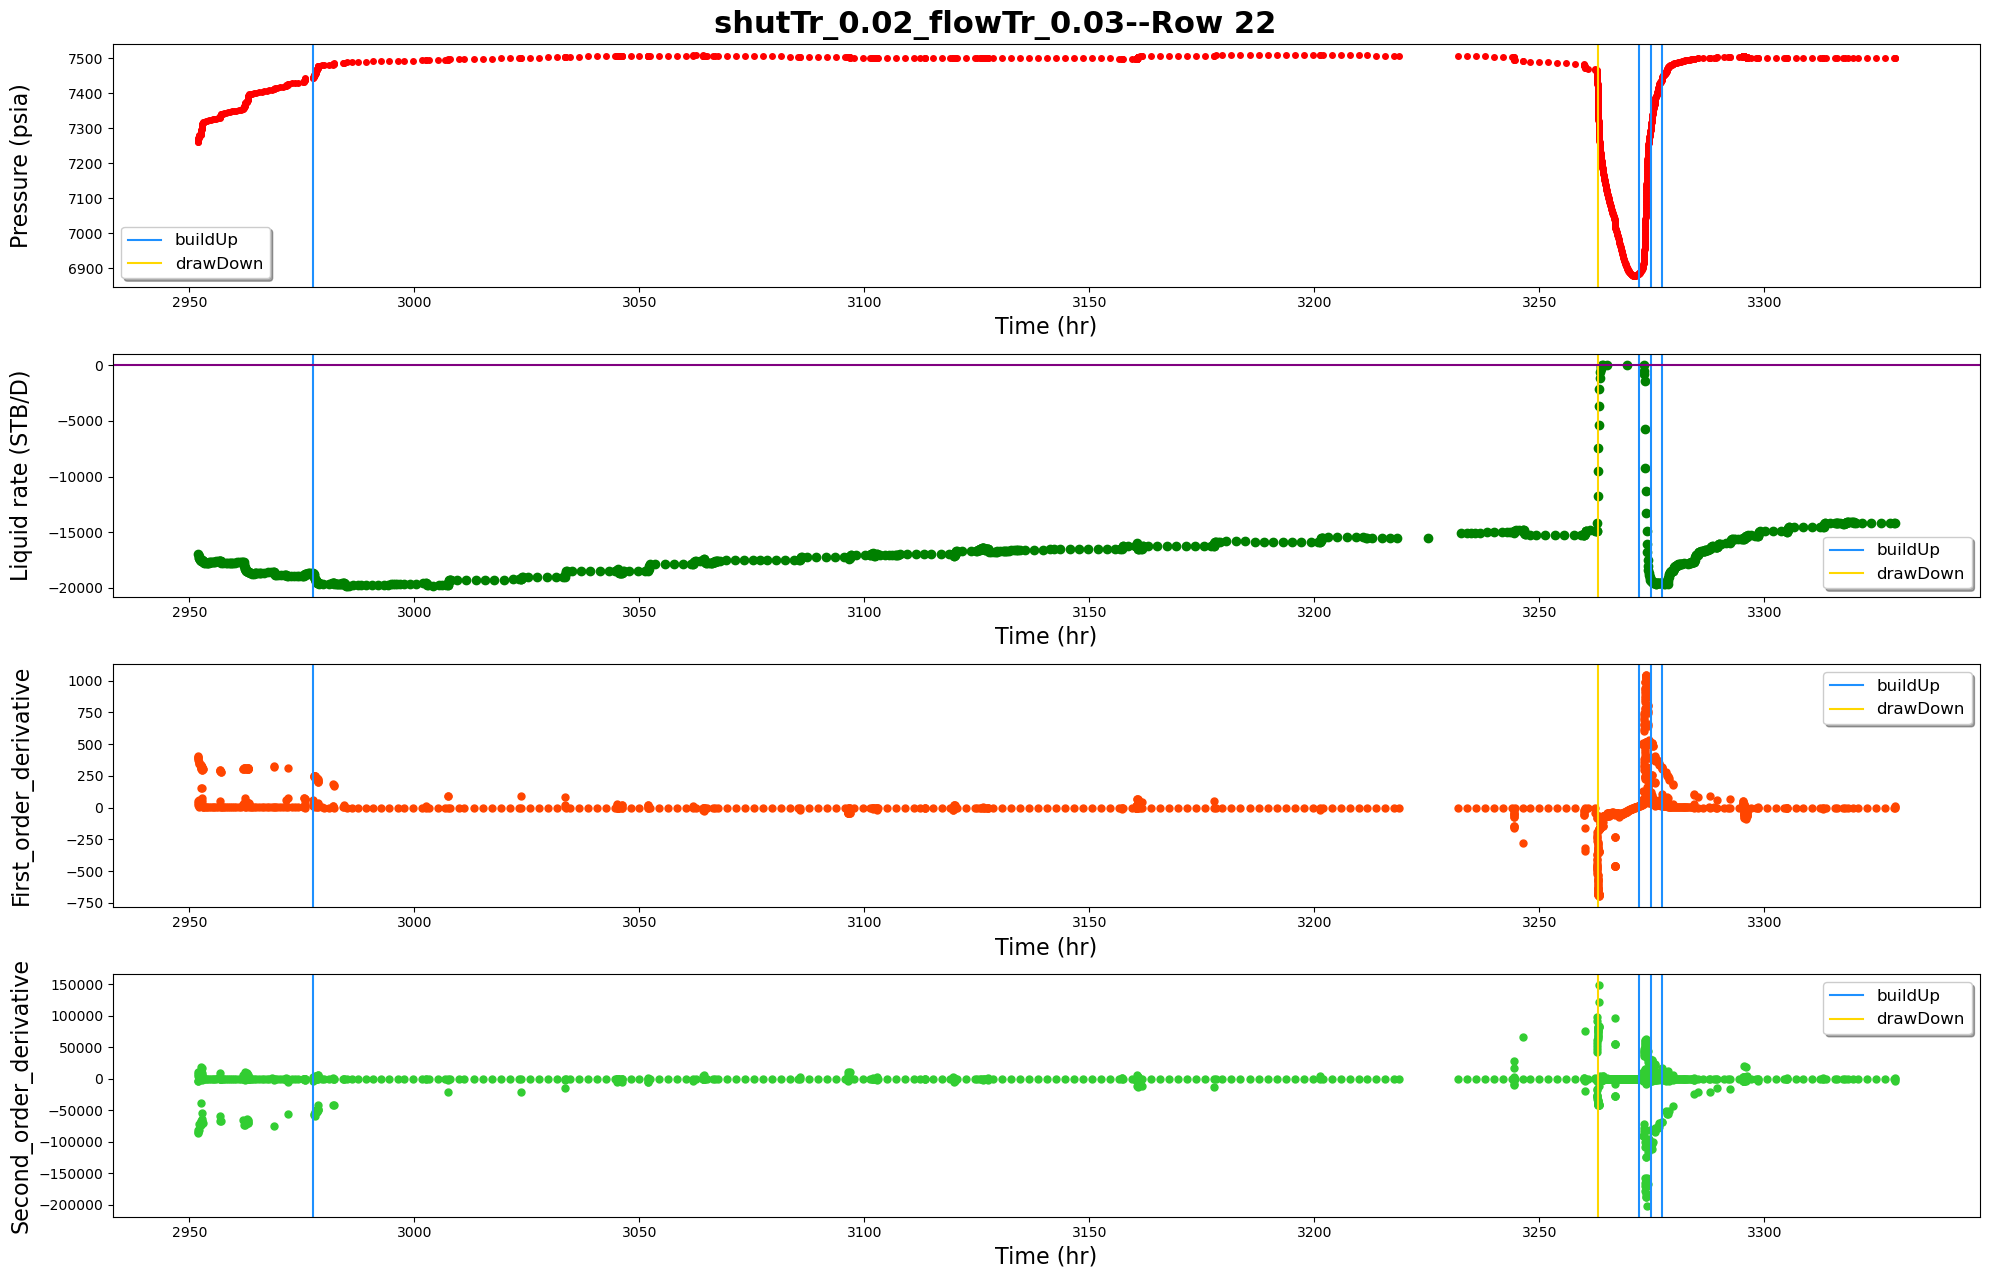

------row 23-----detected points:[26693, 26763, 27025, 27315, 27514]


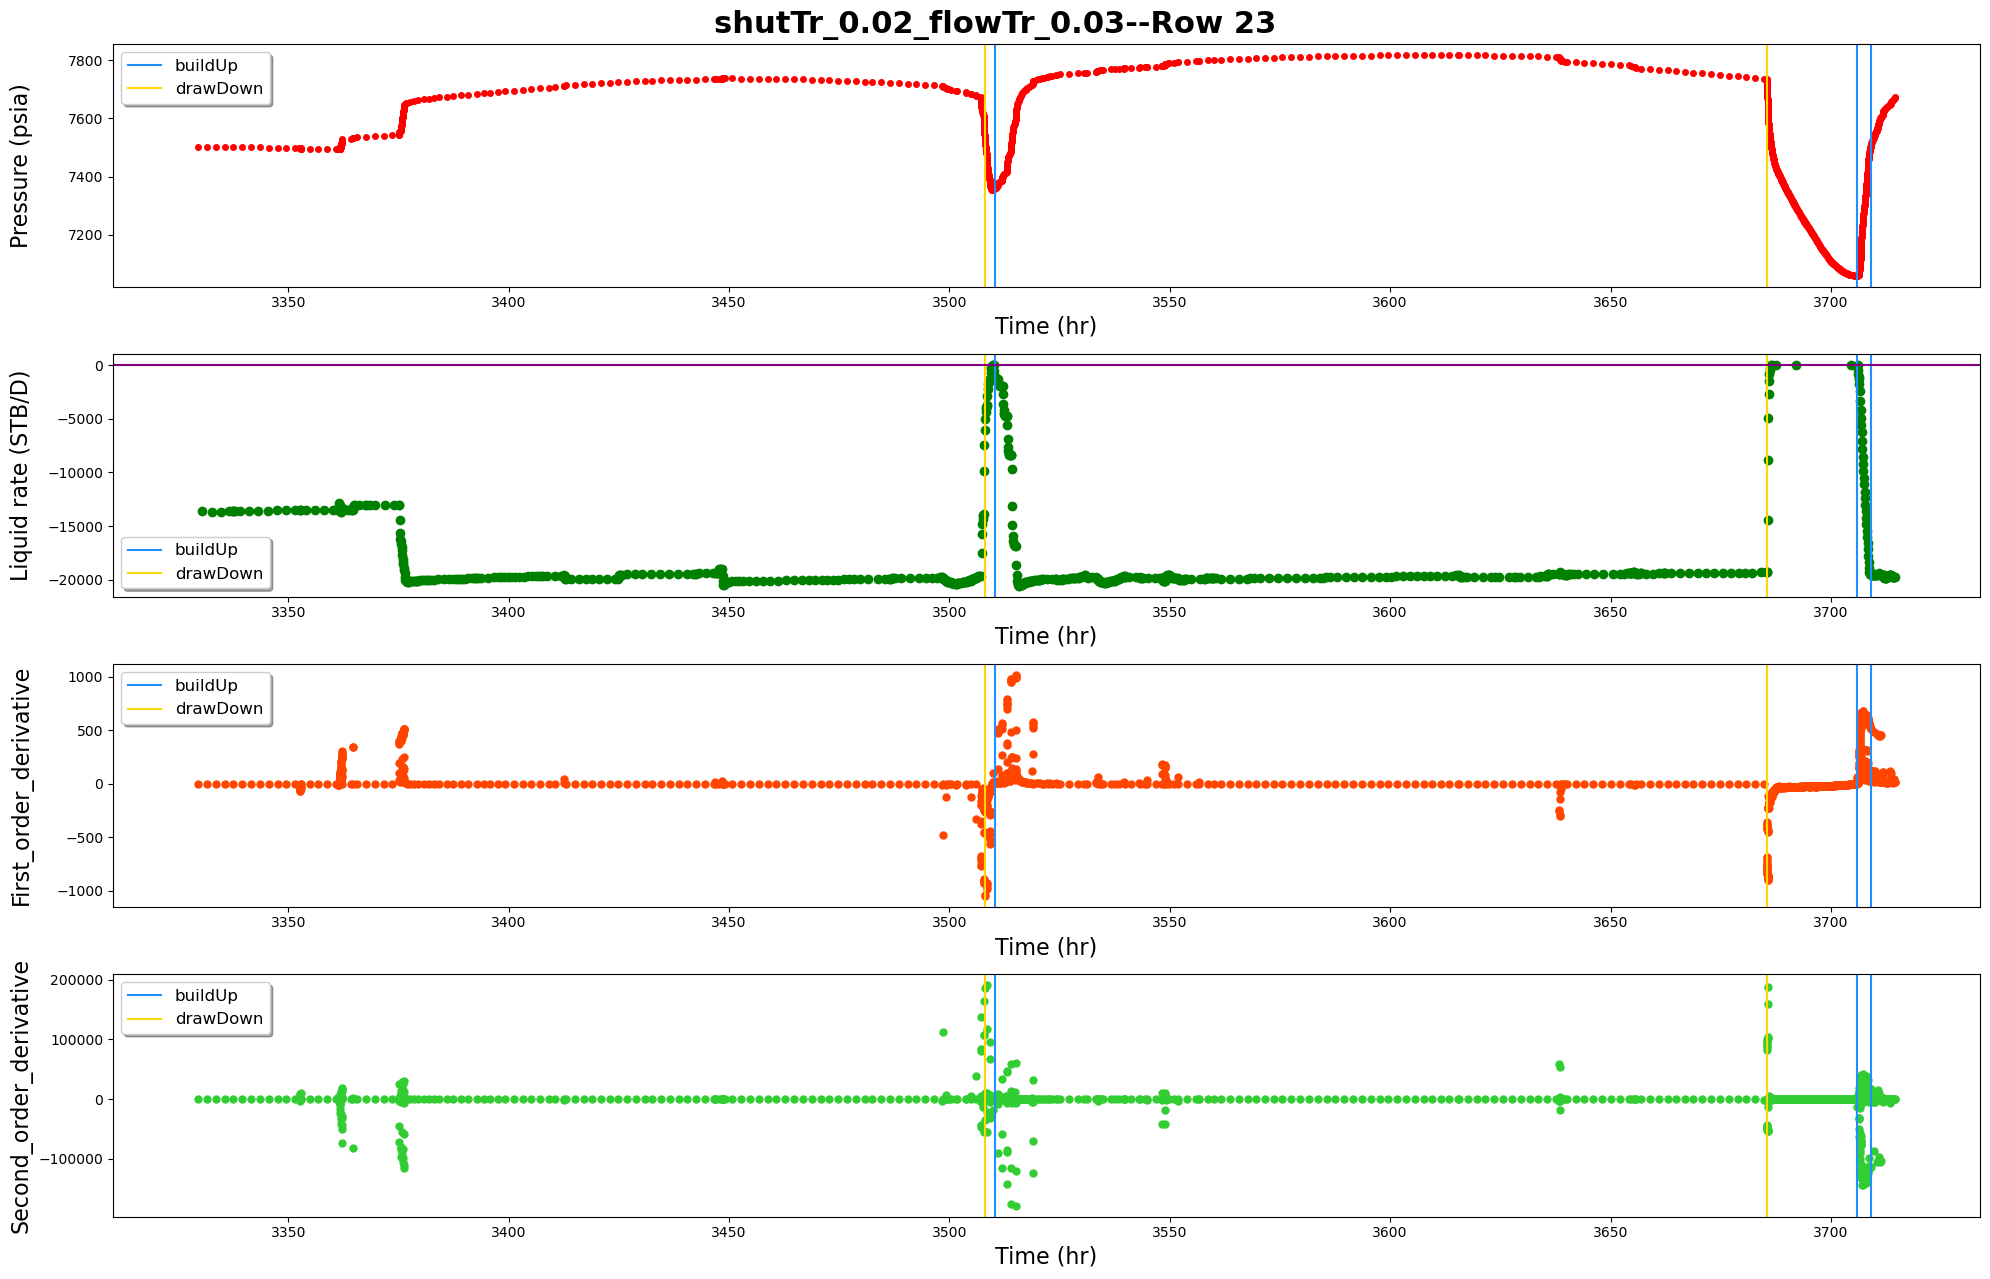

------row 24-----detected points:[27699, 27778, 27962, 28132, 28227, 28290, 28493, 28650, 28784]


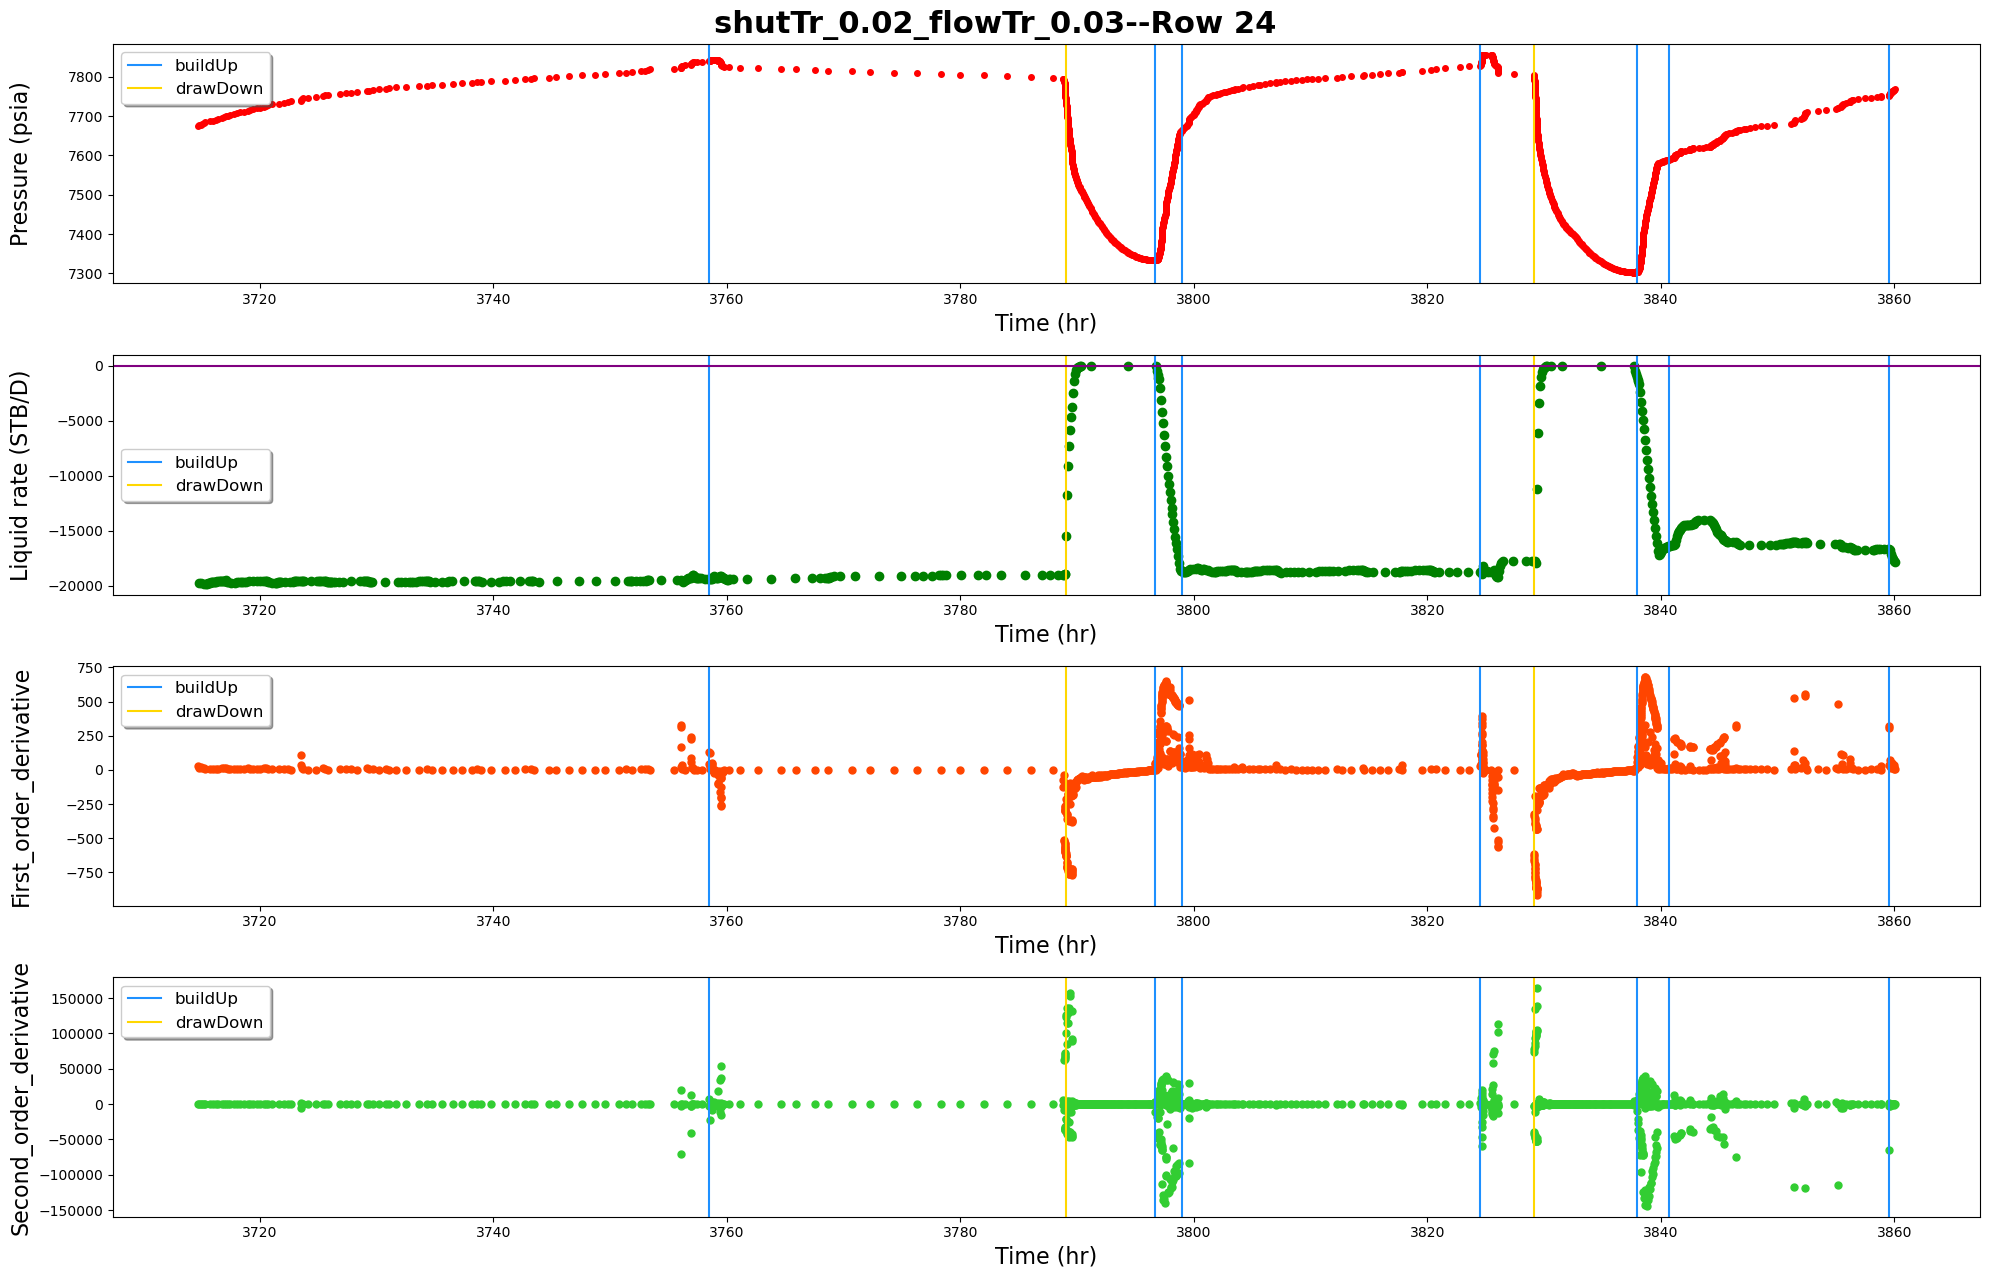

------row 25-----detected points:[28840, 29109, 29212, 29297, 29396, 29480]


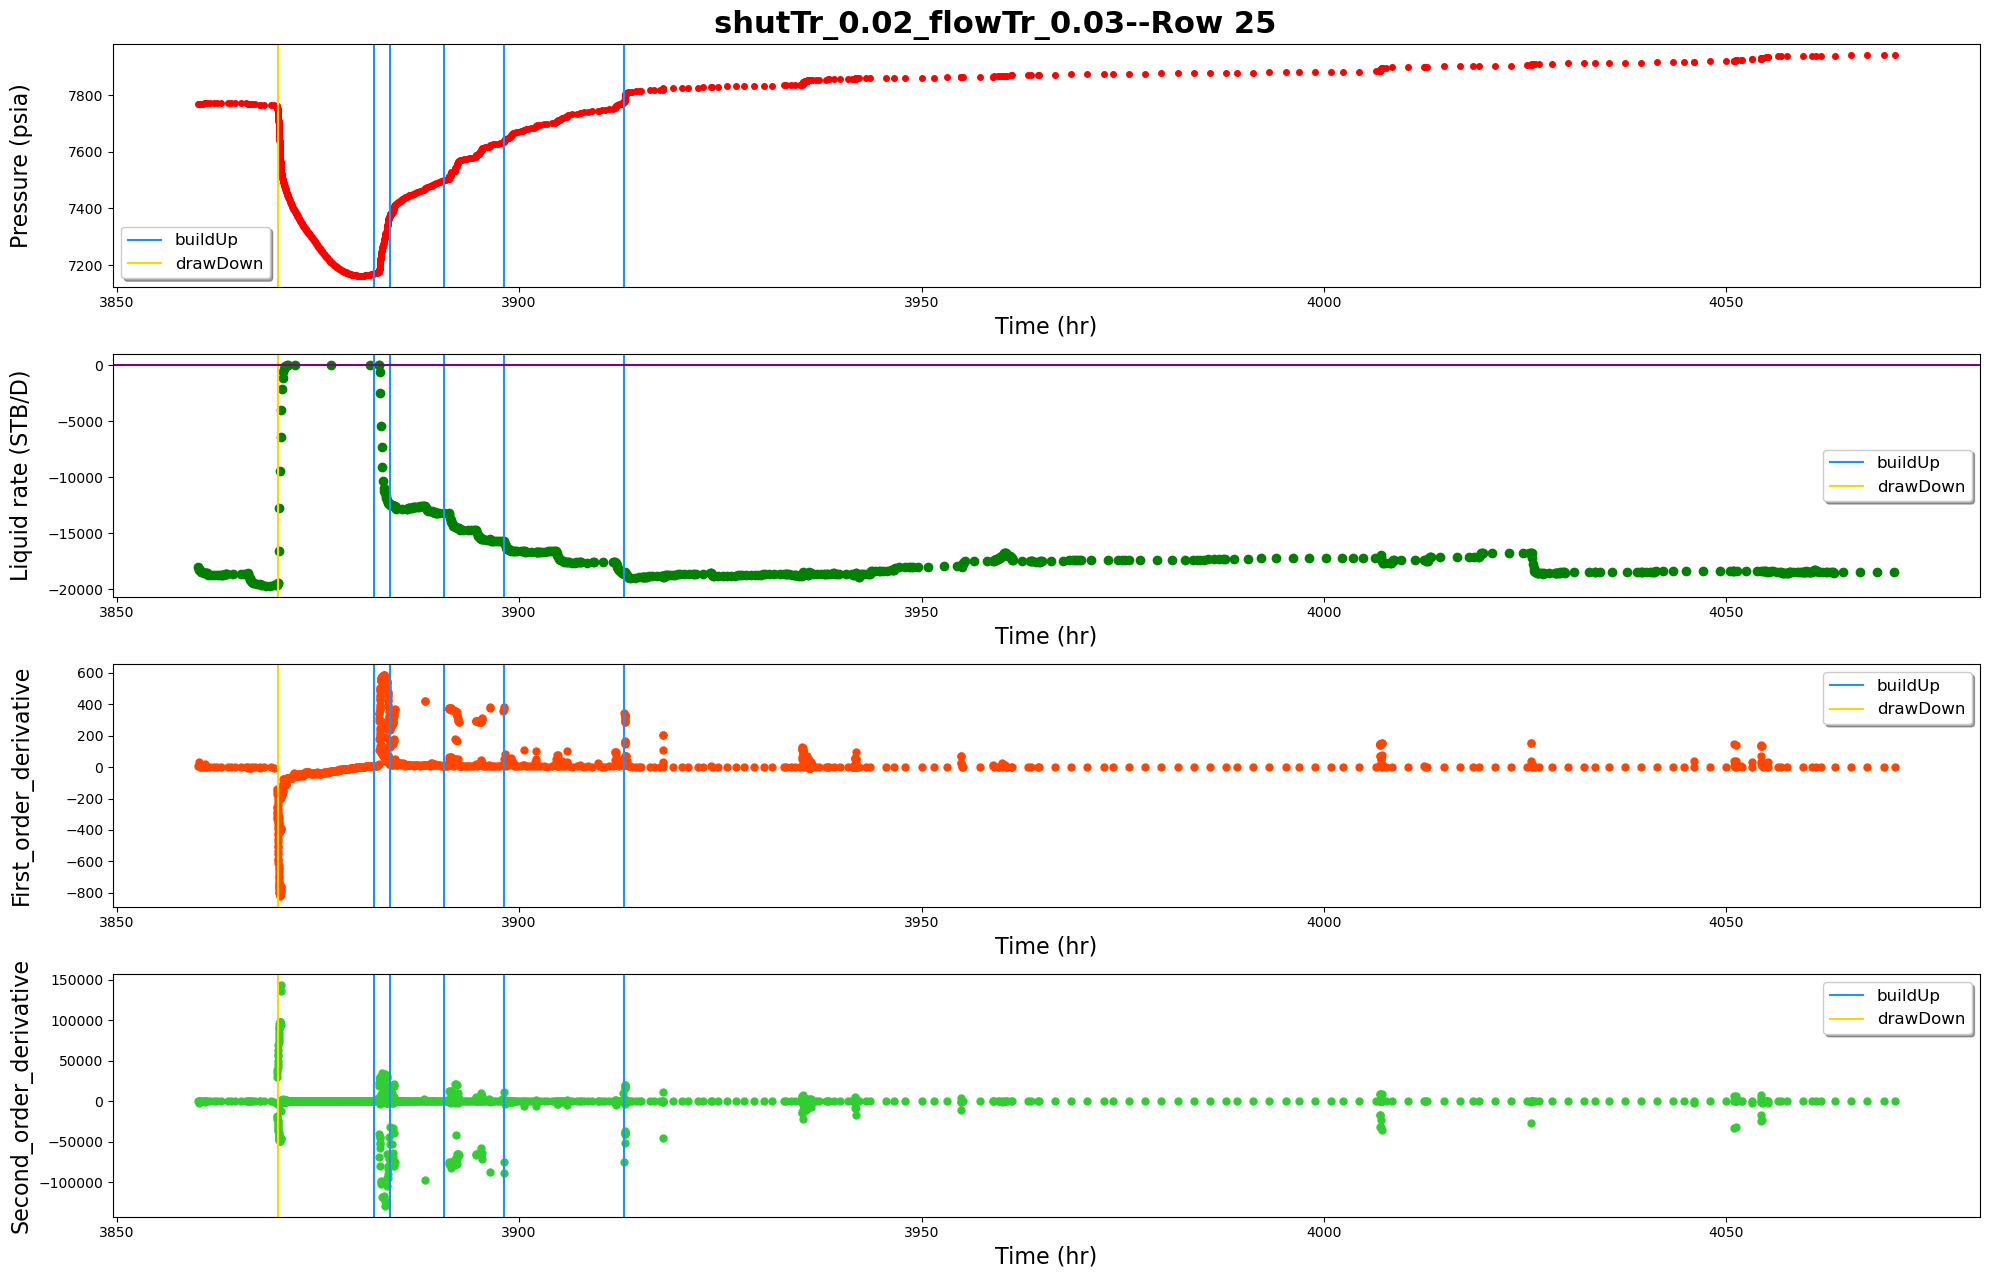

In [10]:
points_type="allPoints"
# points_type="majorTransients"
detect_points_dict=transients.allPointsStored

buildup=detect_points_dict["buildUp"]
drawdown=detect_points_dict["drawDown"]
txt=f"buildup:{len(buildup)}, drawdown:{len(drawdown)}"
pprint(txt)
plot_whole=True
plot_details=True
plot_statistics=False
save=True
folder_name=f"{method}/{points_type}/timeStep_{time_step}"
%run plot_N_save.ipynb